<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
rows = []
with open('sat_scores.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
f.close()
header = rows[0]
data = rows[1:]
sat_scores = {col_name:[row[i] for row in data] for i,col_name in enumerate(header)}
sat_scores

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': ['82',
  '81',
  '79',
  '77',
  '72',
  '71',
  '71',
  '69',
  '69',
  '68',
  '67',
  '65',
  '65',
  '63',
  '60',
  '57',
  '56',
  '55',
  '54',
  '53',
  '53',
  '52',
  '51',
  '51',
  '34',
  '33',
  '31',
  '26',
  '23',
  '18',
  '17',
  '13',
  '13',
  '12',
  '12',
  '11',
  '11',
  '9',
  '9',
  '9',
  '8',
  '8',
  '8',
  '7',
  '6',
  '6',
  '5',
  '5',
  '4',
  '4',
  '4',
  '45'],
 'Verbal': ['509',
  '499',
  '511',
  '495',
  '520',
  '501',
  '500',
  '511',
  '506',
  '510',
  '501',
  '508',
  '493',
  '491',
  '499',
  '486',
  '482',

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
sat1 = pd.DataFrame(sat_scores)
sat1.head()

State Rate Verbal Math
0    CT   82    509  510
1    NJ   81    499  513
2    MA   79    511  515
3    NY   77    495  505
4    NH   72    520  516

In [4]:
sat1

State Rate Verbal Math
0     CT   82    509  510
1     NJ   81    499  513
2     MA   79    511  515
3     NY   77    495  505
4     NH   72    520  516
5     RI   71    501  499
6     PA   71    500  499
7     VT   69    511  506
8     ME   69    506  500
9     VA   68    510  501
10    DE   67    501  499
11    MD   65    508  510
12    NC   65    493  499
13    GA   63    491  489
14    IN   60    499  501
15    SC   57    486  488
16    DC   56    482  474
17    OR   55    526  526
18    FL   54    498  499
19    WA   53    527  527
20    TX   53    493  499
21    HI   52    485  515
22    AK   51    514  510
23    CA   51    498  517
24    AZ   34    523  525
25    NV   33    509  515
26    CO   31    539  542
27    OH   26    534  439
28    MT   23    539  539
29    WV   18    527  512
30    ID   17    543  542
31    TN   13    562  553
32    NM   13    551  542
33    IL   12    576  589
34    KY   12    550  550
35    WY   11    547  545
36    MI   11    561  572
37    MN    9    580  589
38    KS    9    577  580
39    AL    9    559  554
40    NE    8    562  568
41    OK    8    567  561
42    MO    8    577  577
43    LA    7    564  562
44    WI    6    584  596
45    AR    6    562  550
46    UT    5    575  570
47    IA    5    593  603
48    SD    4    577  582
49    ND    4    592  599
50    MS    4    566  551
51   All   45    506  514

In [5]:
sat1.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [6]:
sat2 = pd.read_csv('sat_scores.csv')

In [7]:
sat2.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

Ans: when using pandas.read_csv(), the function will attempt to infer data types automatically, hence data types of numeric fields are classified correctly. When inputting a dictionary into a DataFrame, it will cause the numeric fields to become objects, as I did not convert the string column values to float beforehand.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat2.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

Ans: By looking at the first 10 rows of the data, it seems that the data are sorted by the 'Rate' column in a descending manner. I presumed that 'State' means the states of USA, the 'Verbal' and 'Math' columns indicate the average verbal and math scores of the SAT exam per state, and 'Rate' means the participation rate per state.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
print('Column names:',sat2.columns)
print('-'*30)
print('Data Types:',sat2.info())
print('-'*30)
print('State -> State of USA')
print('Rate -> Participation Rate(out of 100) per State')
print('Verbal -> SAT Verbal Score')
print('Math -> SAT Math Score')
print('-'*30)
print('Shape:',sat2.shape)

Column names: Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
Data Types: None
------------------------------
State -> State of USA
Rate -> Participation Rate(out of 100) per State
Verbal -> SAT Verbal Score
Math -> SAT Math Score
------------------------------
Shape: (52, 4)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [10]:
import seaborn as sns
sns.distplot(sat2['Rate'],kde=False,bins=20)

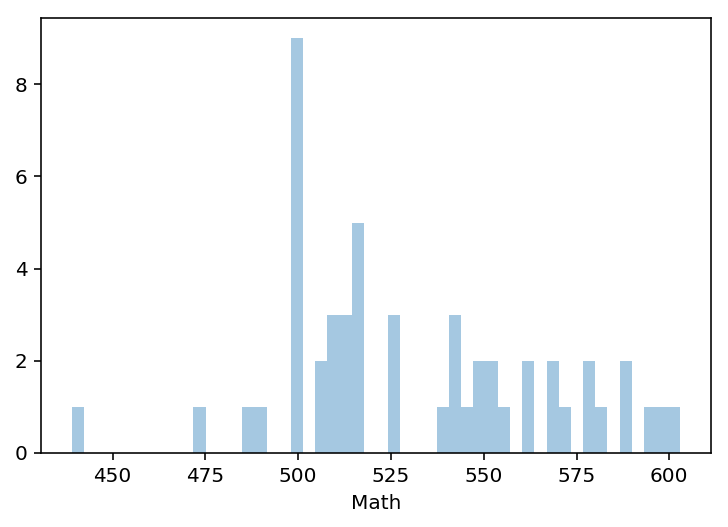

In [11]:
sns.distplot(sat2['Math'],kde=False,bins=50)

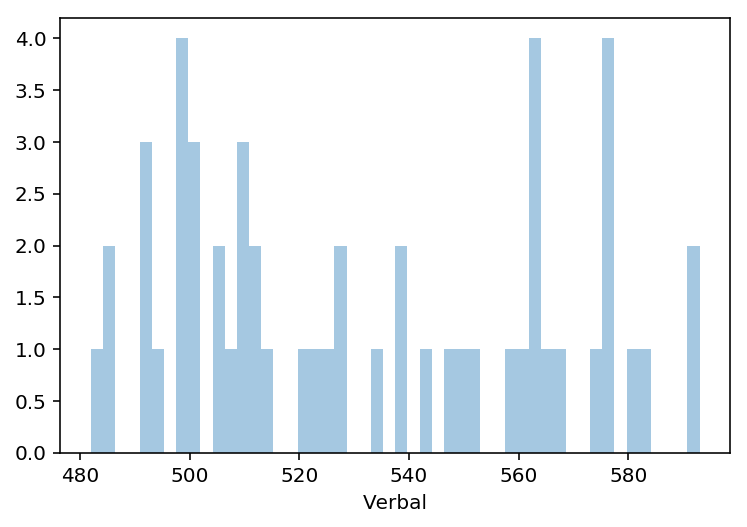

In [12]:
sns.distplot(sat2['Verbal'],kde=False,bins=50)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

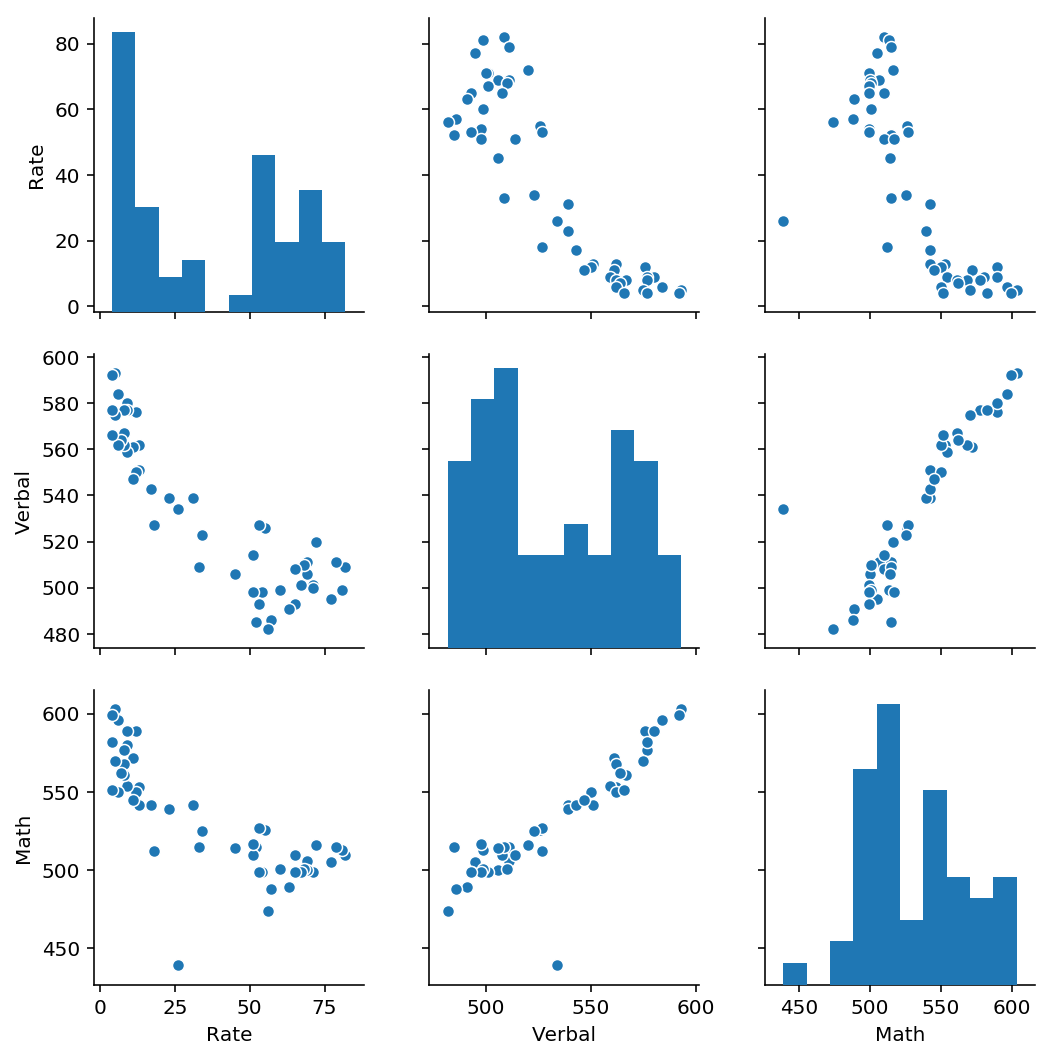

In [13]:
sns.pairplot(sat2)

Ans: 
The 'Rate' data is right-skewed, the 'Math' data looks a bit left-skewed, and the 'Verbal' data looks fairly symmetric.
The 'Verbal' and 'Math' scores seem to have a relatively strong positive relationship.
The 'Rate' seems to have a relatively strong negative relationship with the 'Verbal' and 'Math' results respectively.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

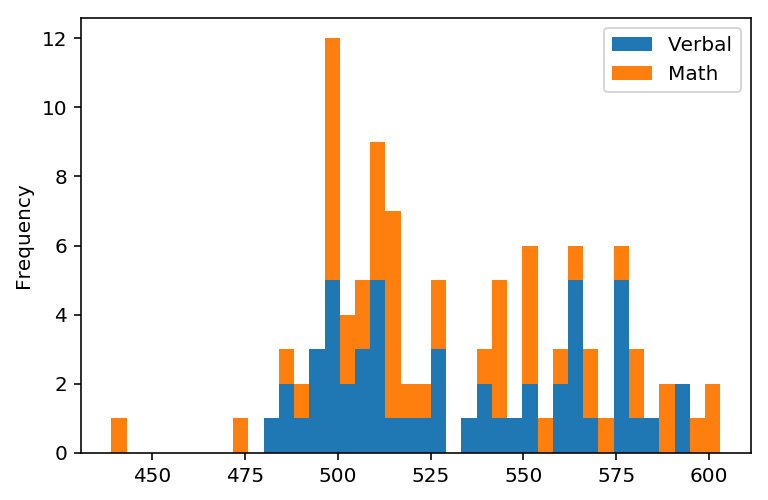

In [14]:
sat2.loc[:,['Verbal','Math']].plot.hist(stacked=True,bins=40)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

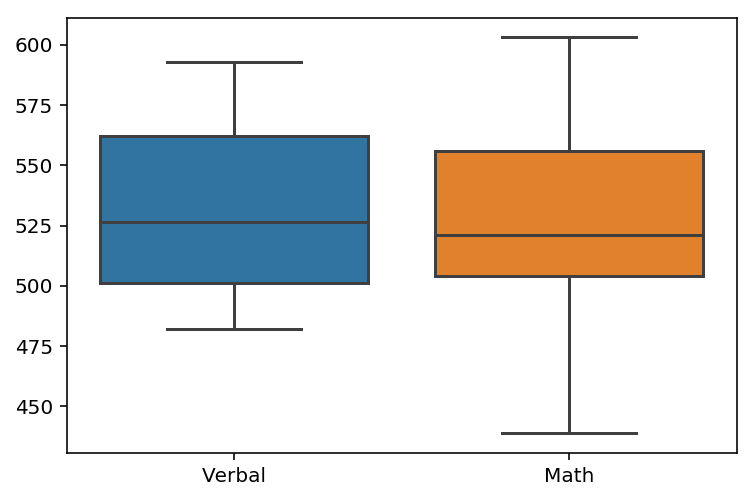

In [15]:
sns.boxplot(data=sat2.loc[:,['Verbal','Math']])

Q: What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

Ans: The spread, outliers, median and range can be seen clearly when a boxplot is used as compared to a scatterplot or a histogram.

Q: What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

Ans: As 'Rate' is a percentage out of 100, the vertical axis will be scaled differently when a boxplot of 'Rate' is plotted on the same chart as 'Math' and 'Verbal'. Hence, the 'Math' and 'Verbal' boxplots may be hard to read due to the change in scale.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


Ans: I will rescale the variables using standardisation, which forces the distribution of each variable to have a mean of 0 and a standard deviation of 1. This allows the scale to be common across all numeric fields. The formula is as below:

standardized_variable = (variable - mean_of_variable) / std_dev_of_variable

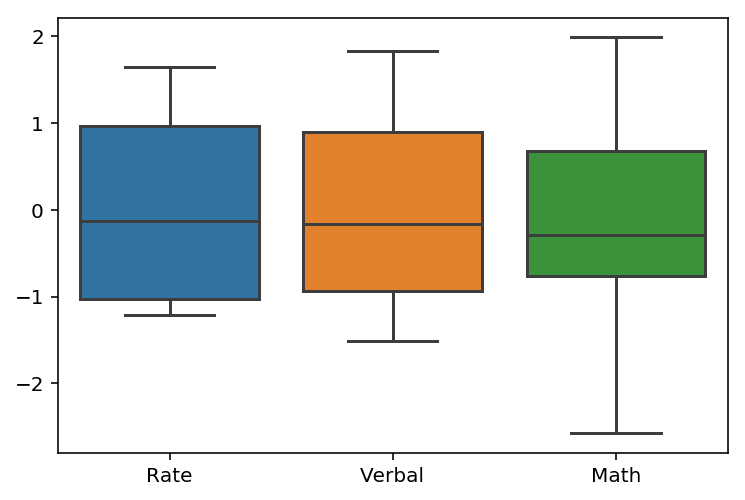

In [49]:
sat3 = sat2.loc[:,'Rate':'Math']
sat3_stand = (sat3 - sat3.mean()) / sat3.std()
sns.boxplot(data=sat3_stand)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [17]:
sat2['Verbal'].mean()

532.0192307692307

In [18]:
sat2[sat2['Verbal']>(sat2['Verbal'].mean())]

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

In [19]:
sat2[sat2['Verbal']>(sat2['Verbal'].mean())]['State'].count()

24

Ans: 24 states are above the mean. It shows that the distribution is right-skewed.

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [20]:
sat2[sat2['Verbal']>(sat2['Verbal'].median())]

State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

Ans: The number of states having the 'Verbal' scores greater than the median of 'Verbal' scores across states is higher than the number of states having the 'Verbal' scores greater than the mean of 'Verbal' scores across states. This is due to the fact that the distribution being right-skewed.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [21]:
sat2['Verbal-Math'] = sat2['Verbal'] - sat2['Math']
sat2.head()

State  Rate  Verbal  Math  Verbal-Math
0    CT    82     509   510           -1
1    NJ    81     499   513          -14
2    MA    79     511   515           -4
3    NY    77     495   505          -10
4    NH    72     520   516            4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [22]:
verbal_minus_math_greatest = sat2.sort_values('Verbal-Math',ascending=False).head(10)
verbal_minus_math_greatest.head(3)

State  Rate  Verbal  Math  Verbal-Math
27    OH    26     534   439           95
50    MS     4     566   551           15
29    WV    18     527   512           15

In [23]:
math_minus_verbal_greatest = sat2.sort_values('Verbal-Math',ascending=True).head(10)
math_minus_verbal_greatest.head(3)

State  Rate  Verbal  Math  Verbal-Math
21    HI    52     485   515          -30
23    CA    51     498   517          -19
1     NJ    81     499   513          -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [24]:
sat2.corr(method='pearson')

Rate    Verbal      Math  Verbal-Math
Rate         1.000000 -0.886432 -0.773746    -0.101412
Verbal      -0.886432  1.000000  0.899871     0.052600
Math        -0.773746  0.899871  1.000000    -0.388219
Verbal-Math -0.101412  0.052600 -0.388219     1.000000

Ans: The correlation matrix tells me that there is a strong negative linear relationship between:
1. 'Rate' and 'Verbal', and
2. 'Rate' and 'Math'.

There is a weak negative linear relationship between:
1. 'Rate' and 'Verbal-Math', and
2. 'Math' and 'Verbal-Math'.

There is a strong positive linear relationship between:
1. 'Verbal' and 'Math'.

There is a weak positive linear relationship between:
1. 'Verbal' and 'Verbal-Math'.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [25]:
sat2.describe()

Rate      Verbal        Math  Verbal-Math
count  52.000000   52.000000   52.000000    52.000000
mean   37.153846  532.019231  531.500000     0.519231
std    27.301788   33.236225   36.014975    15.729939
min     4.000000  482.000000  439.000000   -30.000000
25%     9.000000  501.000000  504.000000    -6.000000
50%    33.500000  526.500000  521.000000     0.000000
75%    63.500000  562.000000  555.750000     4.250000
max    82.000000  593.000000  603.000000    95.000000

count: No of items in row

mean: Sum of observations in column divided by count of column

std: Standard deviation, a quantity expressing by how much each observation of a column differs from its mean value

min: minimum value in column

25%: lower quartile (or 25th percentile)

50%: median (or 50th percentile)

75%: upper quartile (or 75th percentile)

max: maximum value in column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [26]:
sat2.cov()

Rate       Verbal         Math  Verbal-Math
Rate         745.387632  -804.355958  -760.803922   -43.552036
Verbal      -804.355958  1104.646682  1077.147059    27.499623
Math        -760.803922  1077.147059  1297.078431  -219.931373
Verbal-Math  -43.552036    27.499623  -219.931373   247.430995

Ans: 
1. Covariance is a measure used to indictate the extent to which two random variables change in tandem, whereas correlation  is a measure used to represent how strongly two random variables are related. Correlation values are always in between -1 and 1, whereas covariance values can be any real number.
2. Correlation is the covariance of X and Y, divided by the product of the standard deviations of X and Y.
3. Correlation is preferred over covariance, because it remain unaffected by the change in location and scale, and can also be used to make a comparision between two pairs of variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [27]:
drugs_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'
drugs = pd.read_csv(drugs_url)
drugs

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0                 -        0.0   

   crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0                -        ...                    0.1                24.5   
1              3.0        ...                    0.1                41.0   
2                -        ...                    0.4                 4.5   
3              9.5        ...                    0.8                 3.0   
4              1.0        ...                    1.1                 4.0   
5             21.0        ...                    1.4                 6.0   
6             10.0        ...                    1.7                 7.0   
7              2.0        ...                    1.5                 7.5   
8              5.0        ...                    1.7                12.0   
9             17.0        ...                    1.3                13.5   
10             5.0        ...                    1.7                17.5   
11             6.0        ...                    1.3                20.0   
12             6.0        ...                    1.2                13.5   
13            15.0        ...                    0.9                46.0   
14            48.0        ...                    0.3                12.0   
15            62.0        ...                    0.4                 5.0   
16               -        ...                    0.0                   -   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2               

In [28]:
drugs.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [29]:
drugs['cocaine-frequency'] = drugs['cocaine-frequency'].apply((lambda x: x.replace('-','0'))).astype('float')
drugs['crack-frequency'] = drugs['crack-frequency'].apply((lambda x: x.replace('-','0'))).astype('float')
drugs['heroin-frequency'] = drugs['heroin-frequency'].apply((lambda x: x.replace('-','0'))).astype('float')
drugs['inhalant-frequency'] = drugs['inhalant-frequency'].apply((lambda x: x.replace('-','0'))).astype('float')
drugs['oxycontin-frequency'] = drugs['oxycontin-frequency'].apply((lambda x: x.replace('-','0'))).astype('float')
drugs['meth-frequency'] = drugs['meth-frequency'].apply((lambda x: x.replace('-','0'))).astype('float')

In [30]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [31]:
#to get column headers of age + drug use/frequency
# separated into two lists
column_use = []
column_frequency = []
for drug in drugs:
    if drug=='age':
        column_use.append(drug) 
        column_frequency.append(drug)
    elif 'use' in drug:
        column_use.append(drug)
    elif 'frequency' in drug:
        column_frequency.append(drug)

# dataframe which consists of age and all drug use columns      
drugs_use = drugs.loc[:,column_use]
# dataframe which consists of age and all drug frequency columns
drugs_frequency = drugs.loc[:,column_frequency]

#standarding drugs_use dataframe, so I removed non-numerical fields first
drugs1 = drugs.loc[:,column_use[1:]]
#then I start to standardise the dataframe
drugs_use_stand = (drugs1 - drugs1.mean()) / drugs1.std()

#standarding drugs_use dataframe, so I removed non-numerical fields first
drugs2 = drugs.loc[:,column_frequency[1:]]
#then I start to standardise the dataframe
drugs_freq_stand = (drugs2 - drugs2.mean()) / drugs2.std()

# Analysis of Age vs Drugs Use

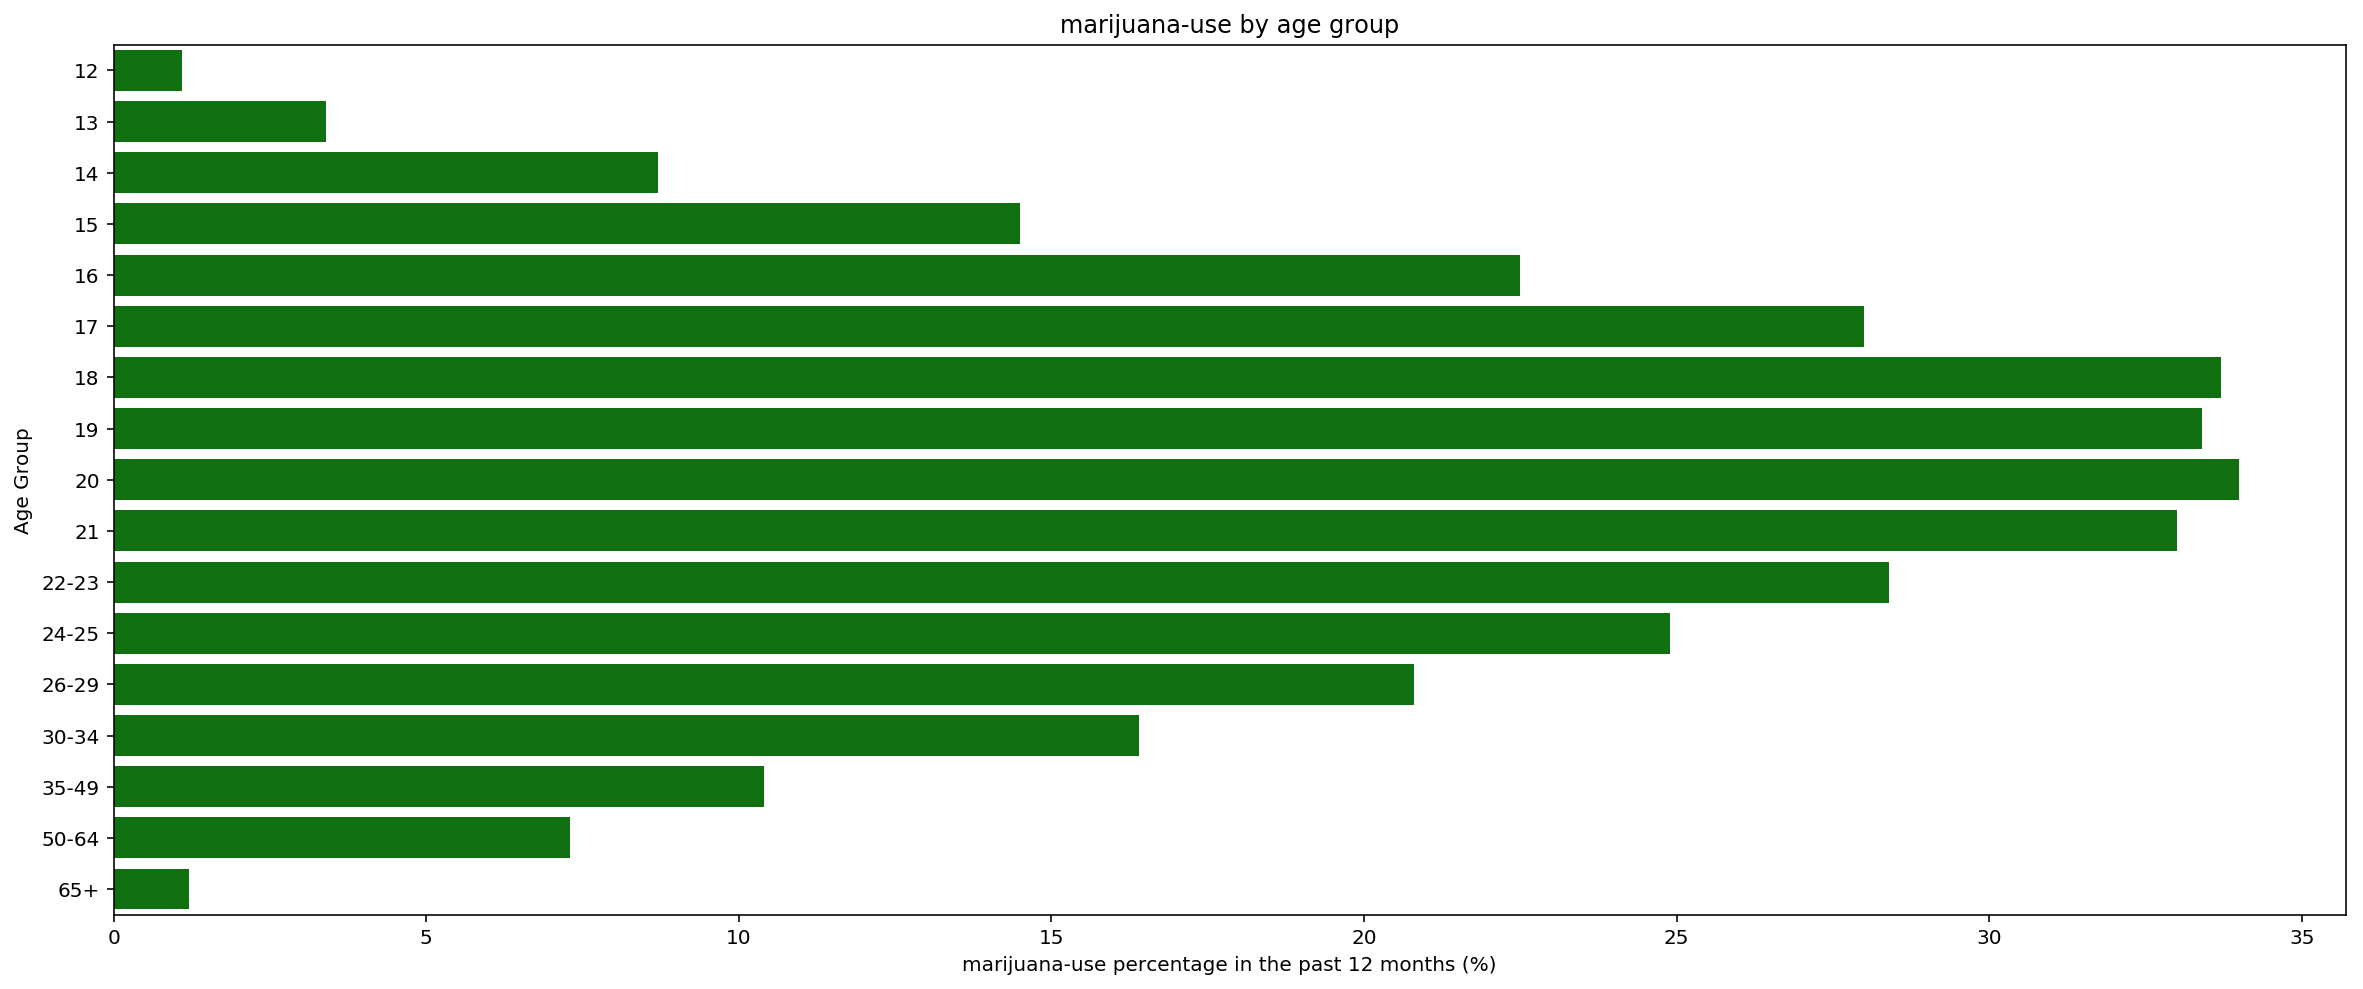

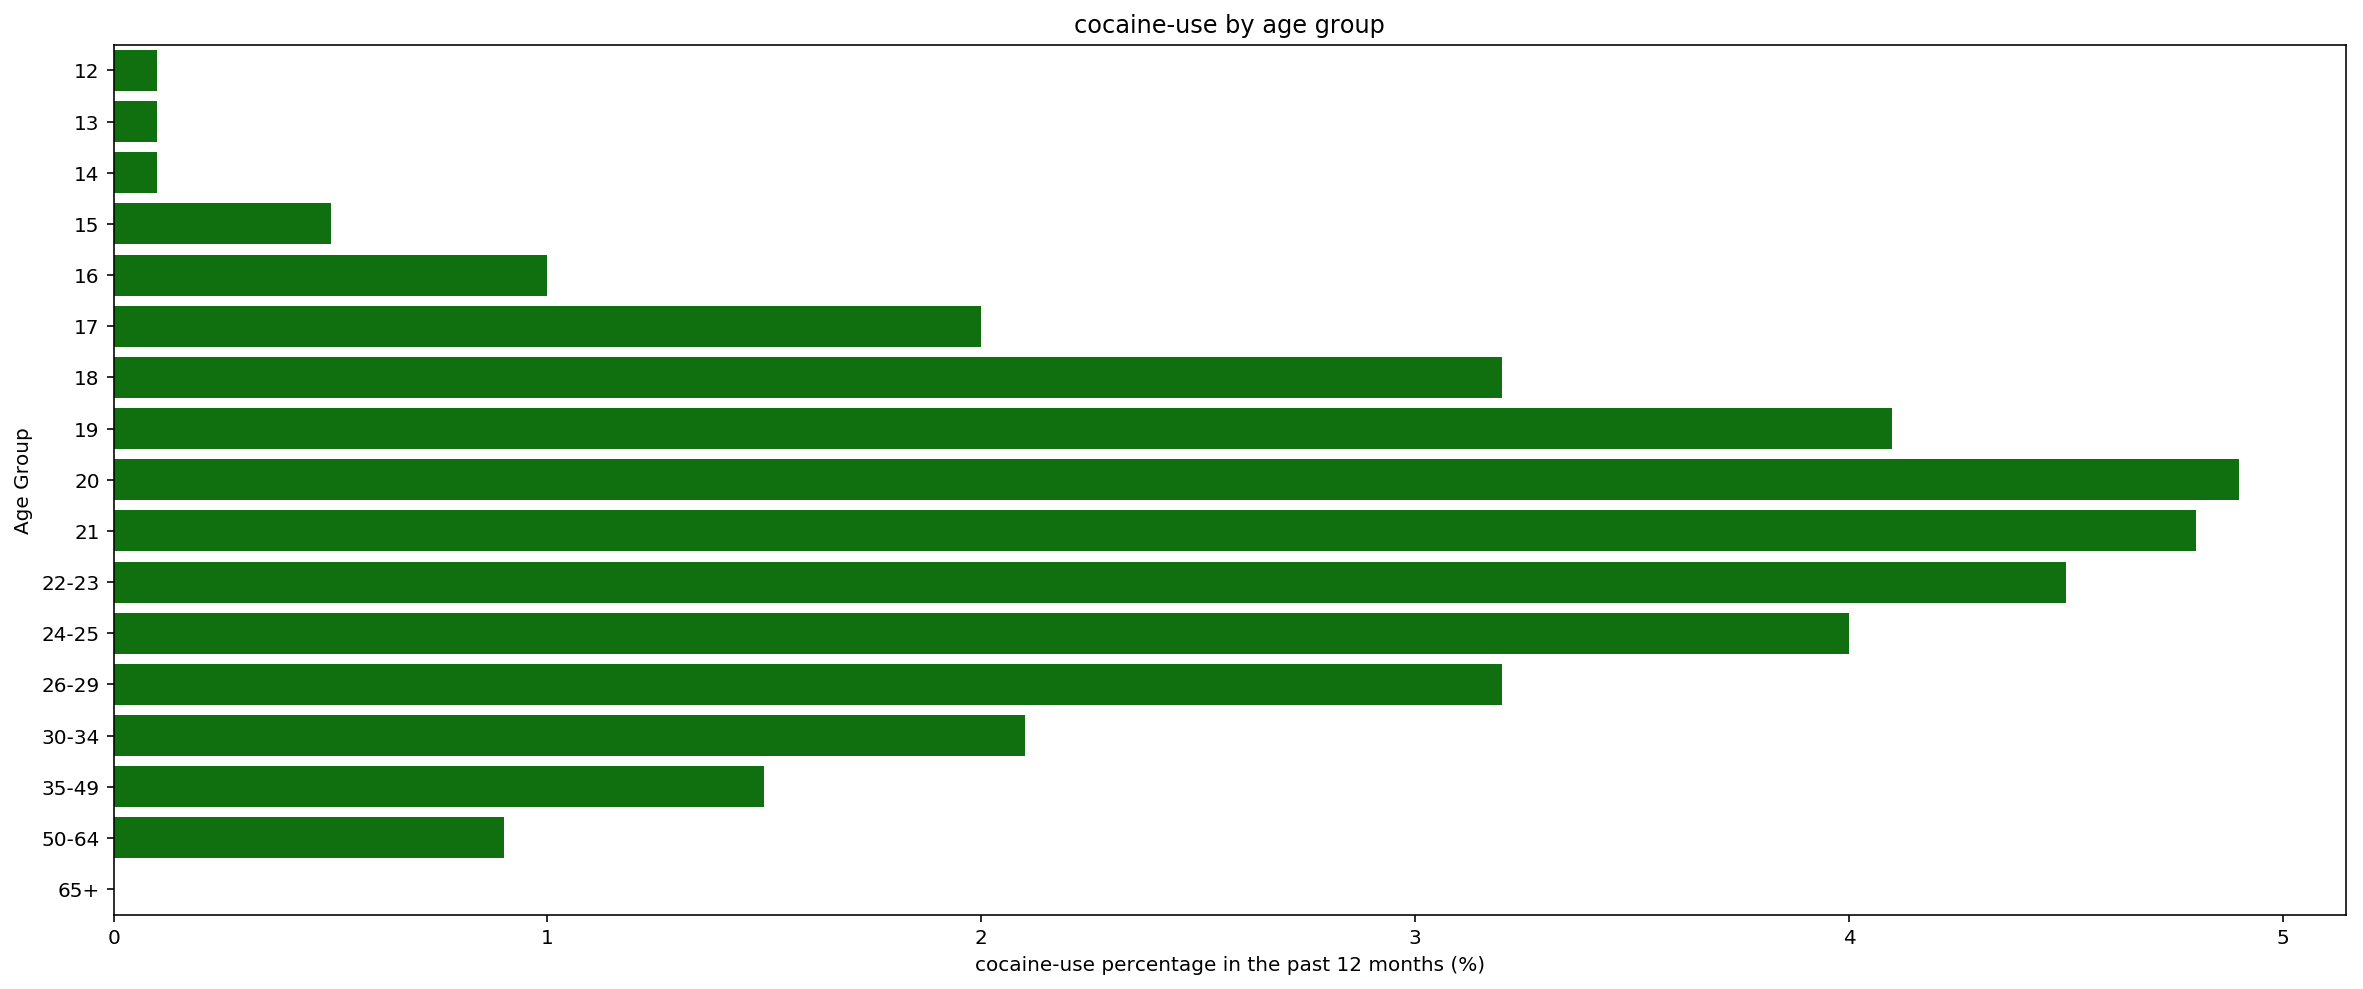

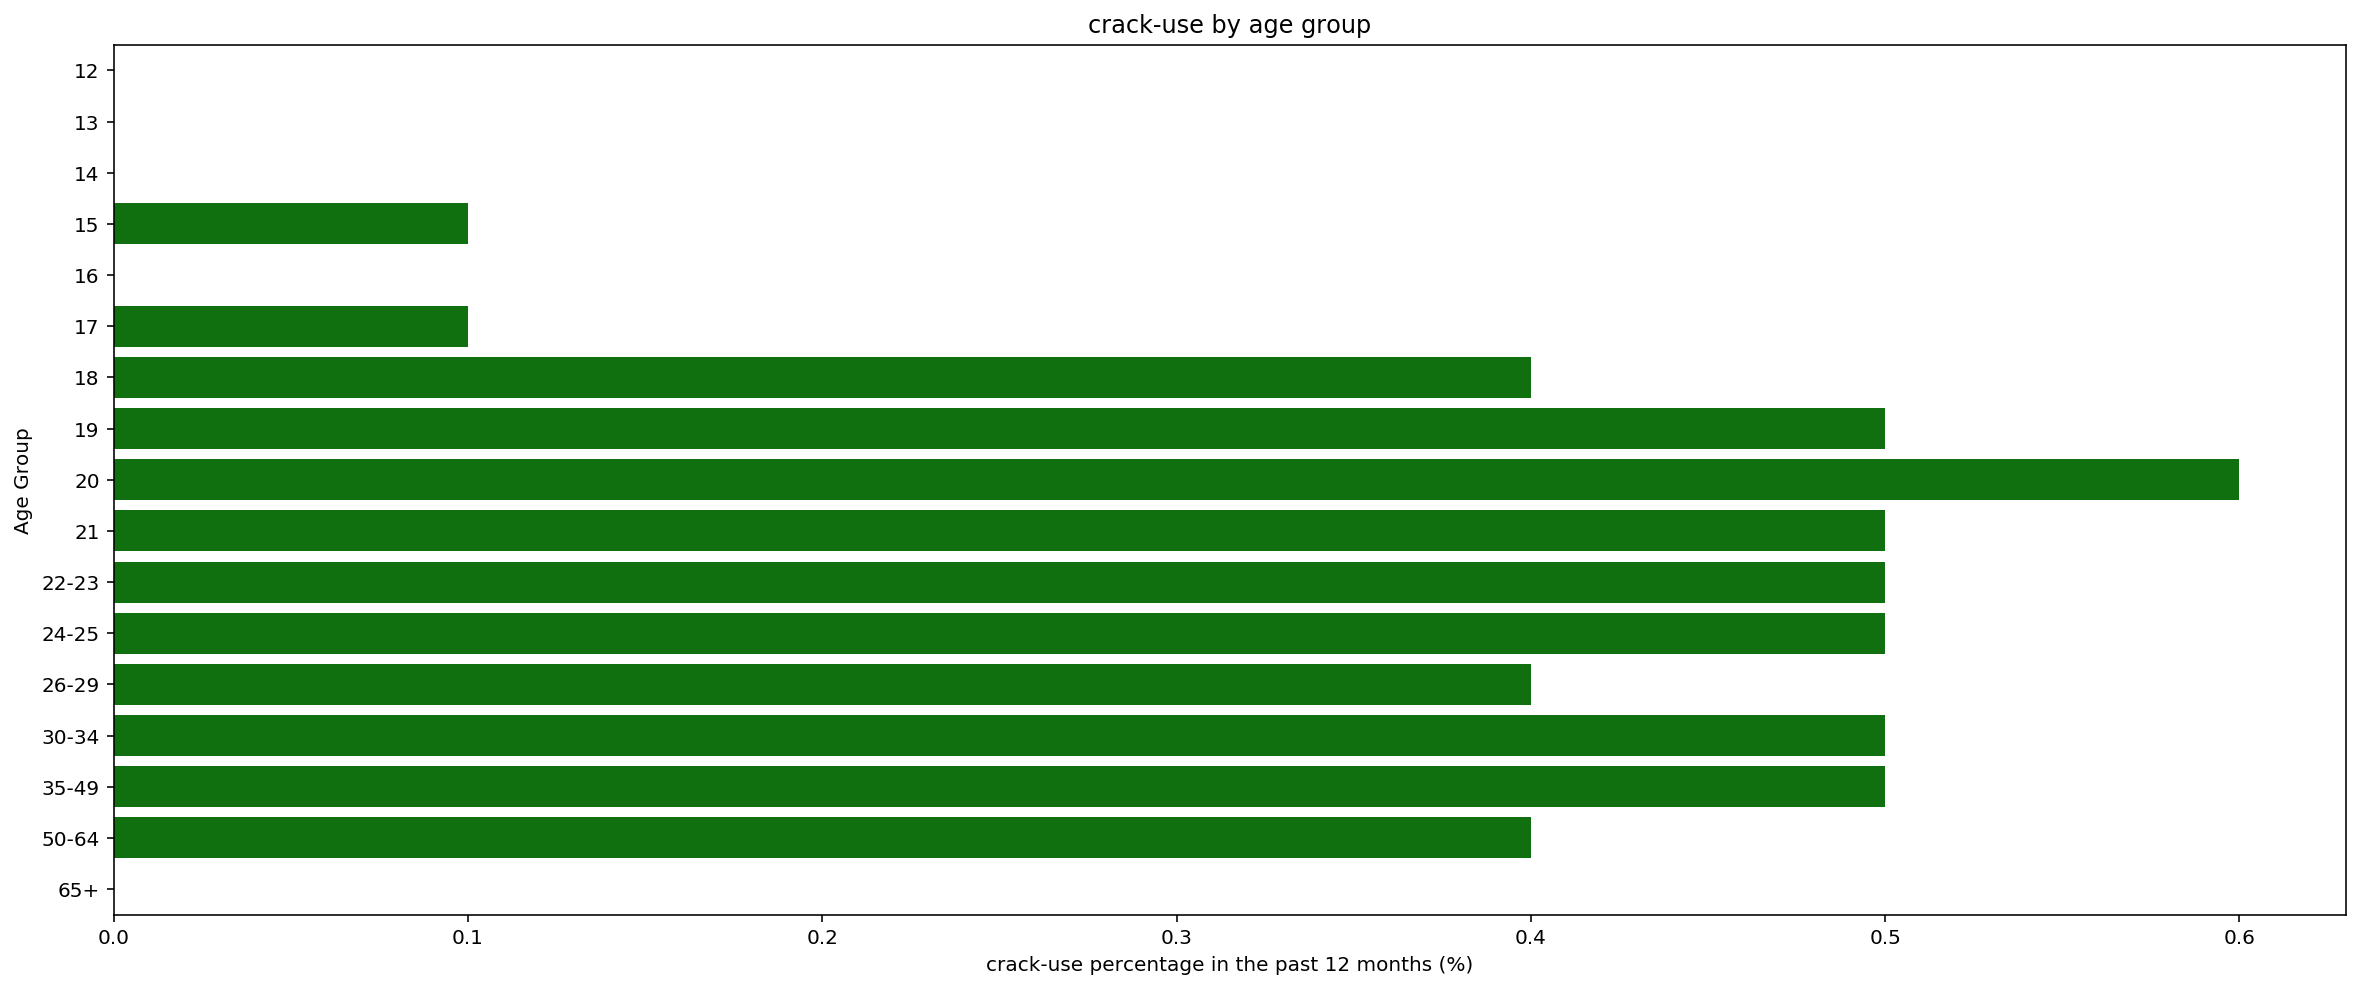

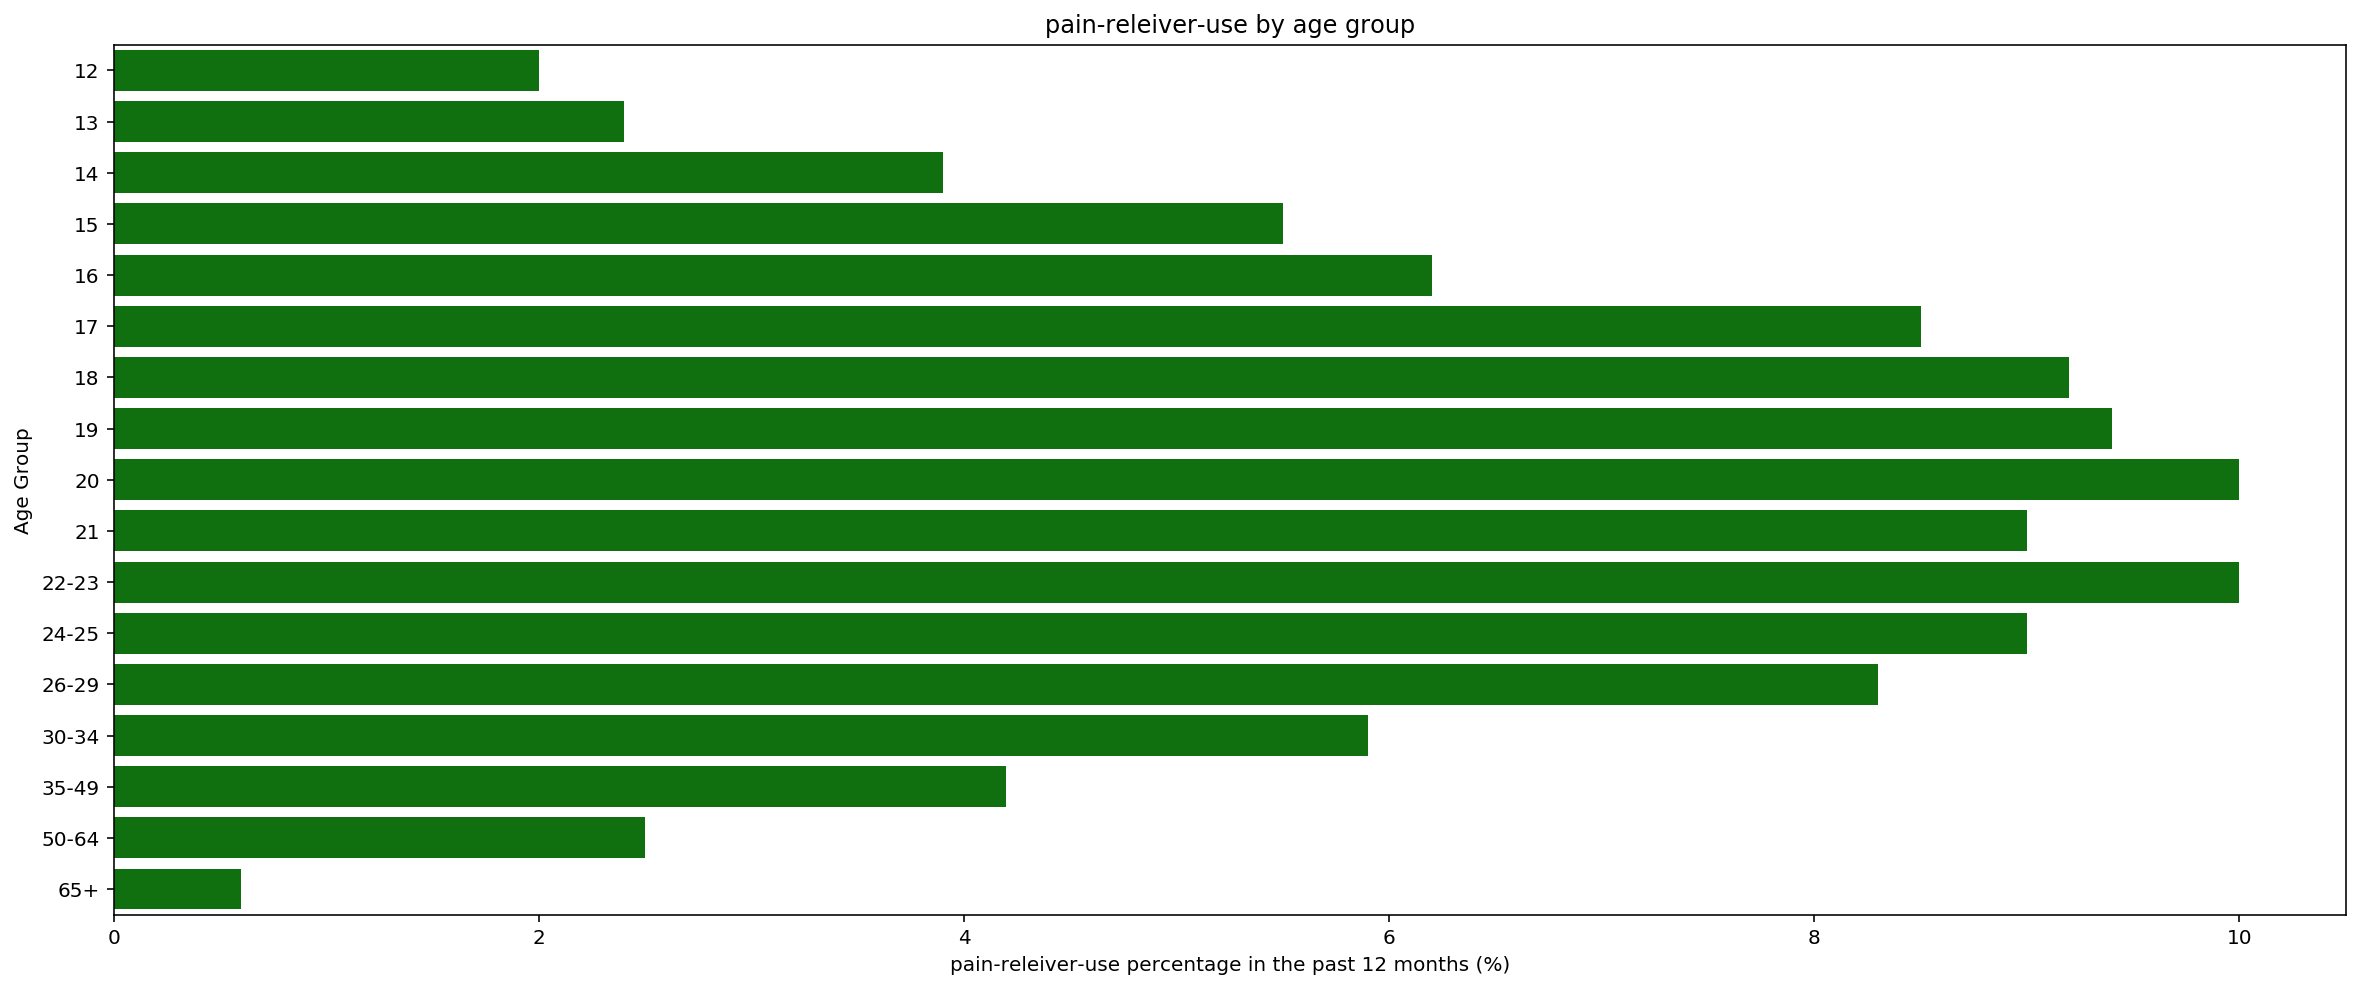

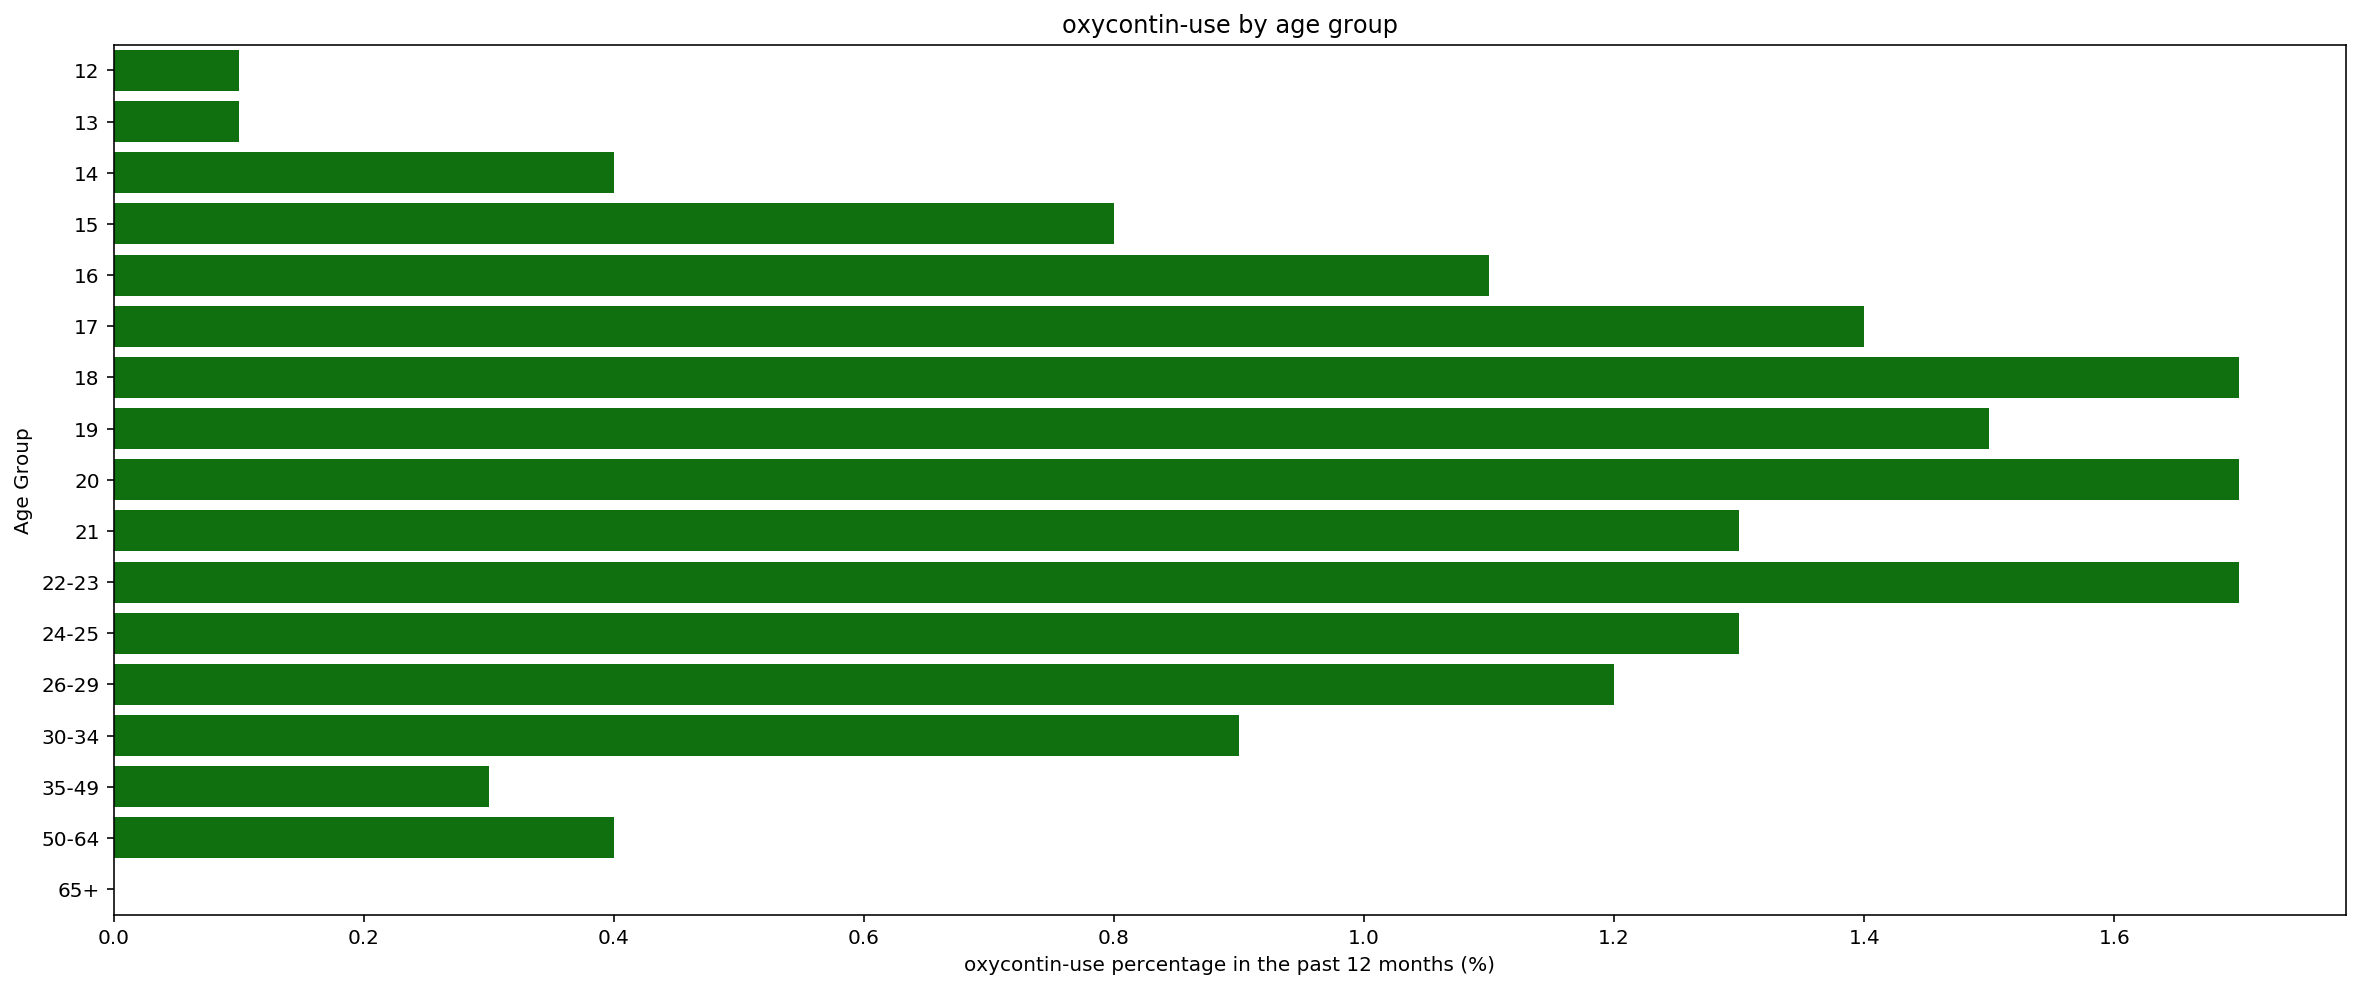

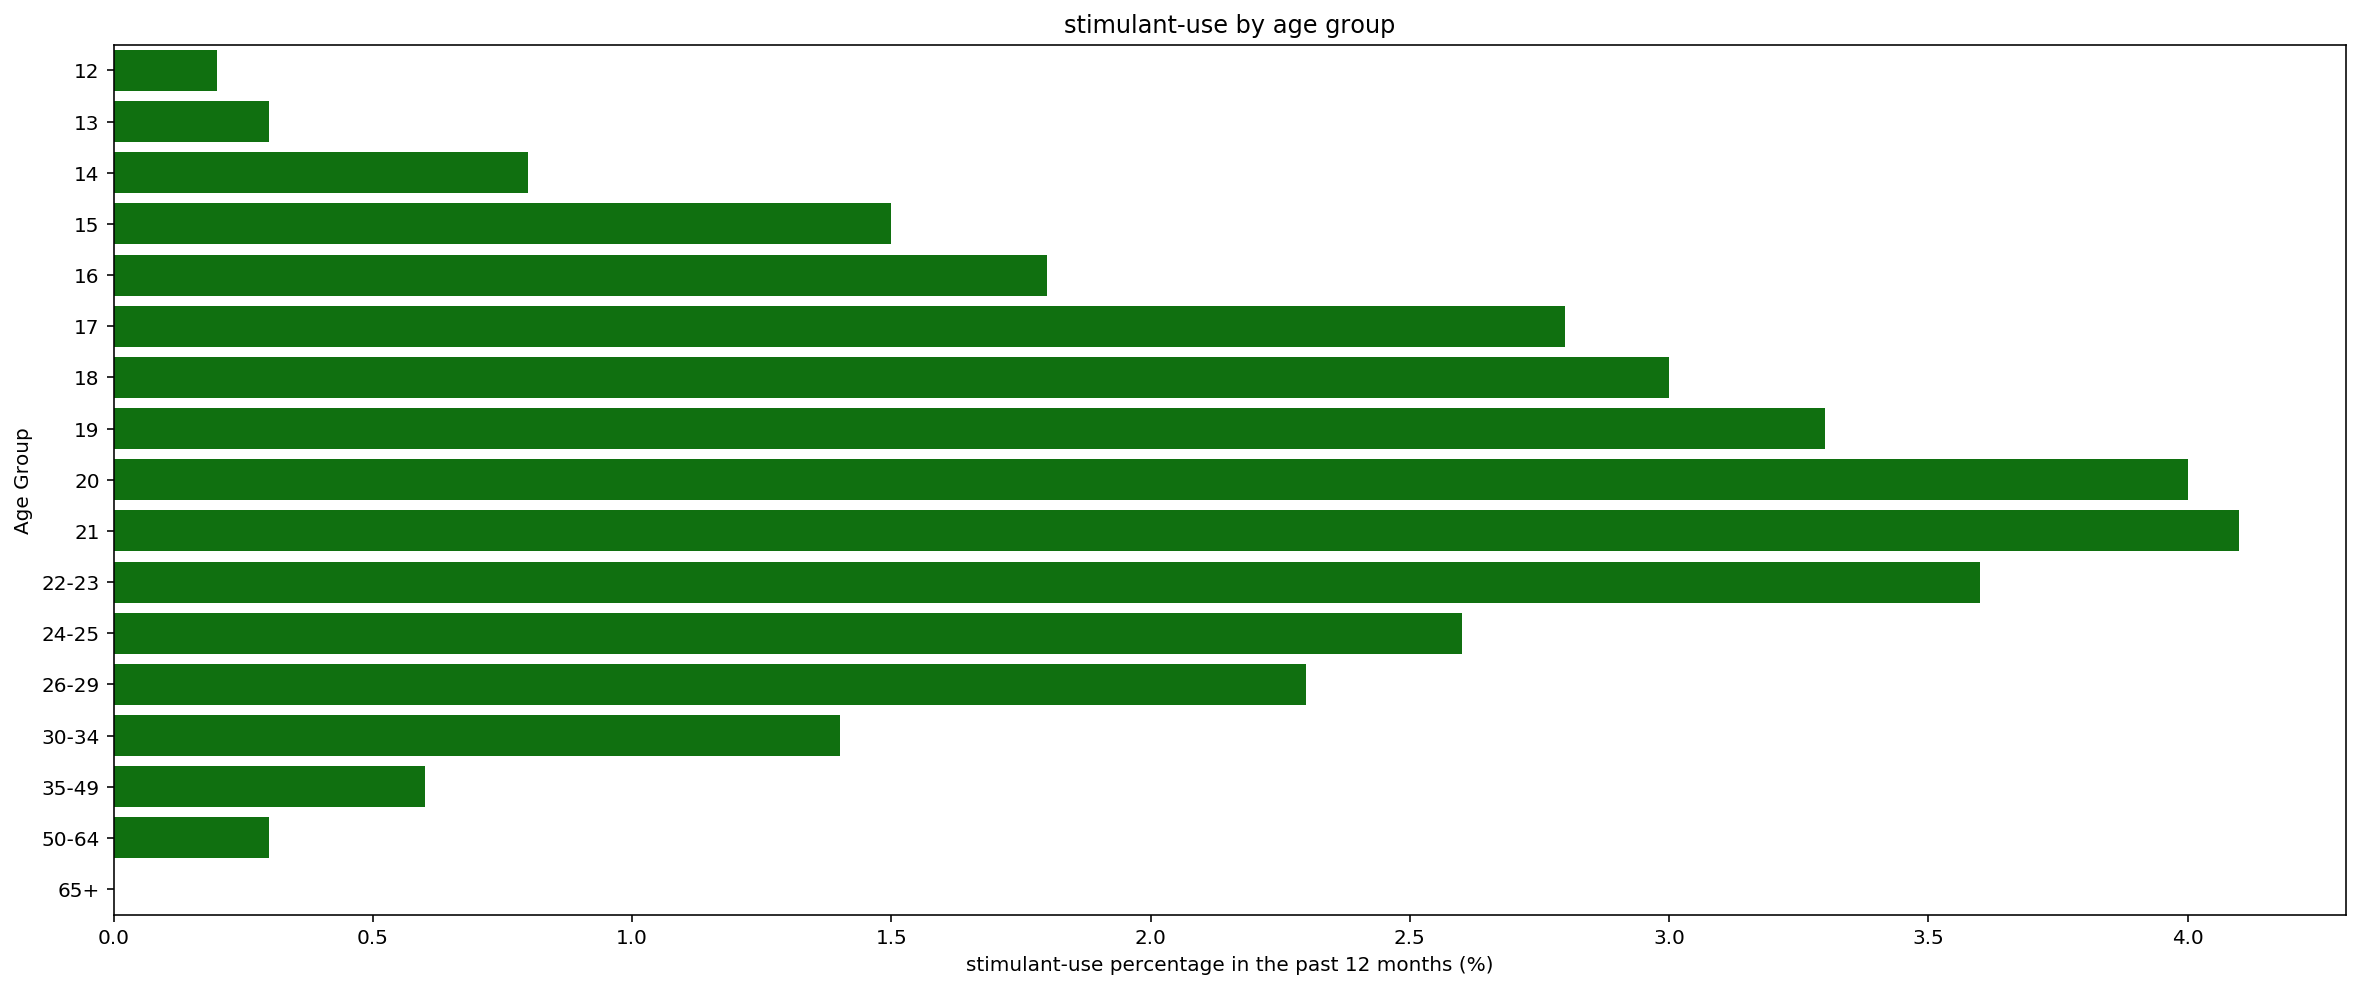

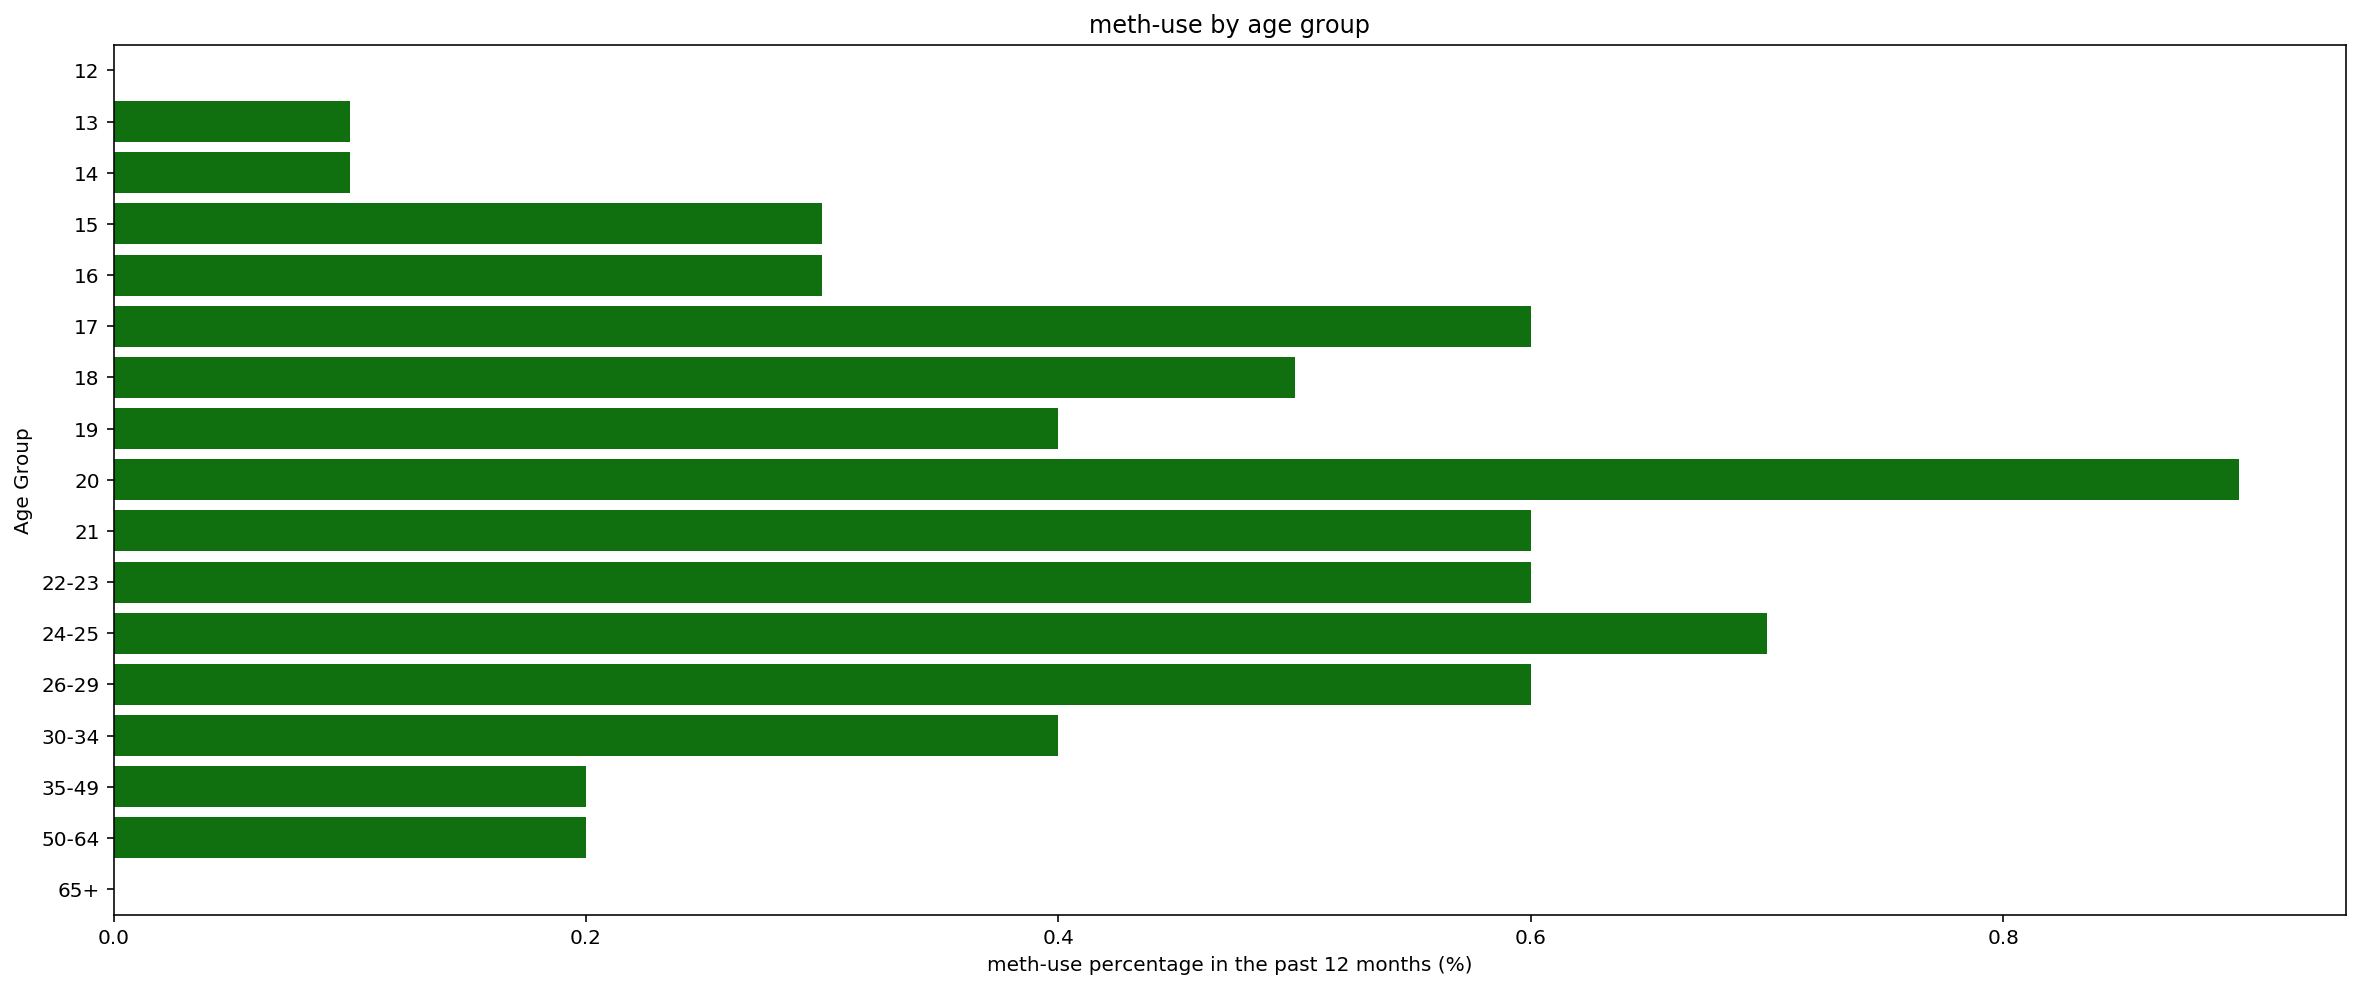

In [32]:
#I plotted all distributions of percentage per age group who used a drug in the past 12 months
# by age group per drug.

for i, col in enumerate(drugs_use.columns[1:]):
    plt.figure(i,figsize=(20,8))
    sns.barplot(y='age',x=col,data=drugs_use,orient="h",color='g')
    plt.title(col+' by age group')
    plt.xlabel(col +' percentage in the past 12 months (%)')
    plt.ylabel('Age Group')

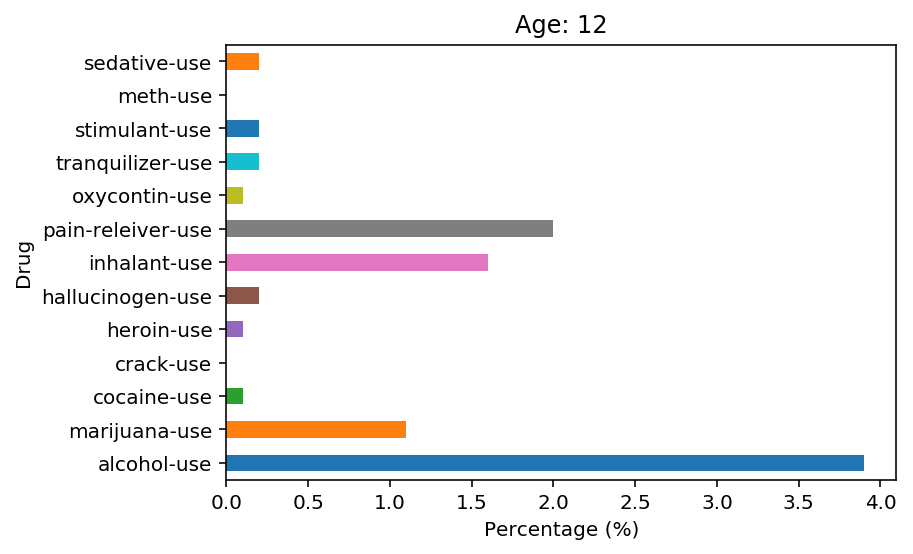

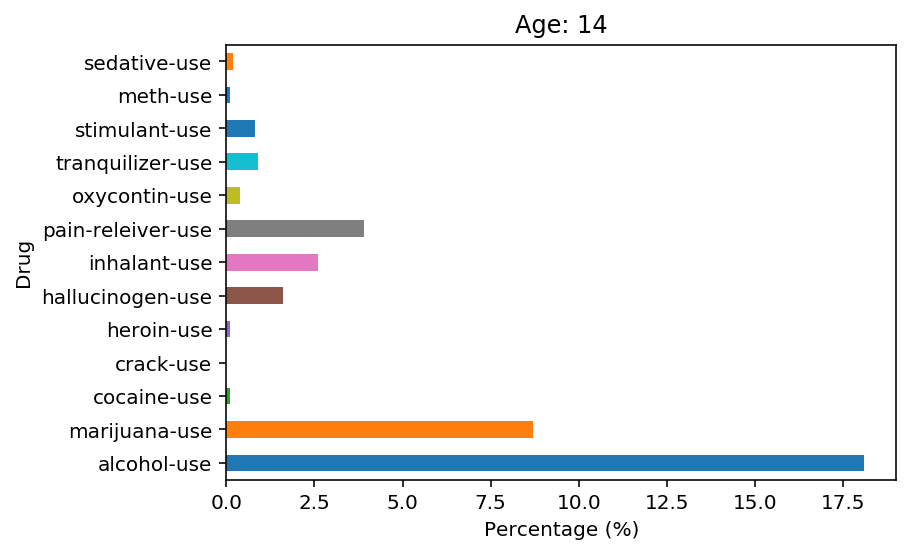

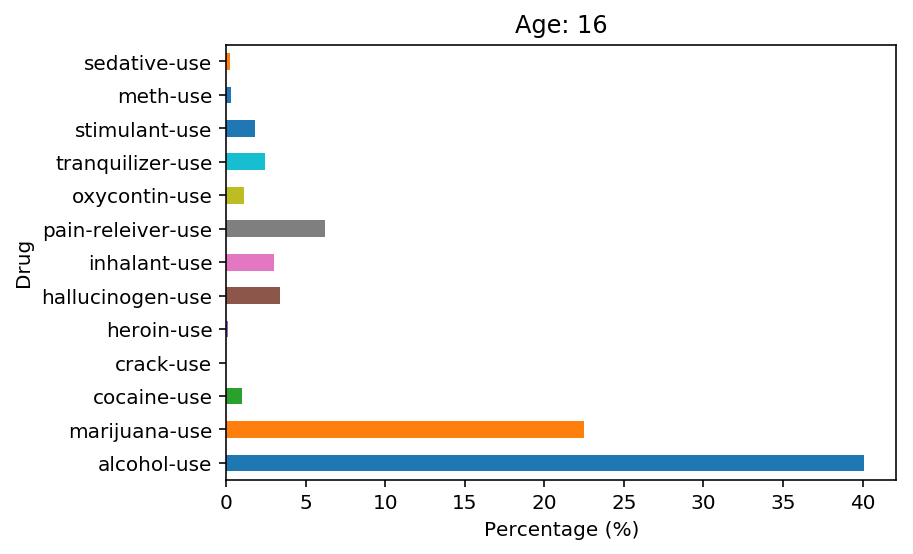

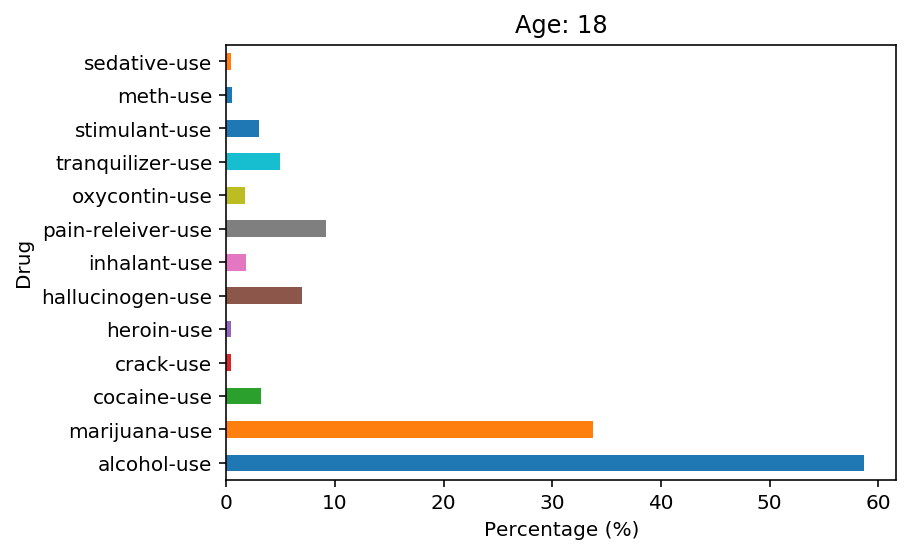

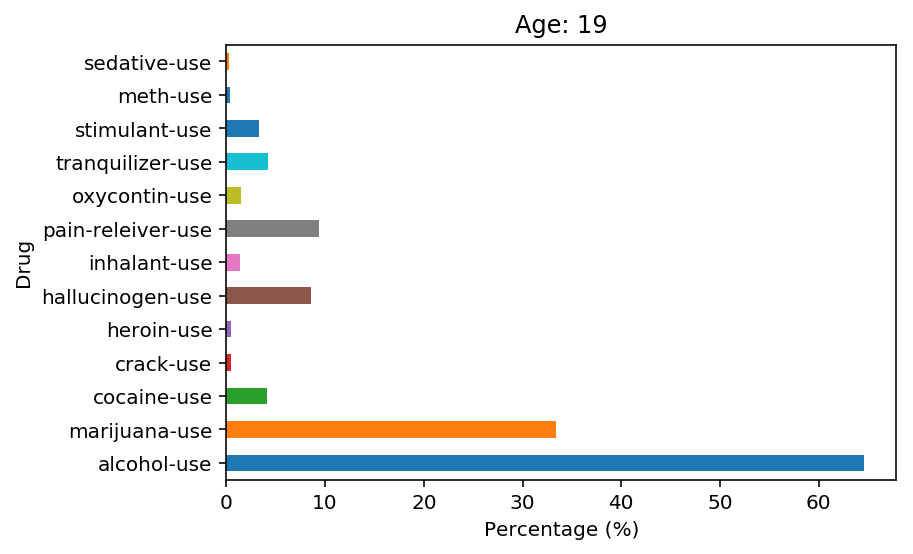

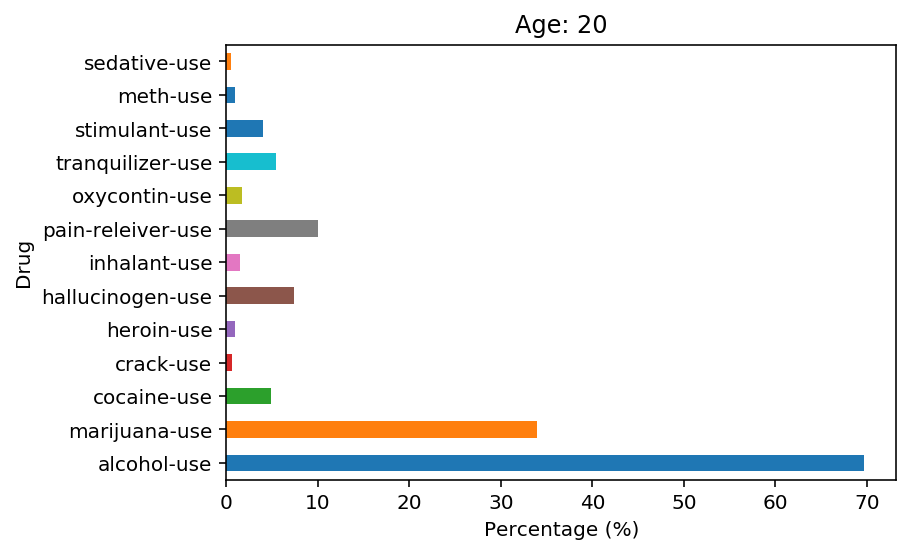

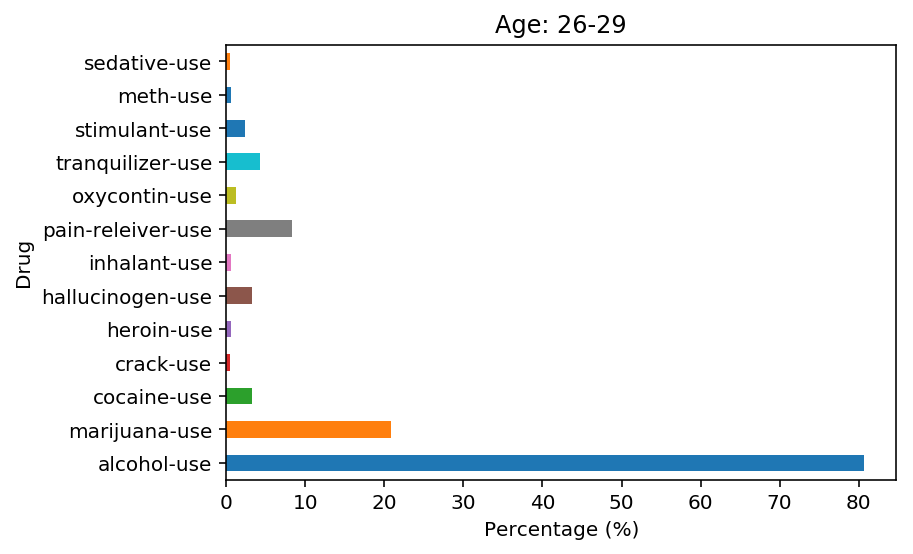

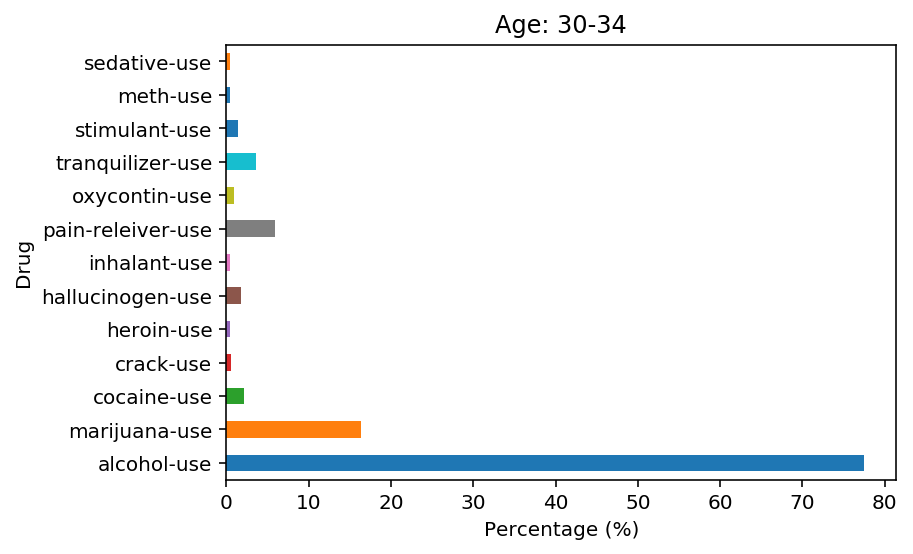

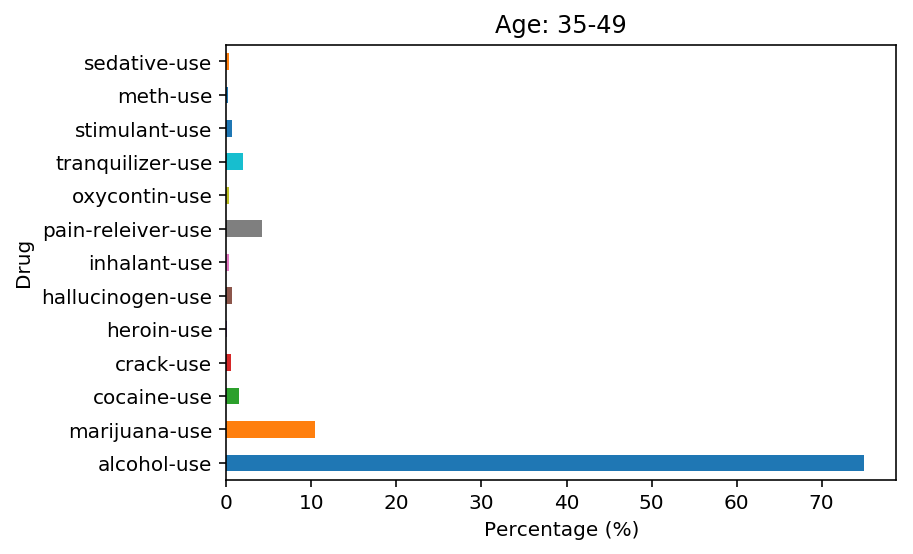

In [33]:
#I plotted all distributions of drug use by age group per chart.

for i in range(len(drugs_use)):
    plt.figure(i)
    drugs_use.iloc[i,1:].plot(kind='barh')
    plt.title('Age: '+drugs_use['age'][i])
    plt.xlabel('Percentage (%)')
    plt.ylabel('Drug')

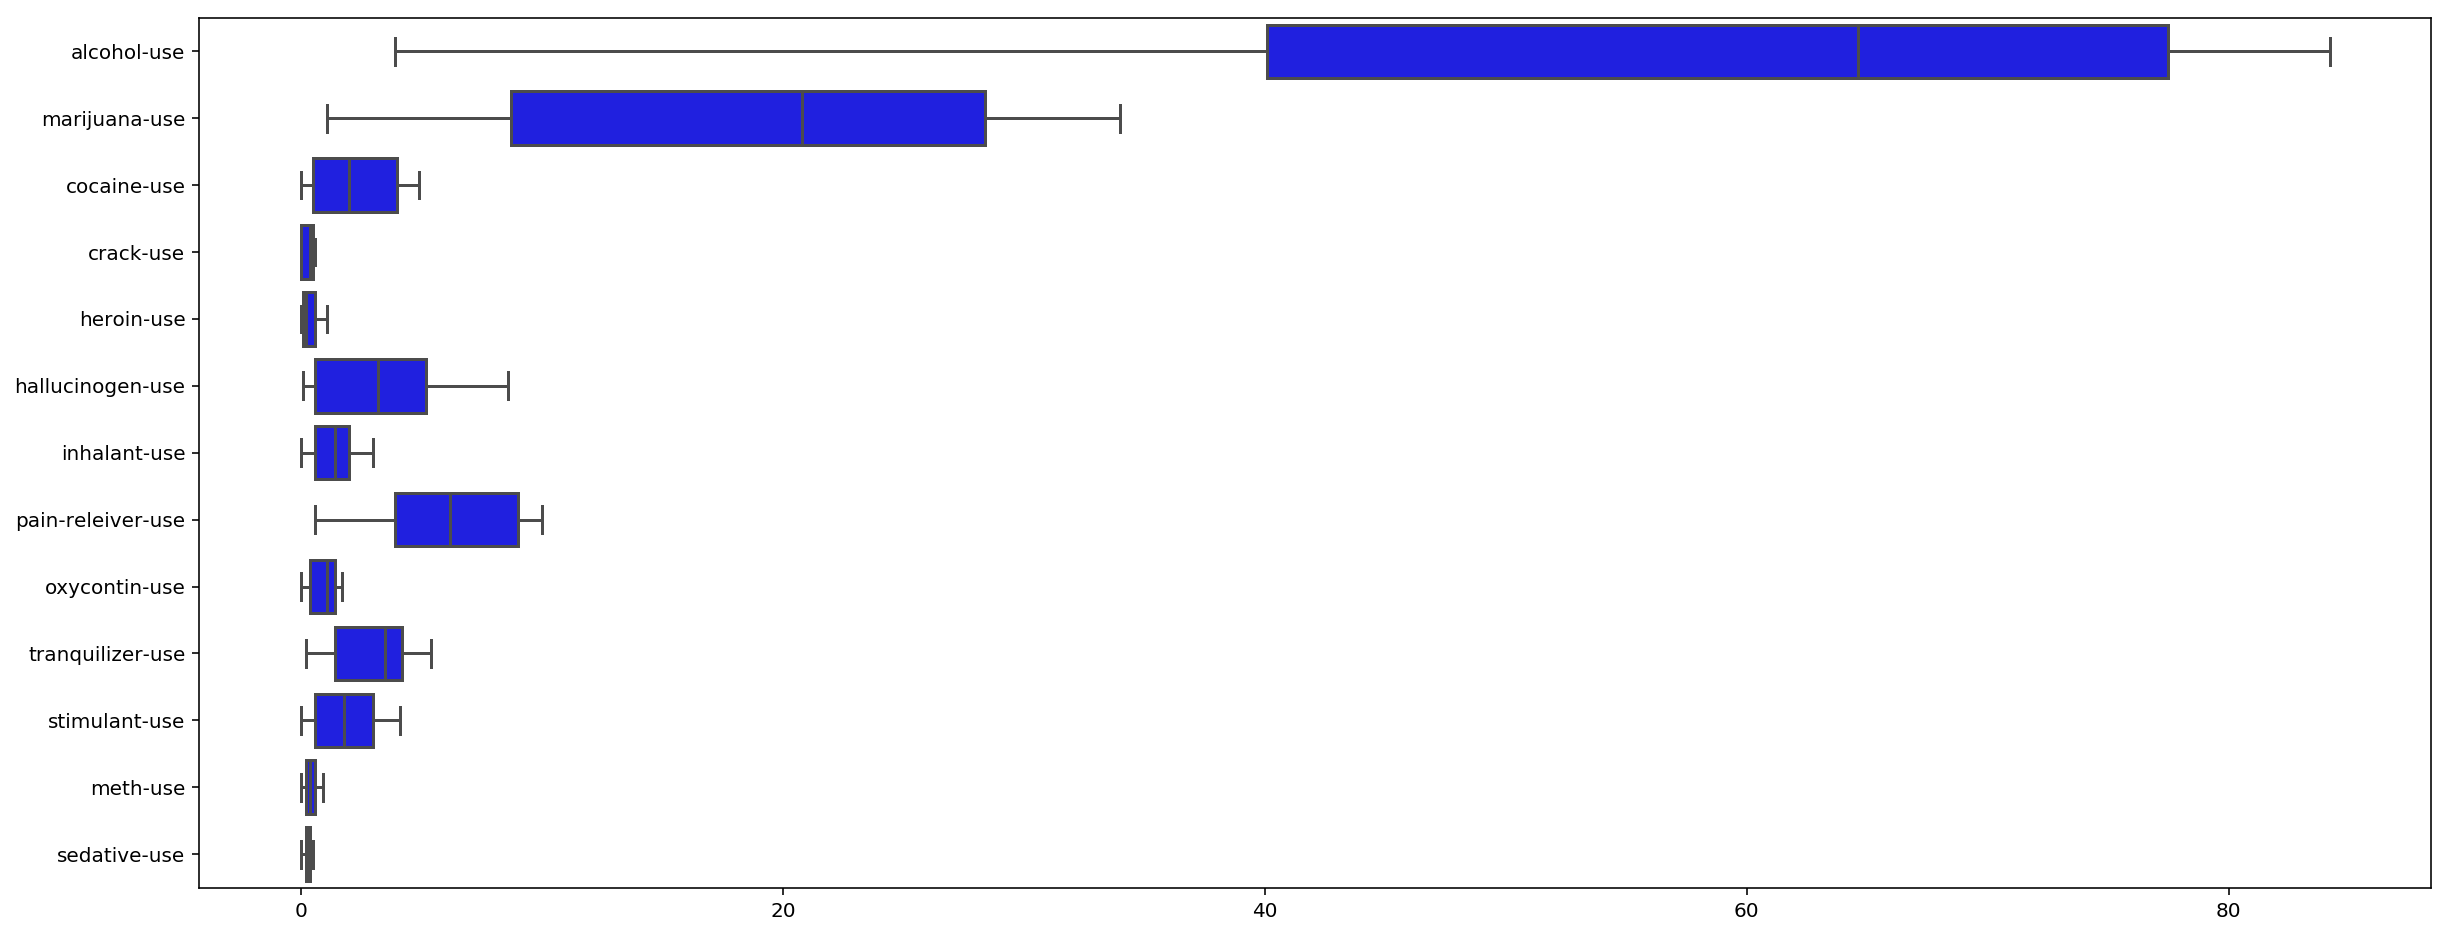

In [34]:
#I ploted the boxplots of all drug use columns before standardisation.
plt.figure(figsize=(20,8))
sns.boxplot(data=drugs_use,orient='h',color='b')
plt.show()

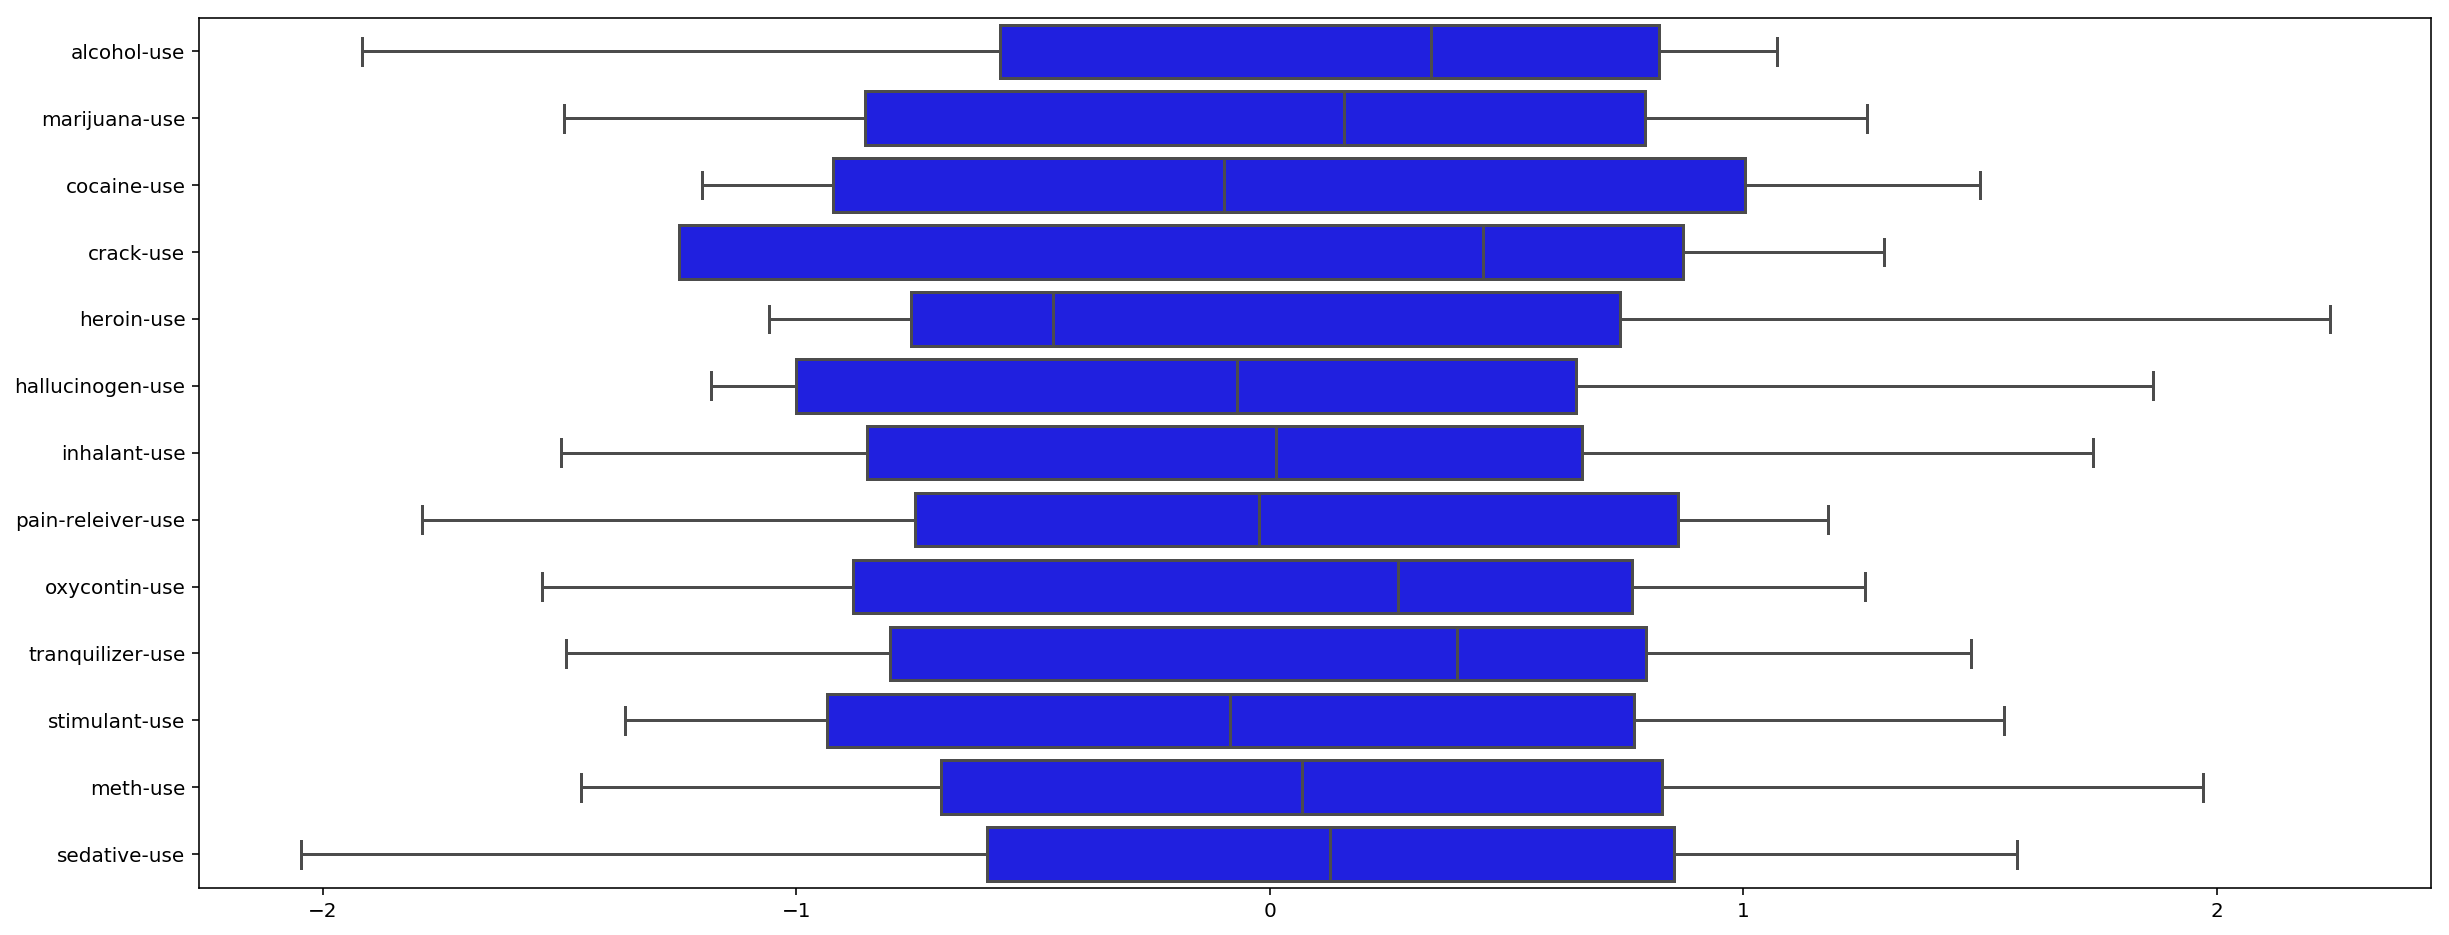

In [35]:
#I ploted the boxplots of all drug use columns after standardisation.
plt.figure(figsize=(20,8))
sns.boxplot(data=drugs_use_stand,orient='h',color='b')
plt.show()

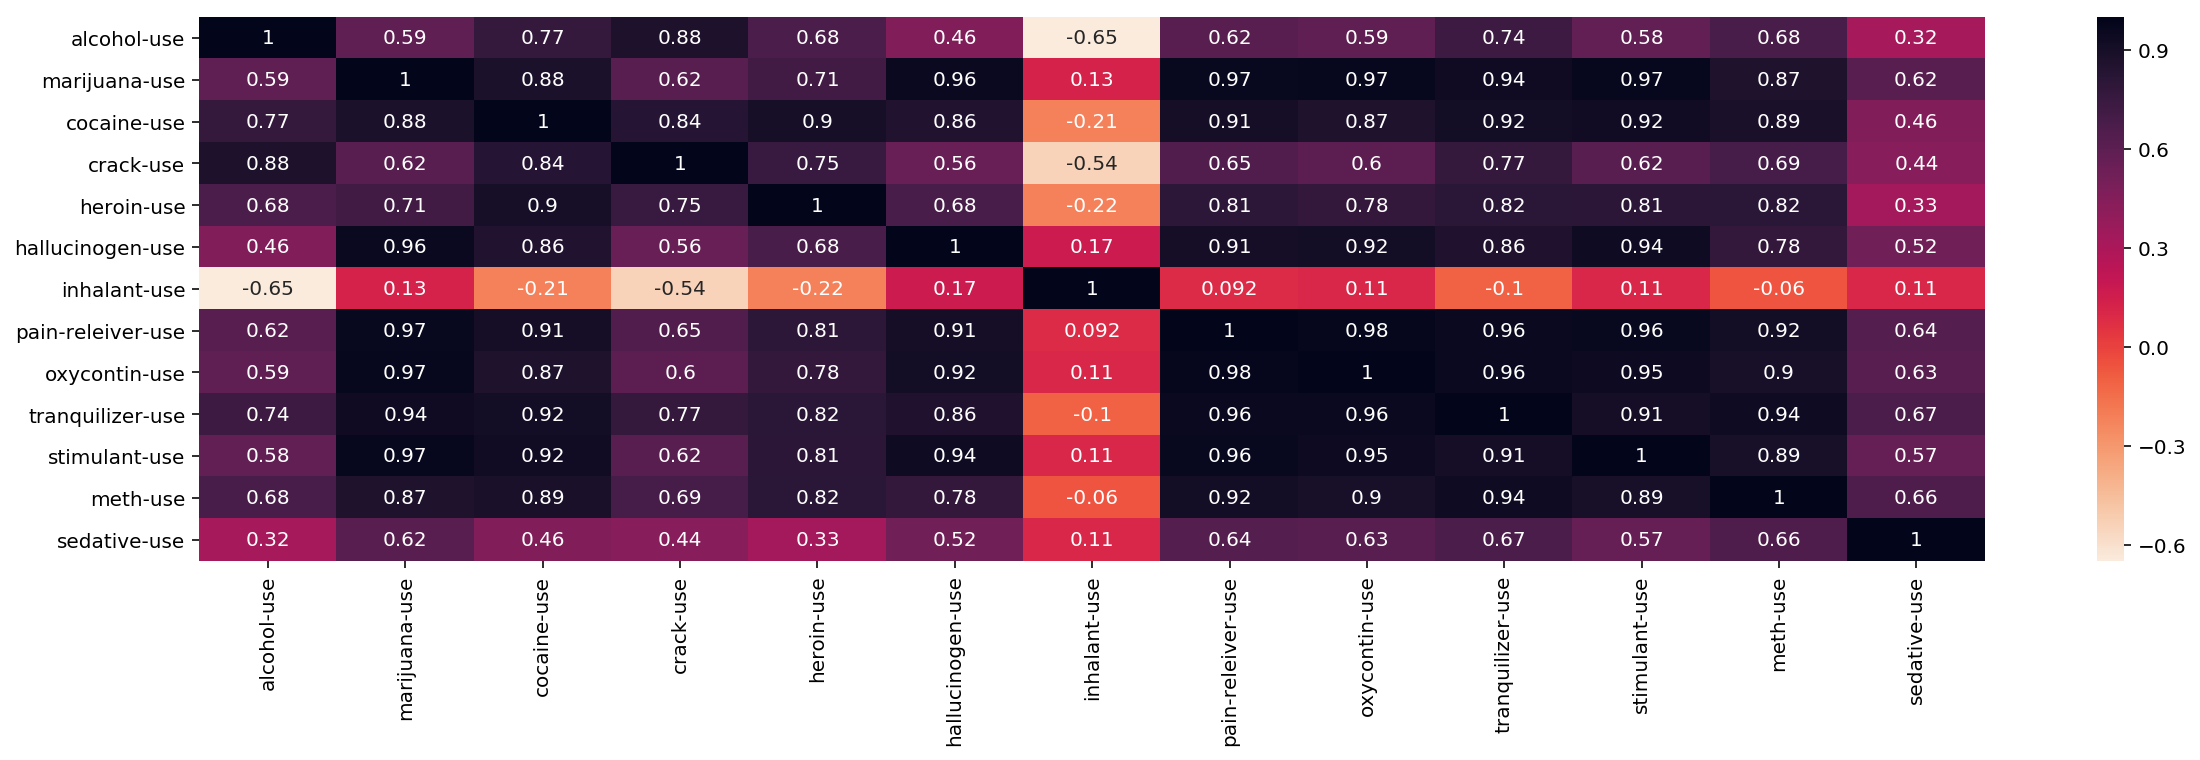

In [36]:
# I plotted a heatmap, which shows the correlation coefficients and colours of all drug 
# use columns.
plt.figure(figsize=(20,5))
sns.heatmap(drugs_use_stand.corr(method='pearson'), annot=True, cmap = sns.cm.rocket_r)
plt.show()

From the bar charts, most of the drug use data seem to be normally distributed for all ages, with some skewness for some drugs. However, I have noted that the age groupings are inconsistent, so I cannot assume that the data are normally distributed just because they look like one. 

By percentage points, most people from all age groups like to consume alcohol. Marijuana use also seems to be of a high percentage. This may be due to the fact that marijuana is legalised in the USA, hence abuse seems to be prevalent.

Some interesting findings for strong positive linear correlation (corrcoef>0.8):
1. alcohol-use is positively correlated to crack-use.
2. marijuana-use is positively correlated to cocaine-use, hallucinogen-use, pain-releiver use, oxycontin-use, transquilizer-use, stimulant-use, and meth-use respectively.
3. cocaine-use is positively correlated to crack-use, heroin-use, hallucinogen-use, pain-releiver use, oxycontin-use, transquilizer-use, stimulant-use, and meth-use respectively.
4. heroin-use is positively correlated to pain-releiver use, transquilizer-use, stimulant-use, and meth-use respectively.
5. hallucinogen-use is positively correlated to pain-releiver use, oxycontin-use, transquilizer-use, and stimulant-use respectively.
6. pain-releiver use is positively correlated to oxycontin-use, transquilizer-use, stimulant-use, and meth-use respectively.
7. oxycontin-use is positively correlated to transquilizer-use, stimulant-use, and meth-use respectively.
8. transquilizer-use is positively correlated to stimulant-use, and meth-use respectively.
9. stimulant-use is positively correlated to meth-use.

# Analysis of Age vs Drugs Frequency

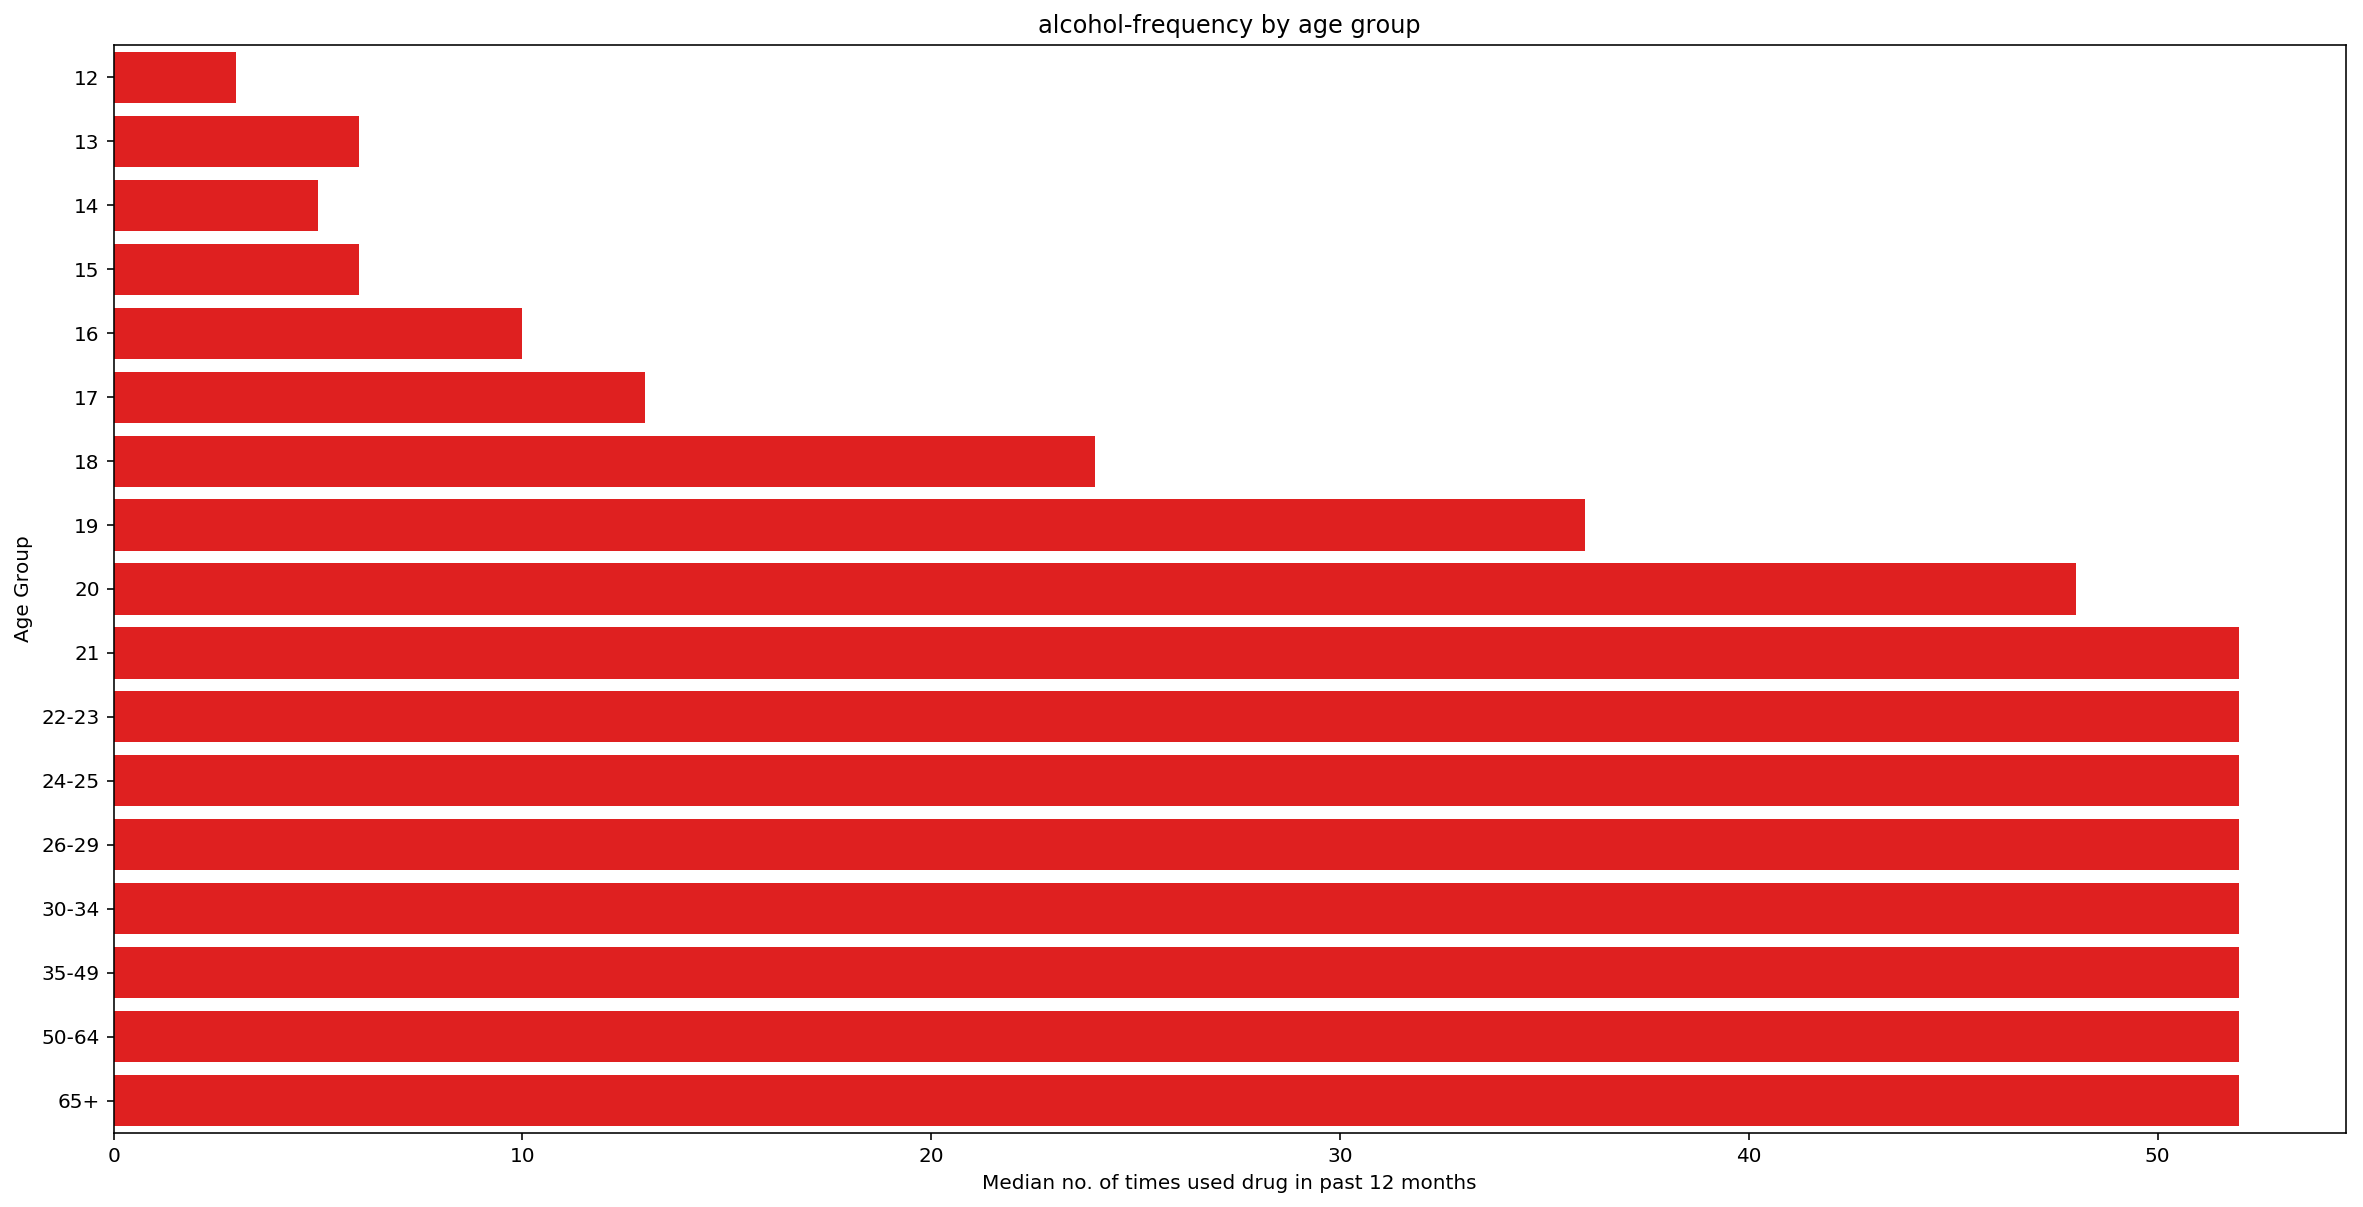

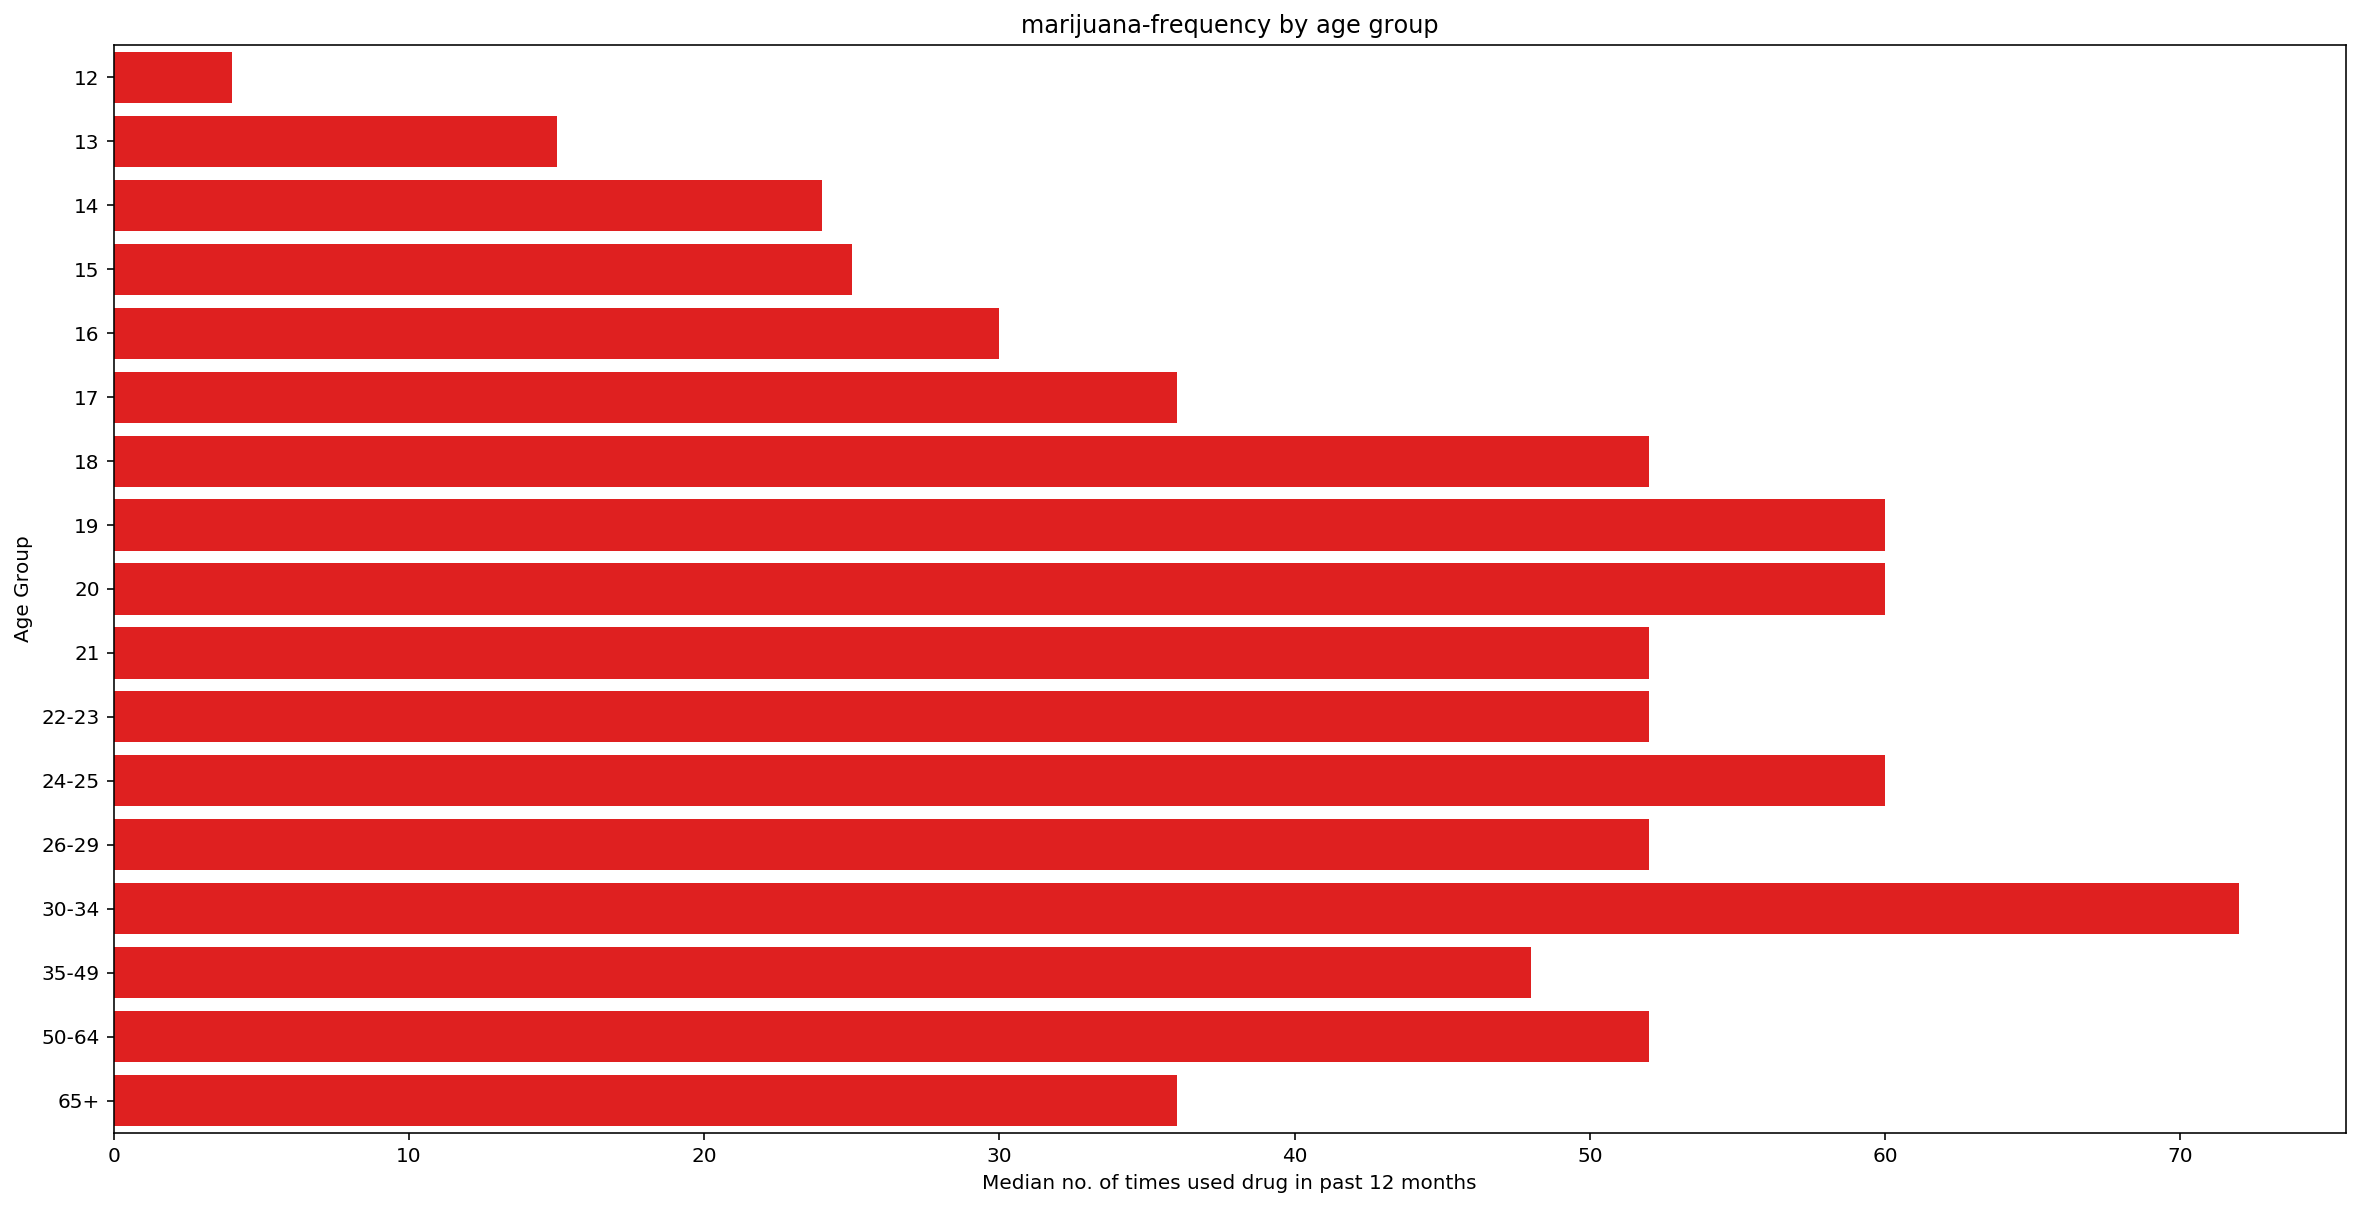

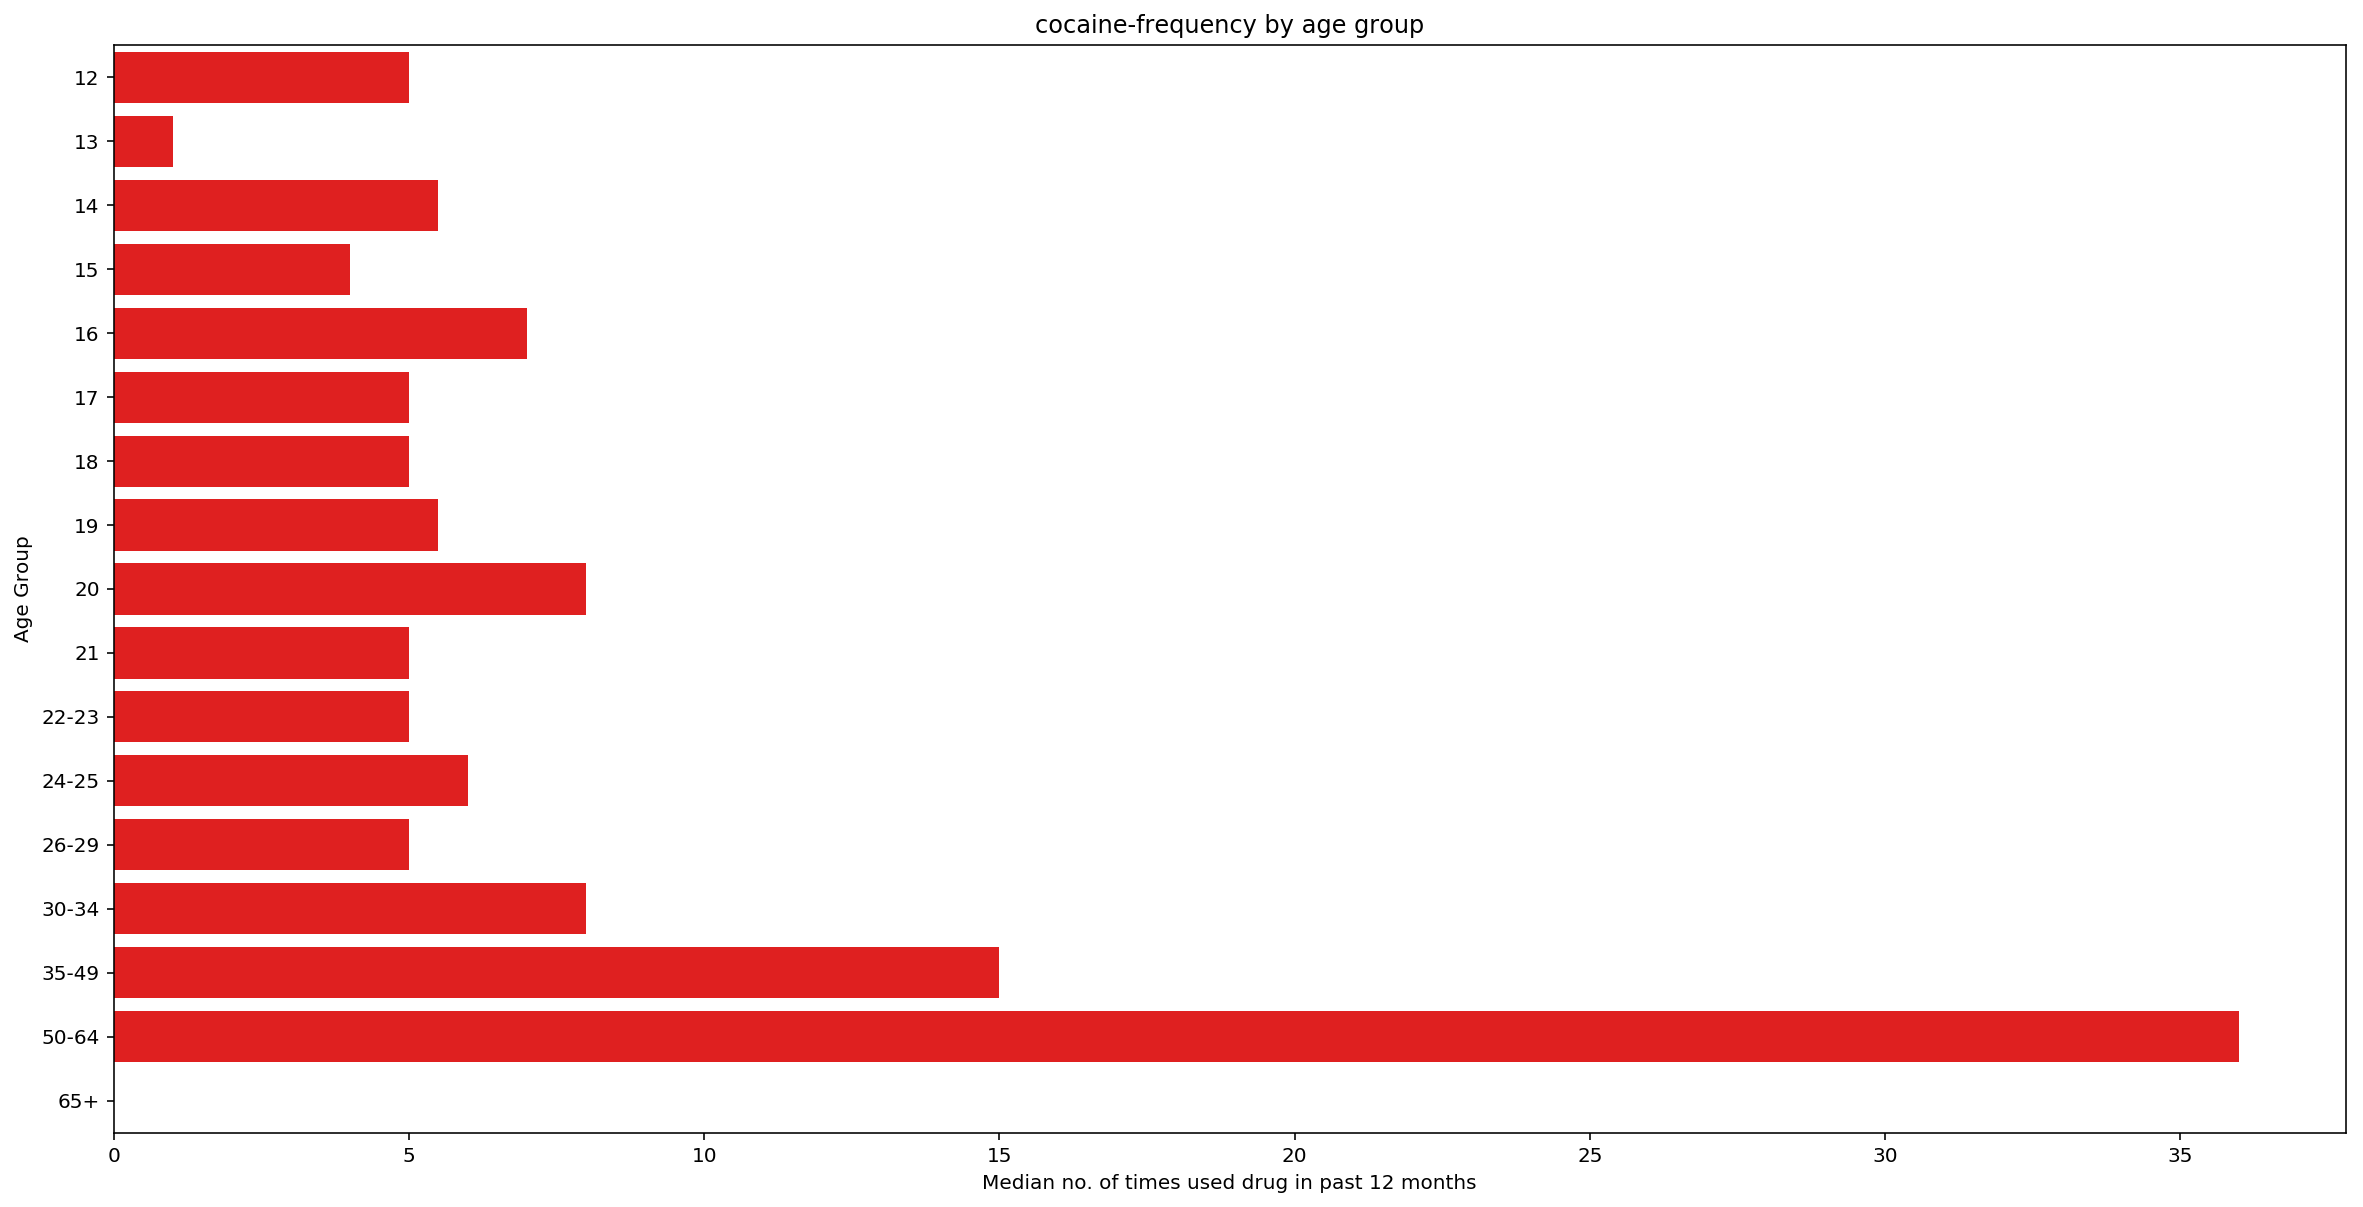

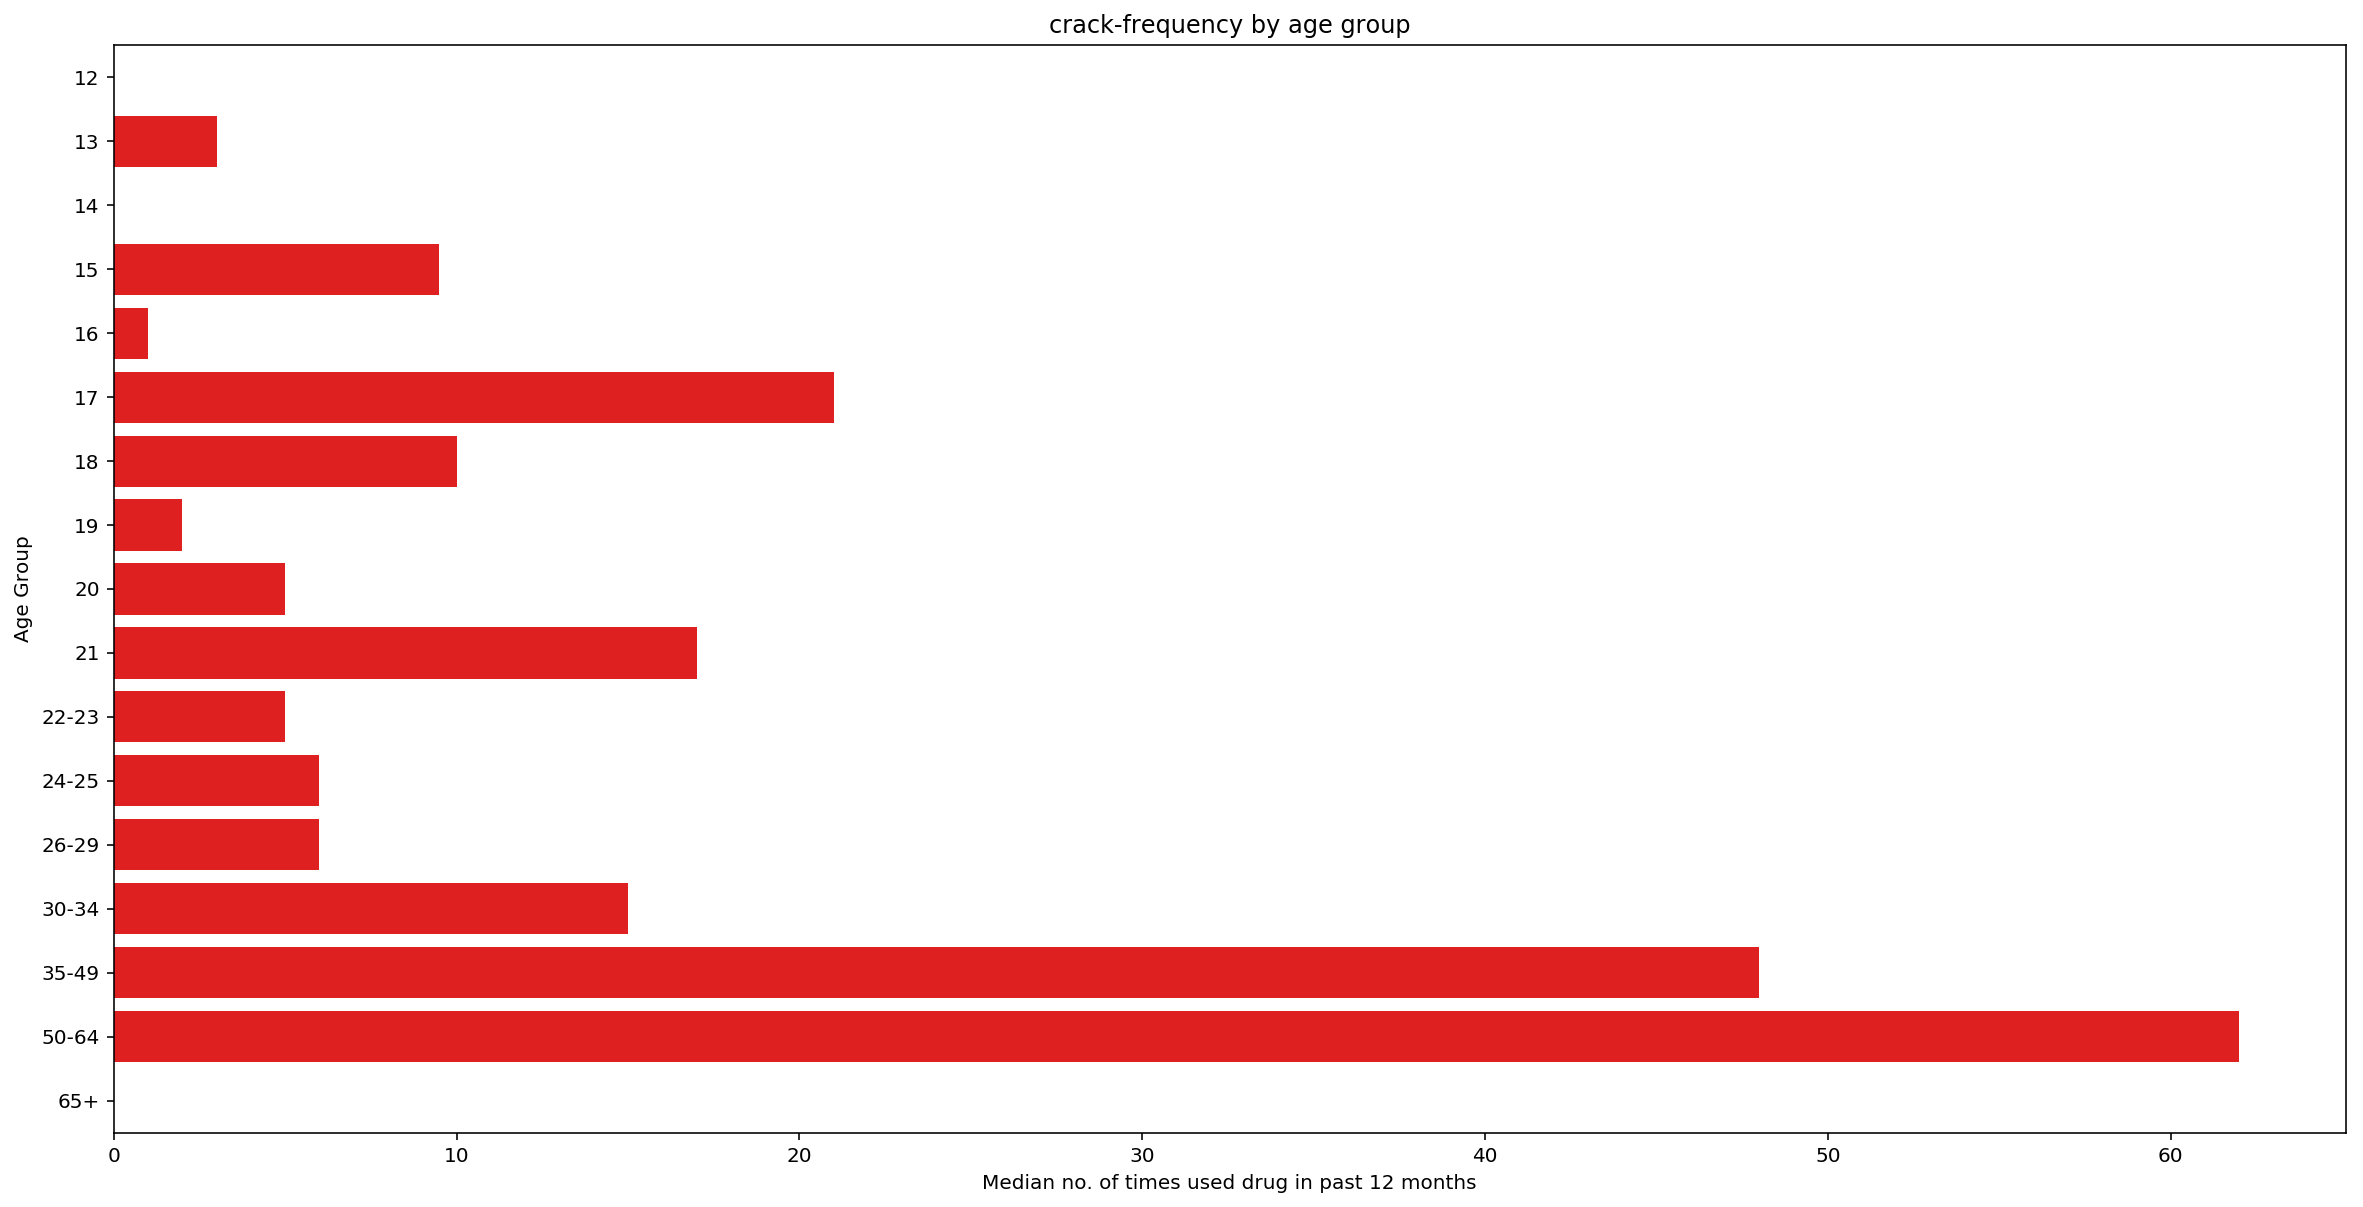

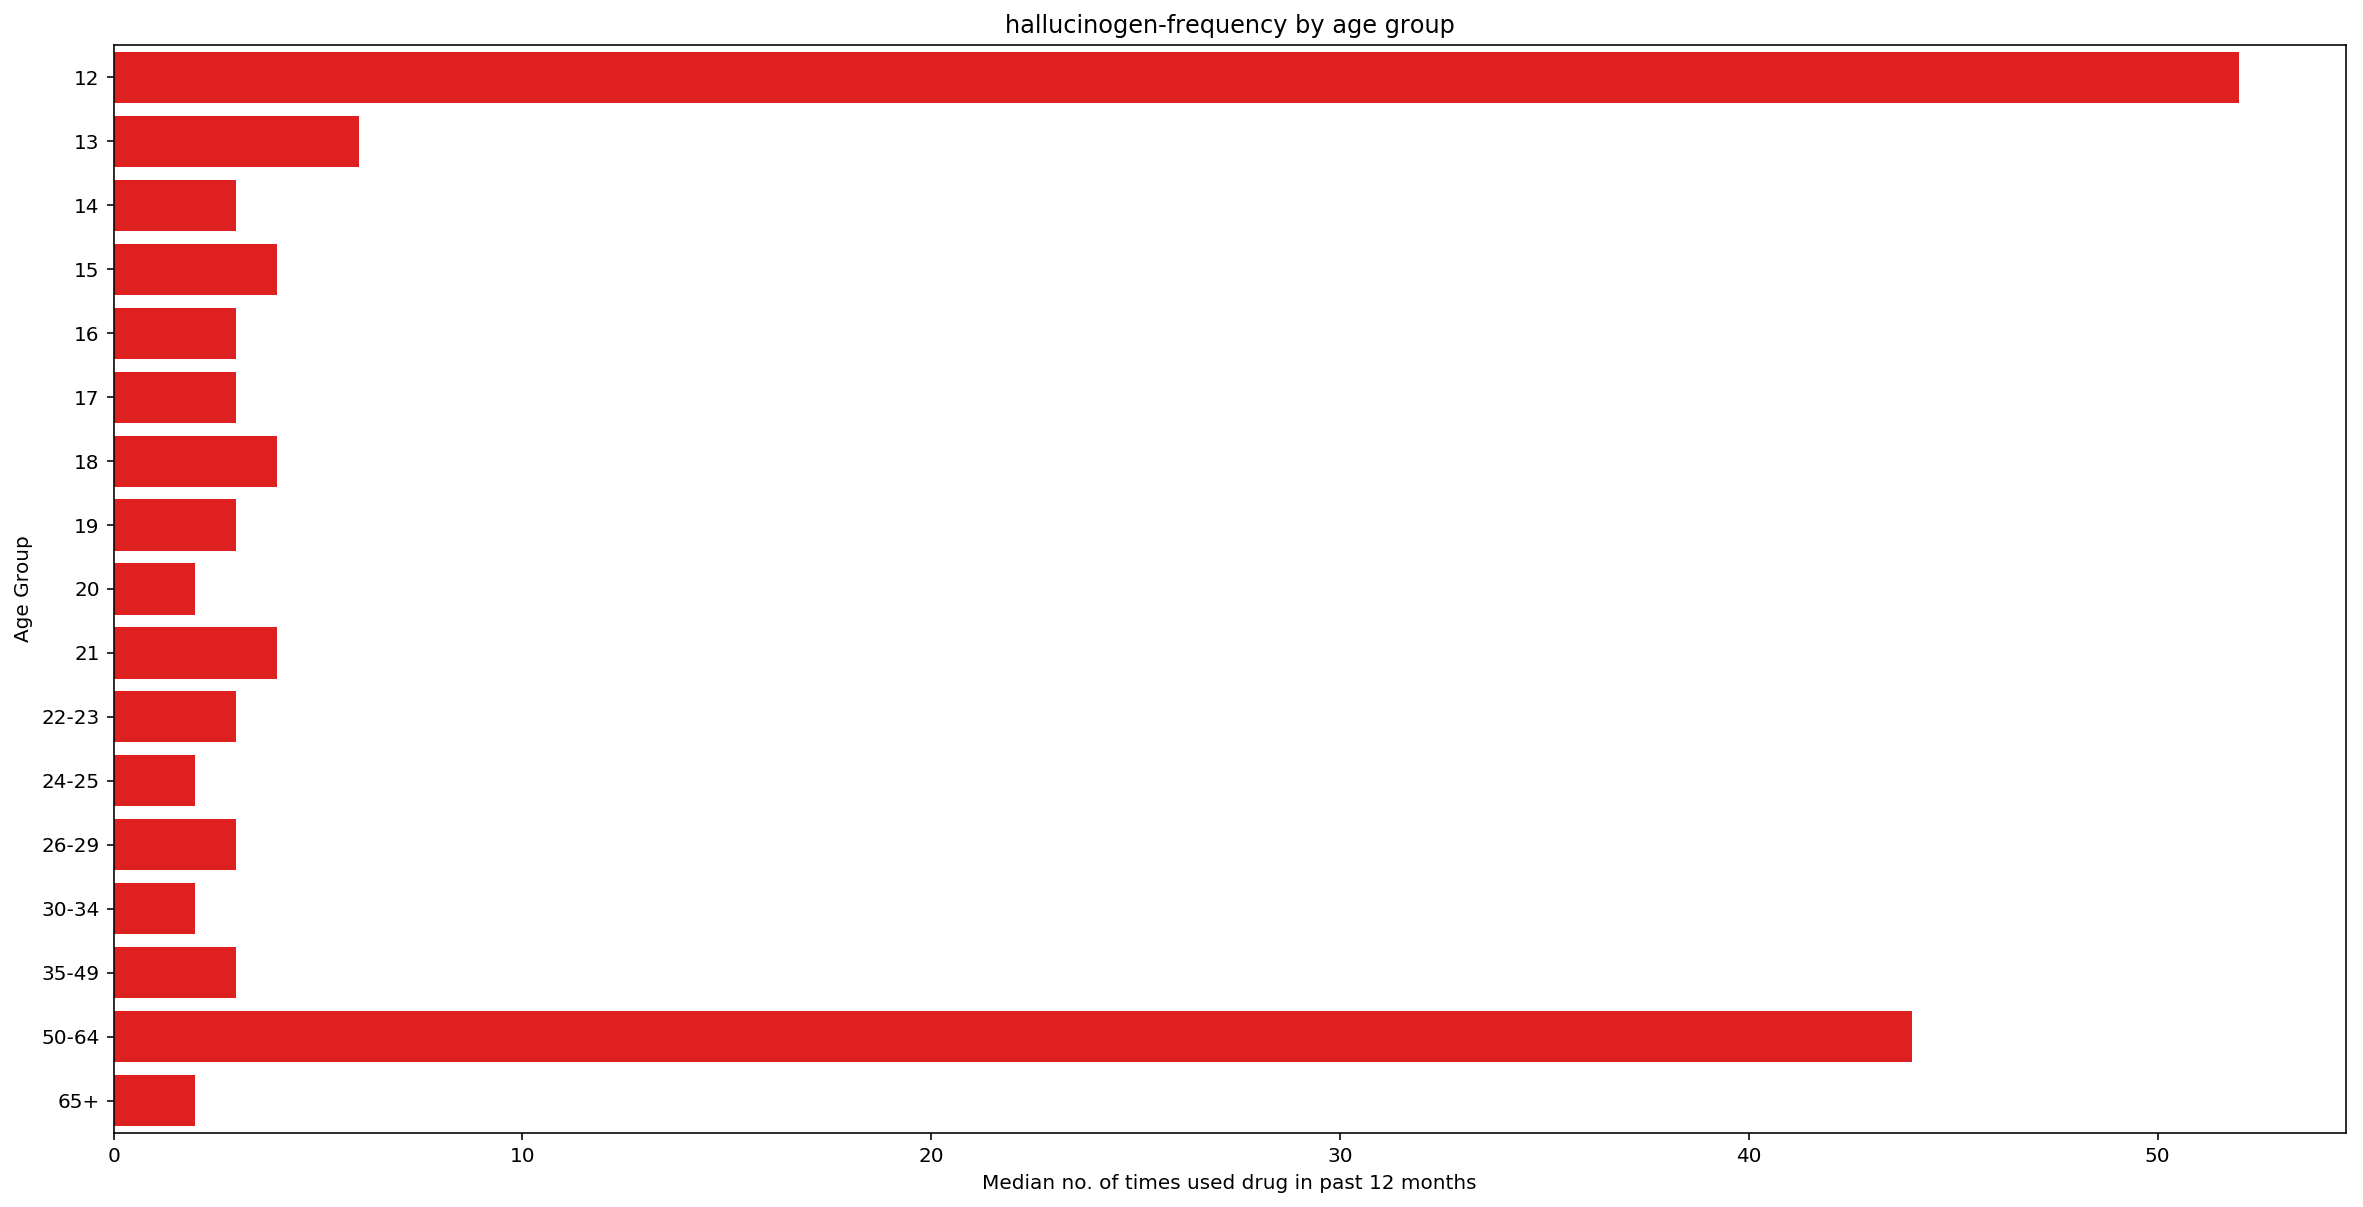

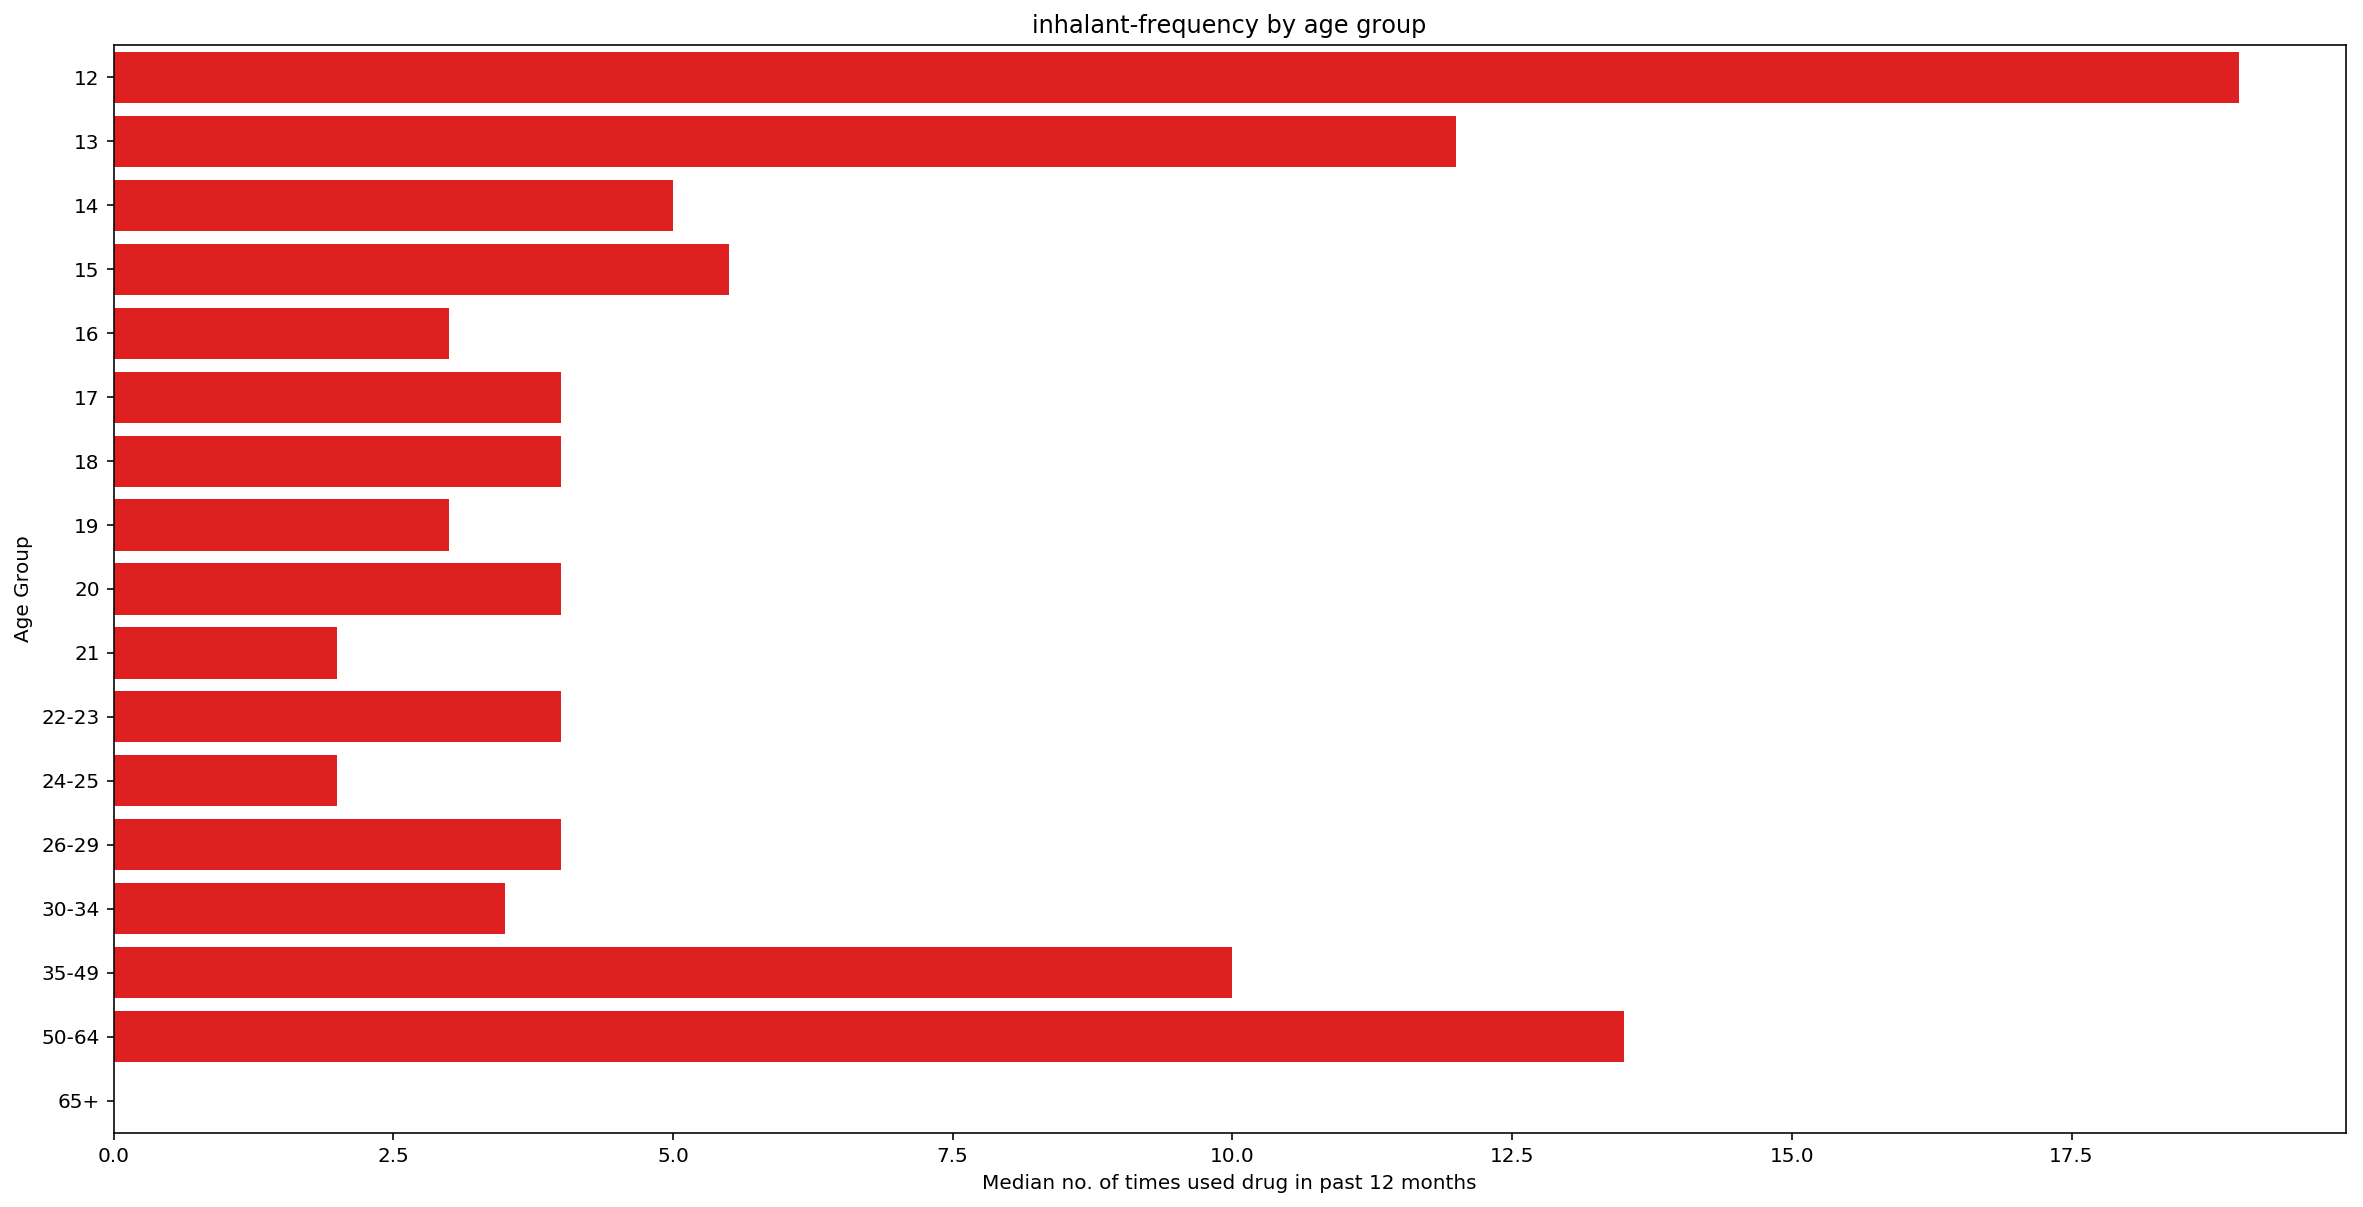

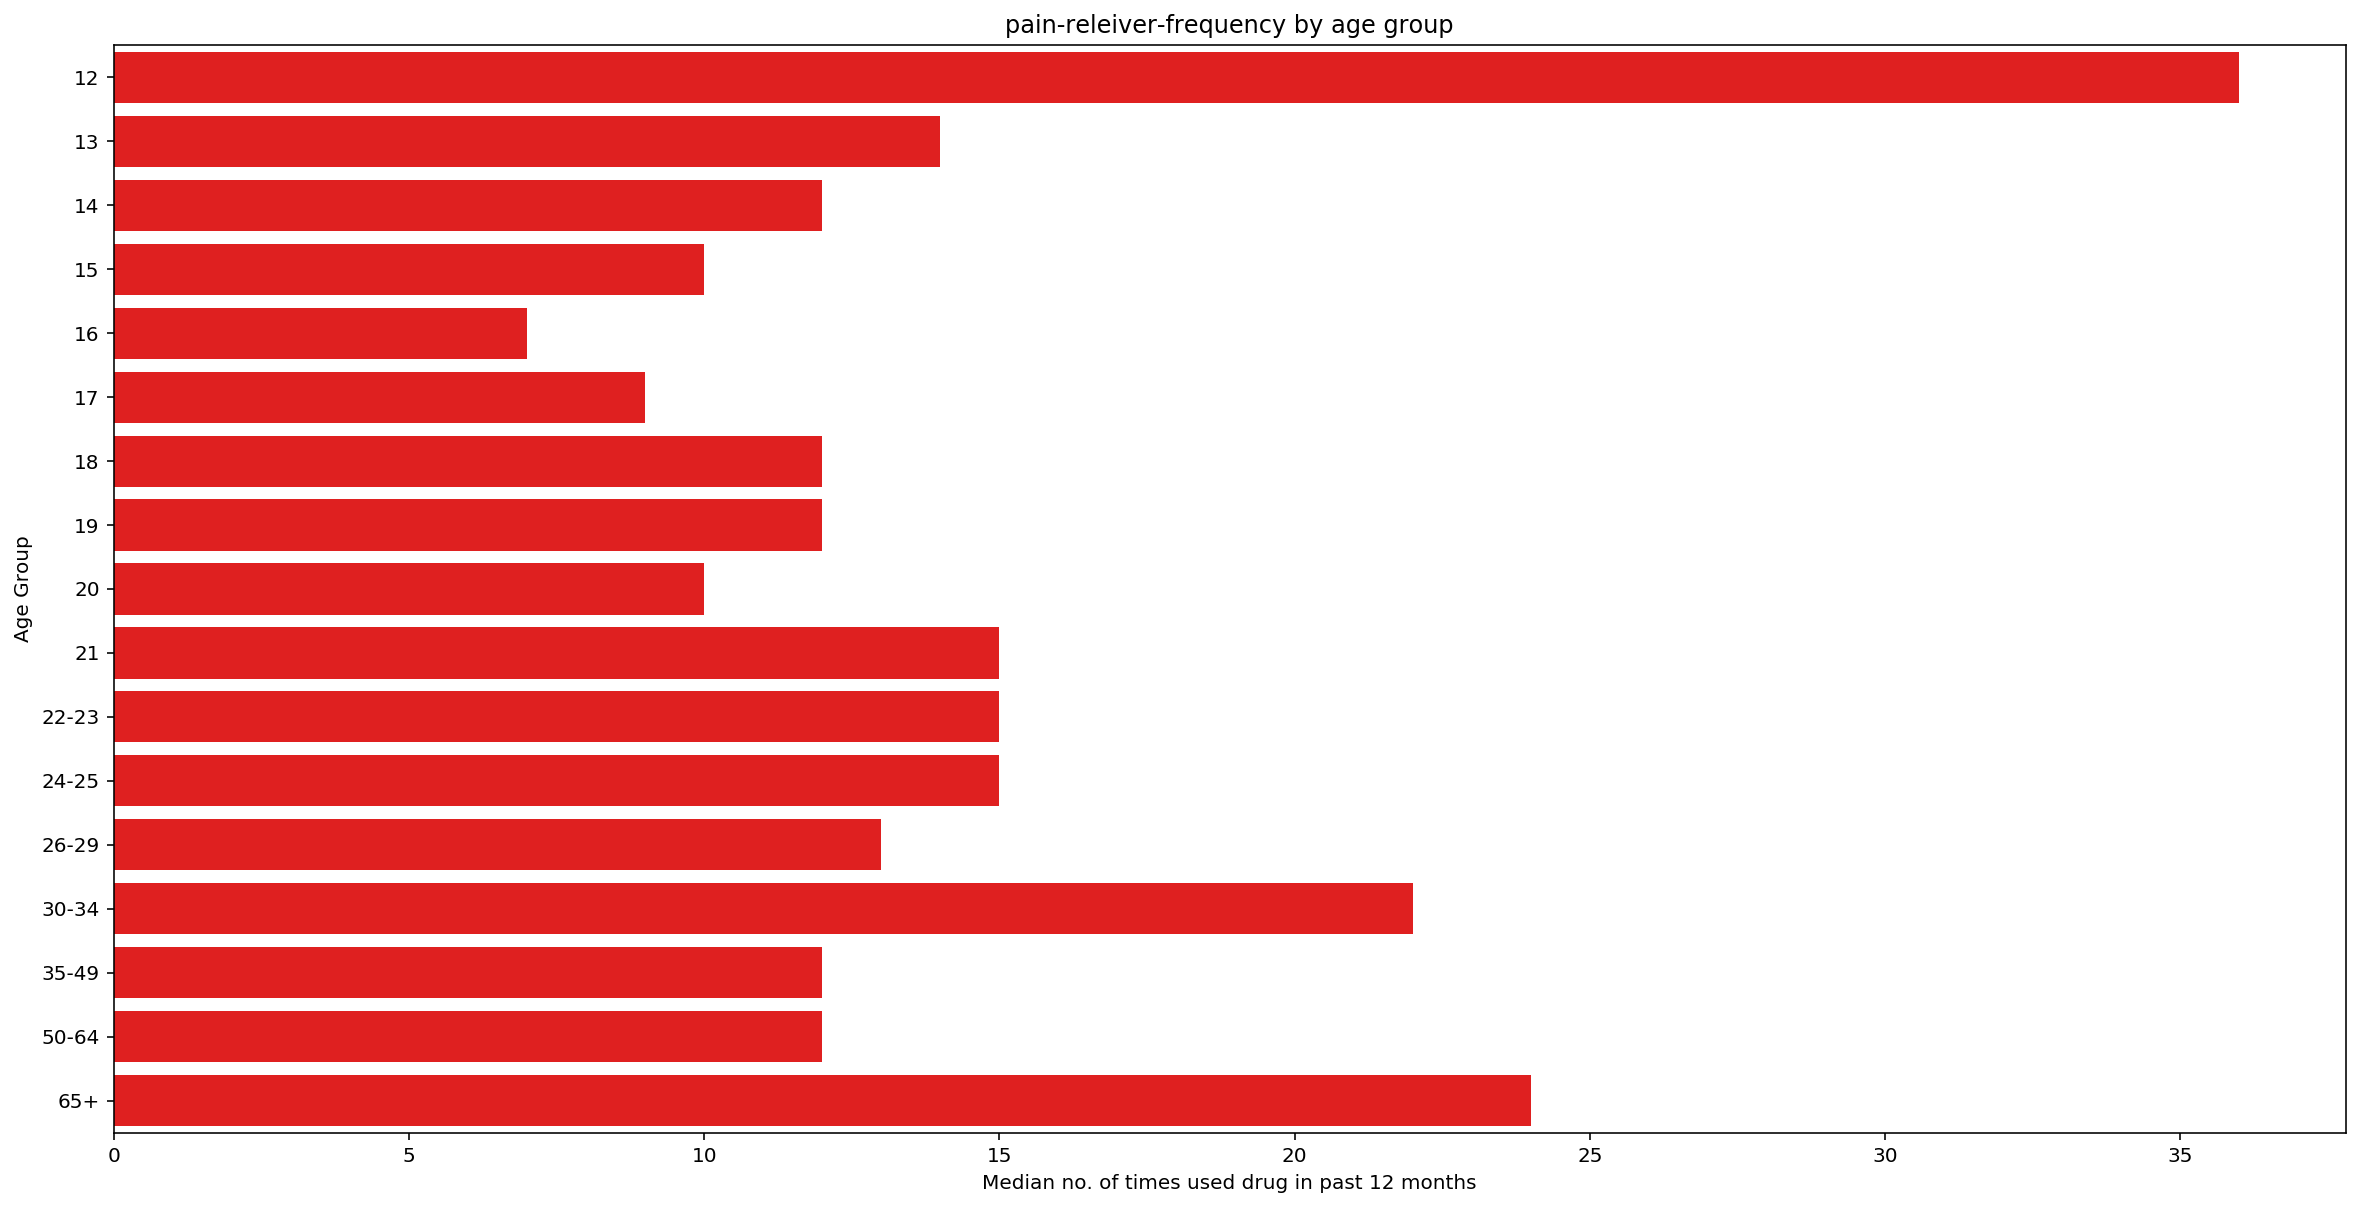

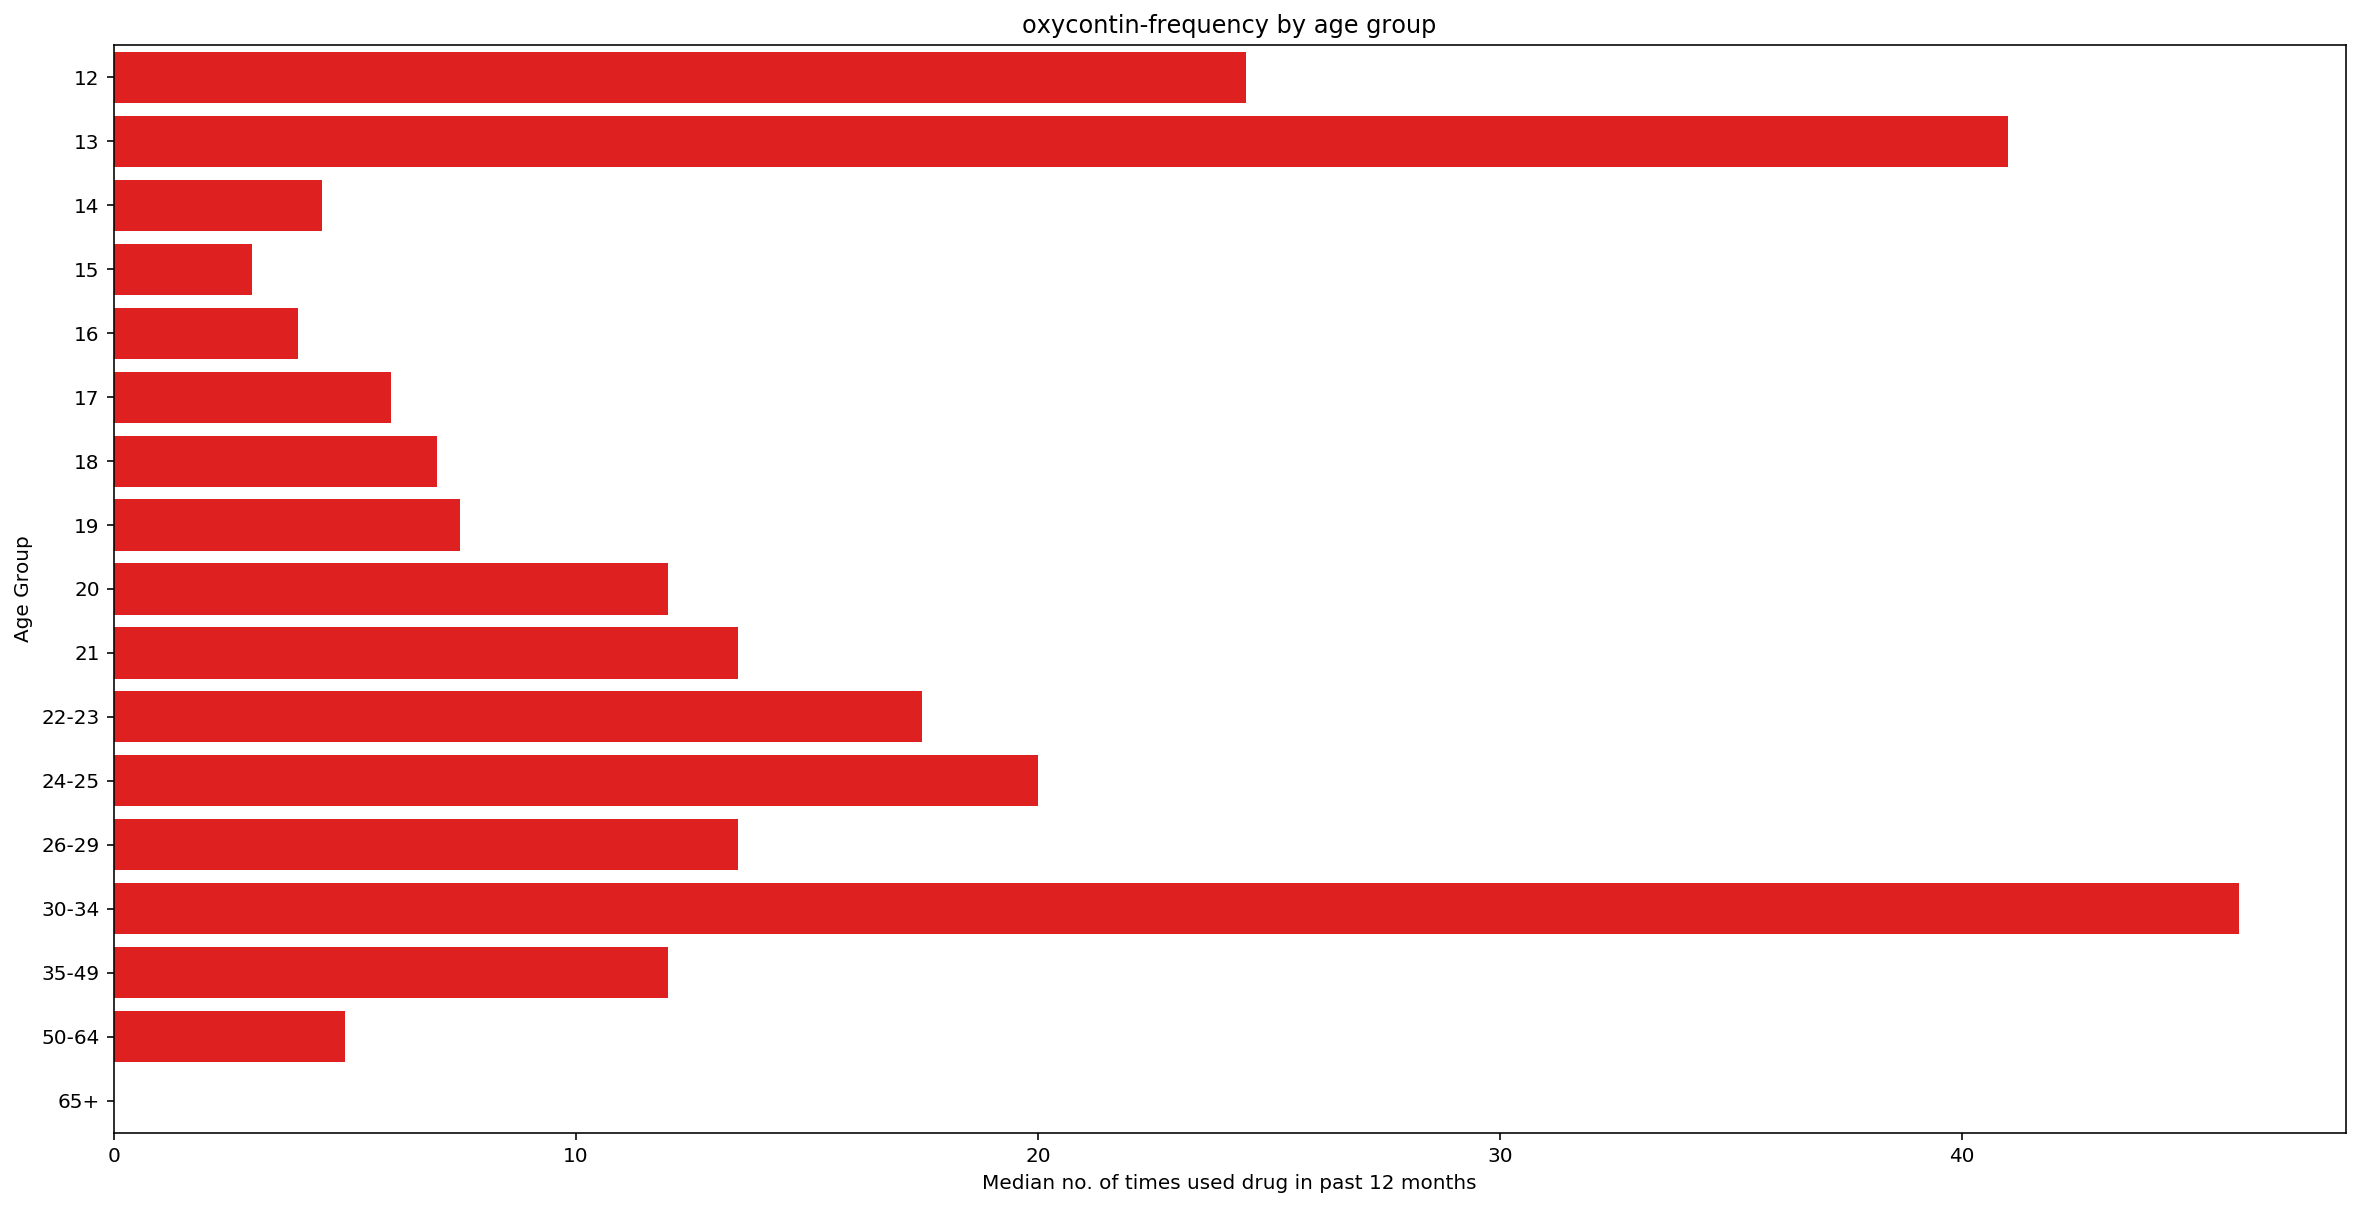

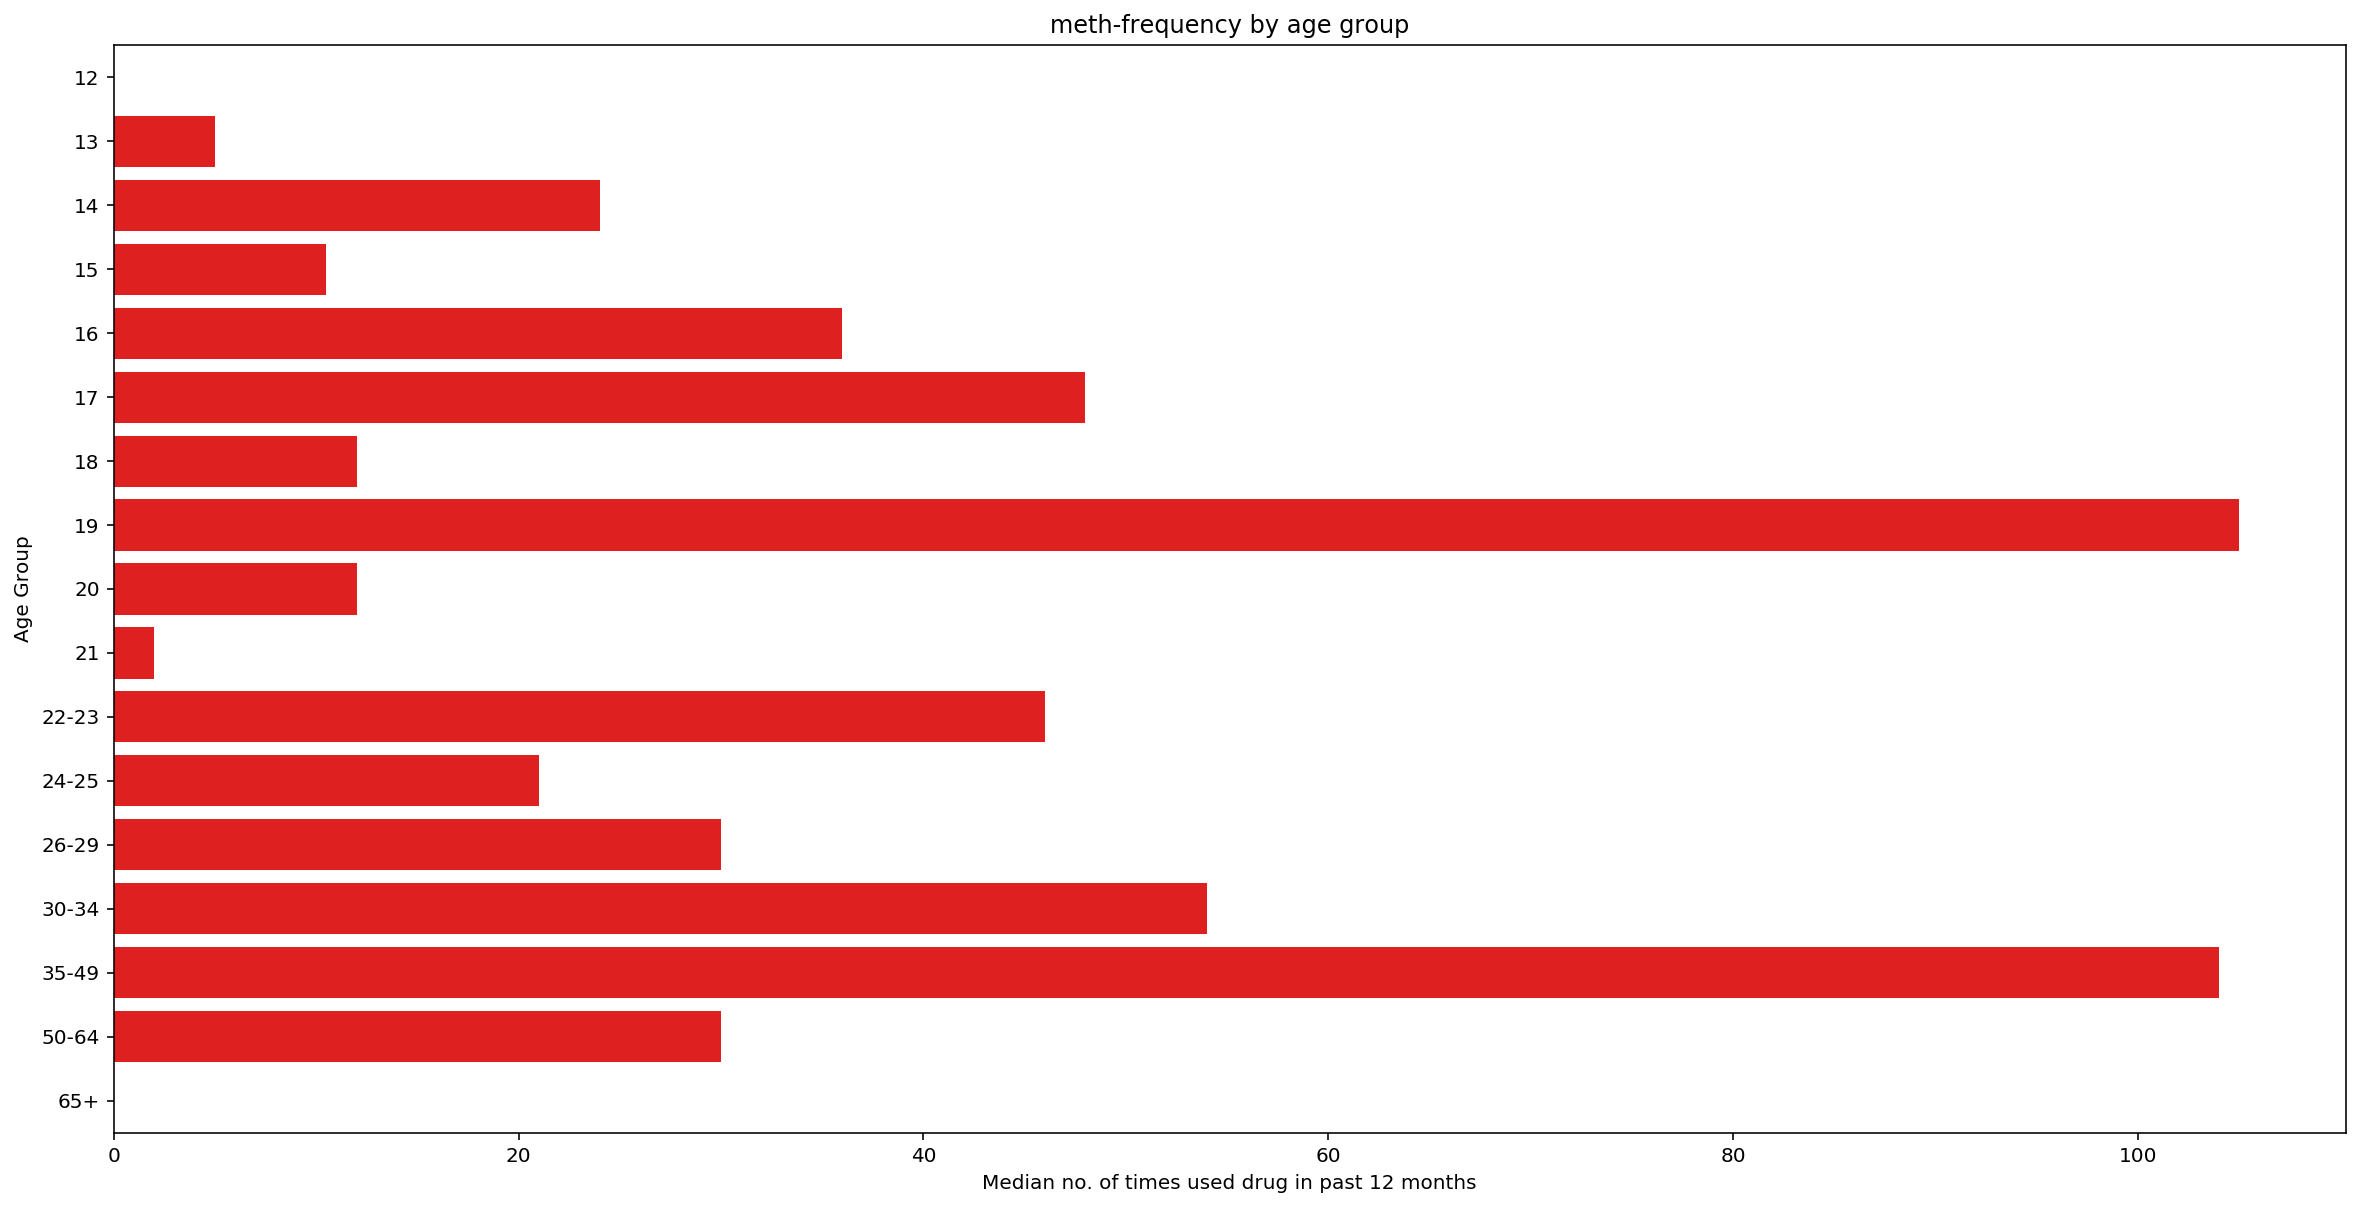

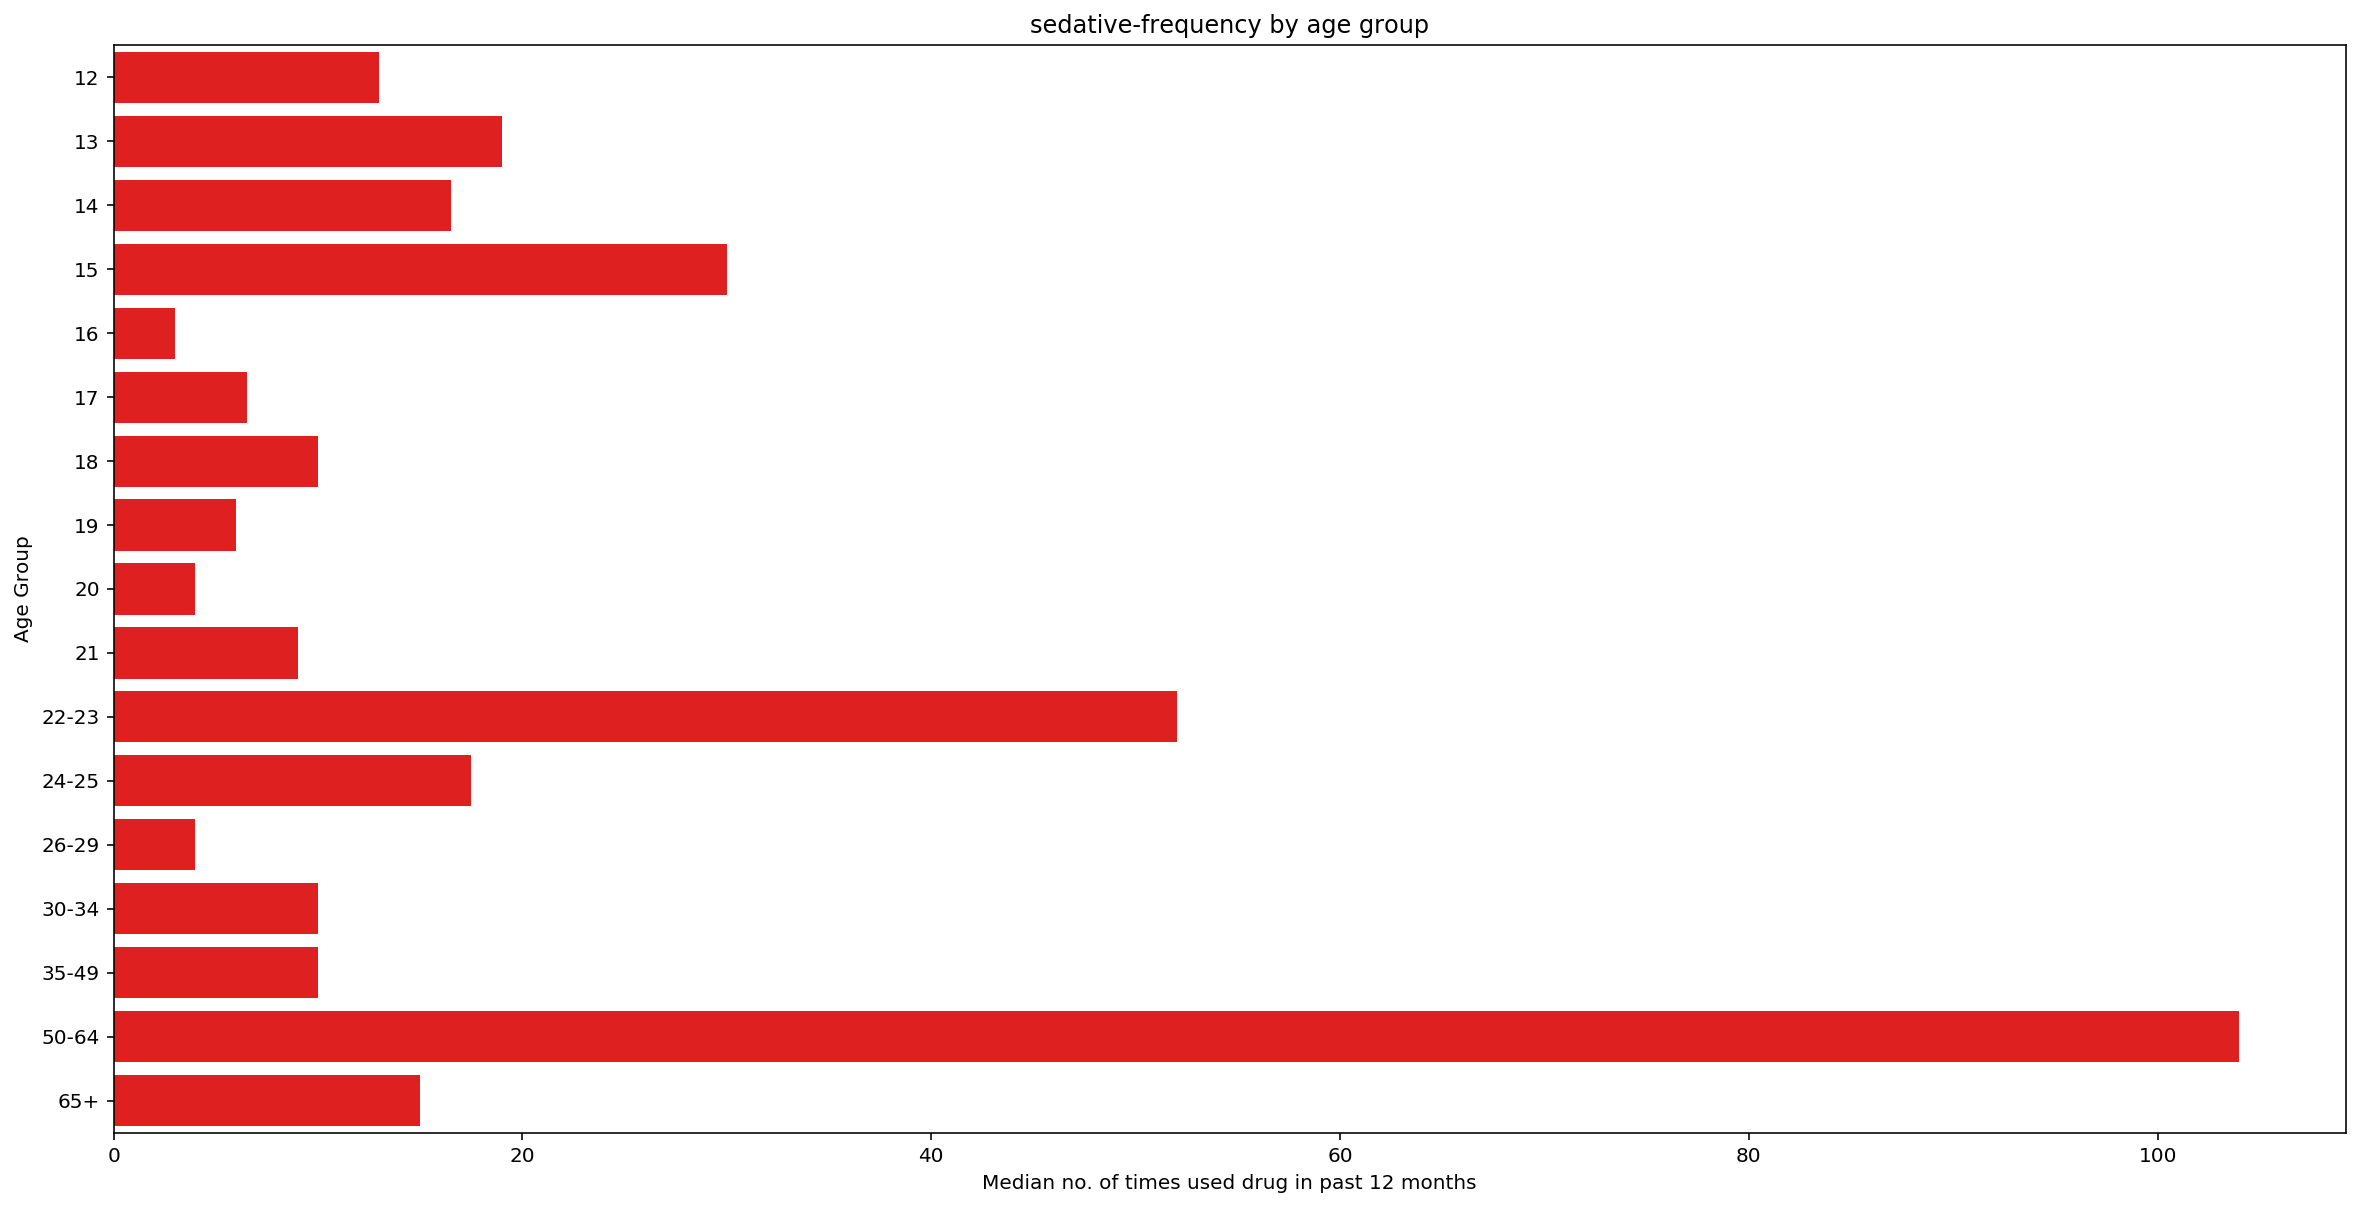

In [37]:
#I plotted all distributions of median number of times a user in an age group who used 
# a drug in the past 12 months by age group per drug.

for i, col in enumerate(drugs_frequency.columns[1:]):
    plt.figure(i,figsize=(20,10))
    sns.barplot(y='age',x=col,data=drugs_frequency,orient="h",color='r')
    plt.title(col+' by age group')
    plt.xlabel('Median no. of times used drug in past 12 months')
    plt.ylabel('Age Group')

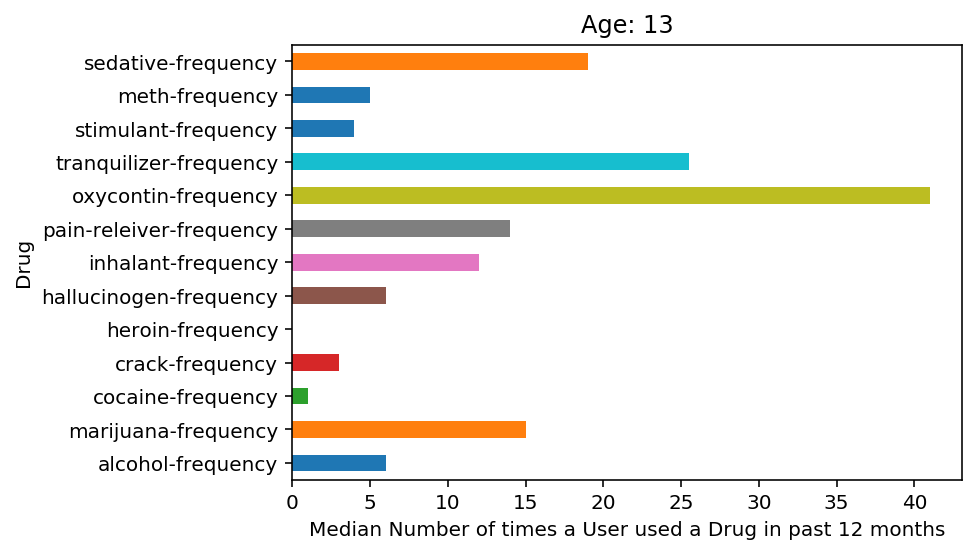

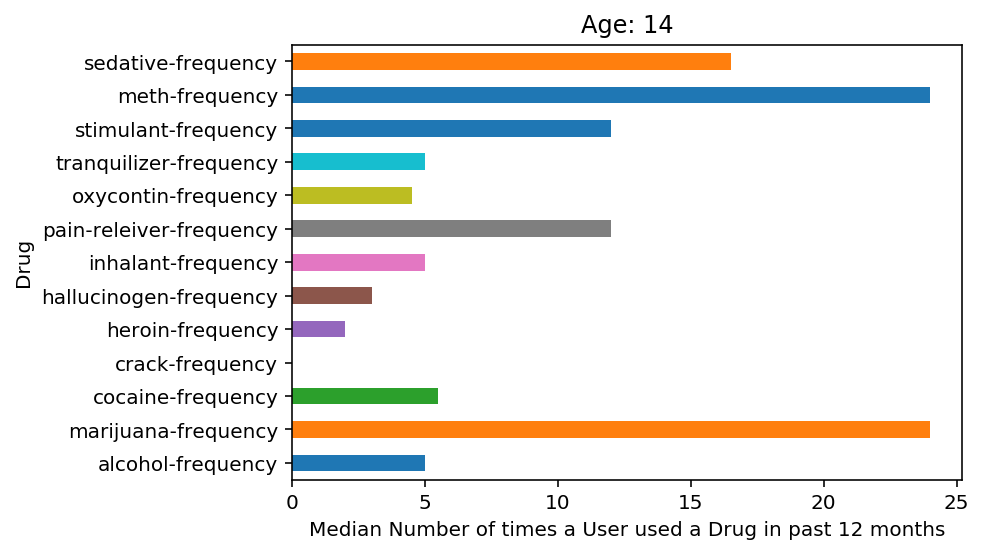

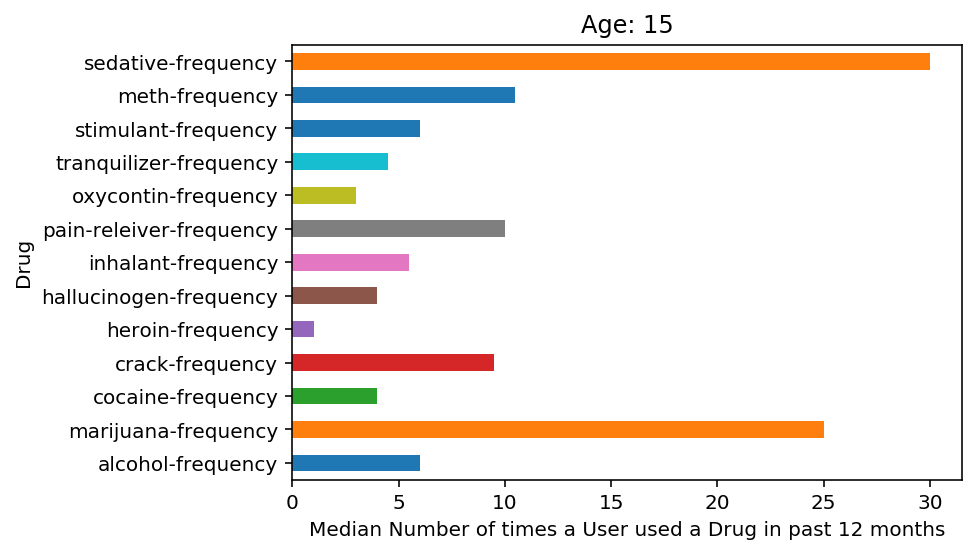

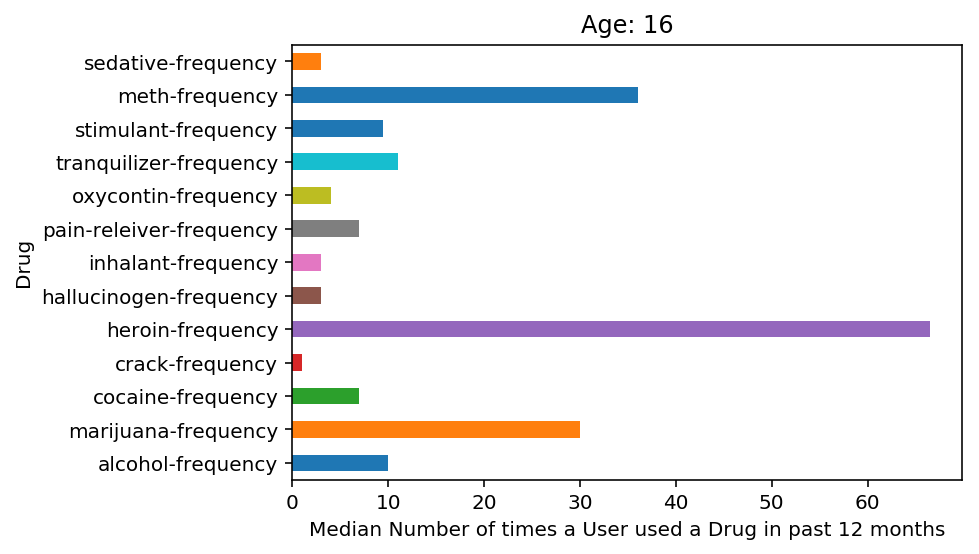

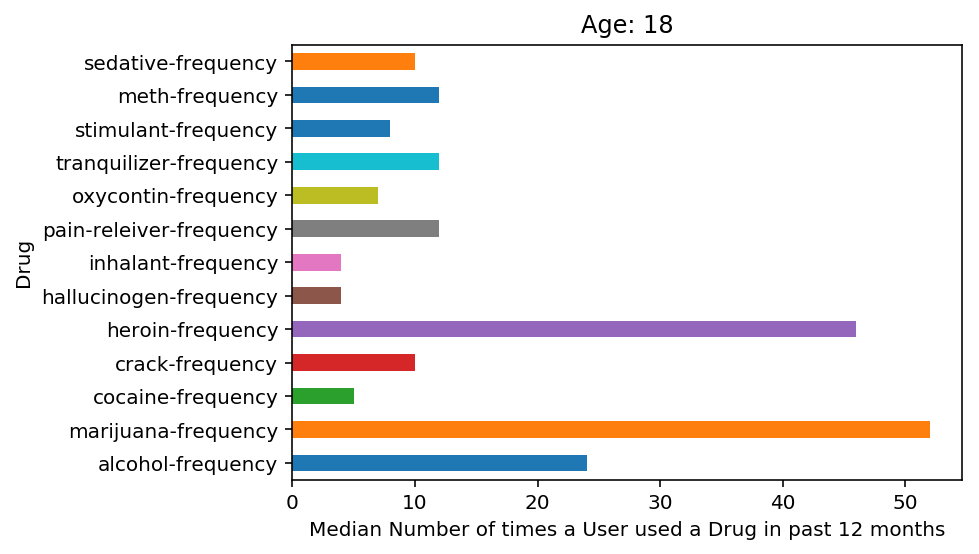

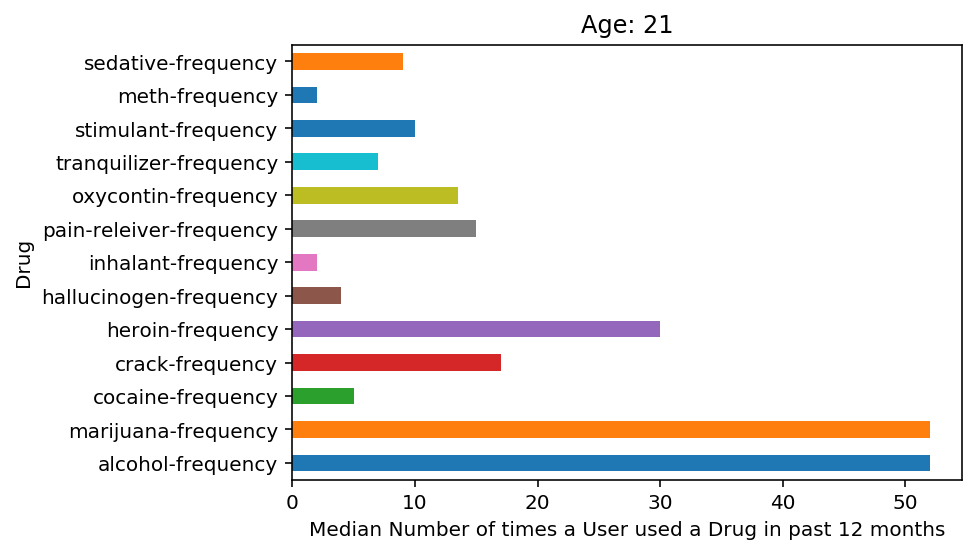

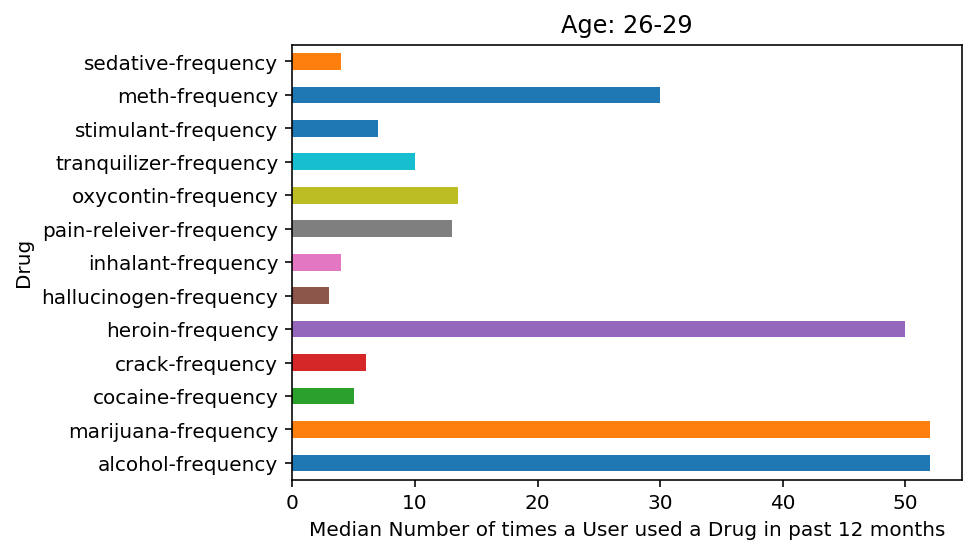

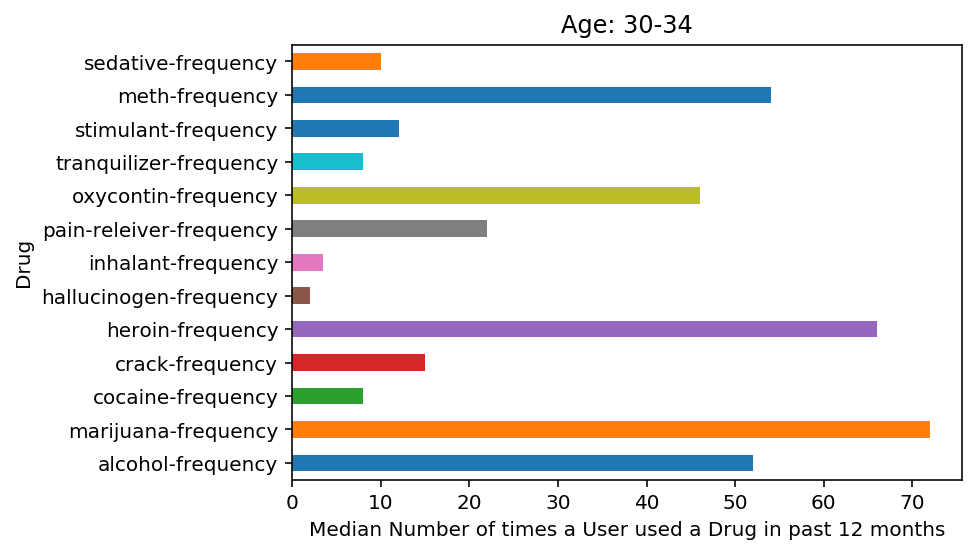

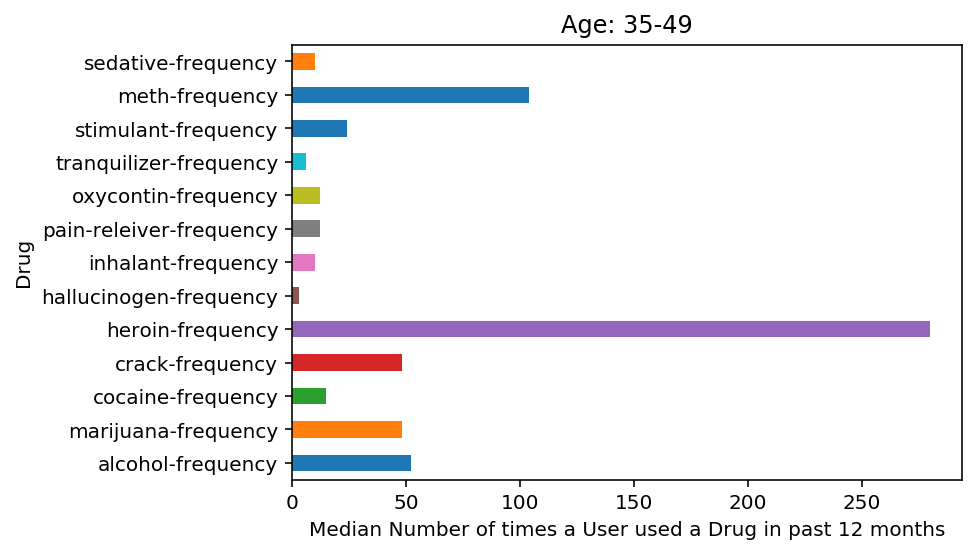

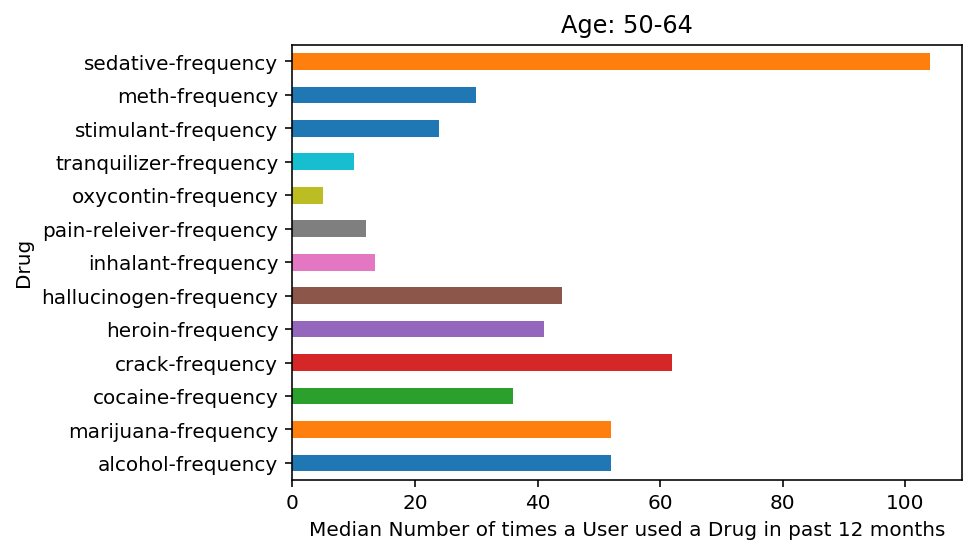

In [38]:
#I plotted all distributions of drug frequency by age group per chart.

for i in range(len(drugs_frequency)):
    plt.figure(i)
    drugs_frequency.iloc[i,1:].plot(kind='barh')
    plt.title('Age: '+drugs_frequency['age'][i])
    plt.xlabel('Median Number of times a User used a Drug in past 12 months')
    plt.ylabel('Drug')

In [39]:
#I ploted the boxplots of all drug frequency columns before standardisation.
plt.figure(figsize=(20,8))
sns.boxplot(data=drugs_frequency,orient='h',color='b')
plt.show()

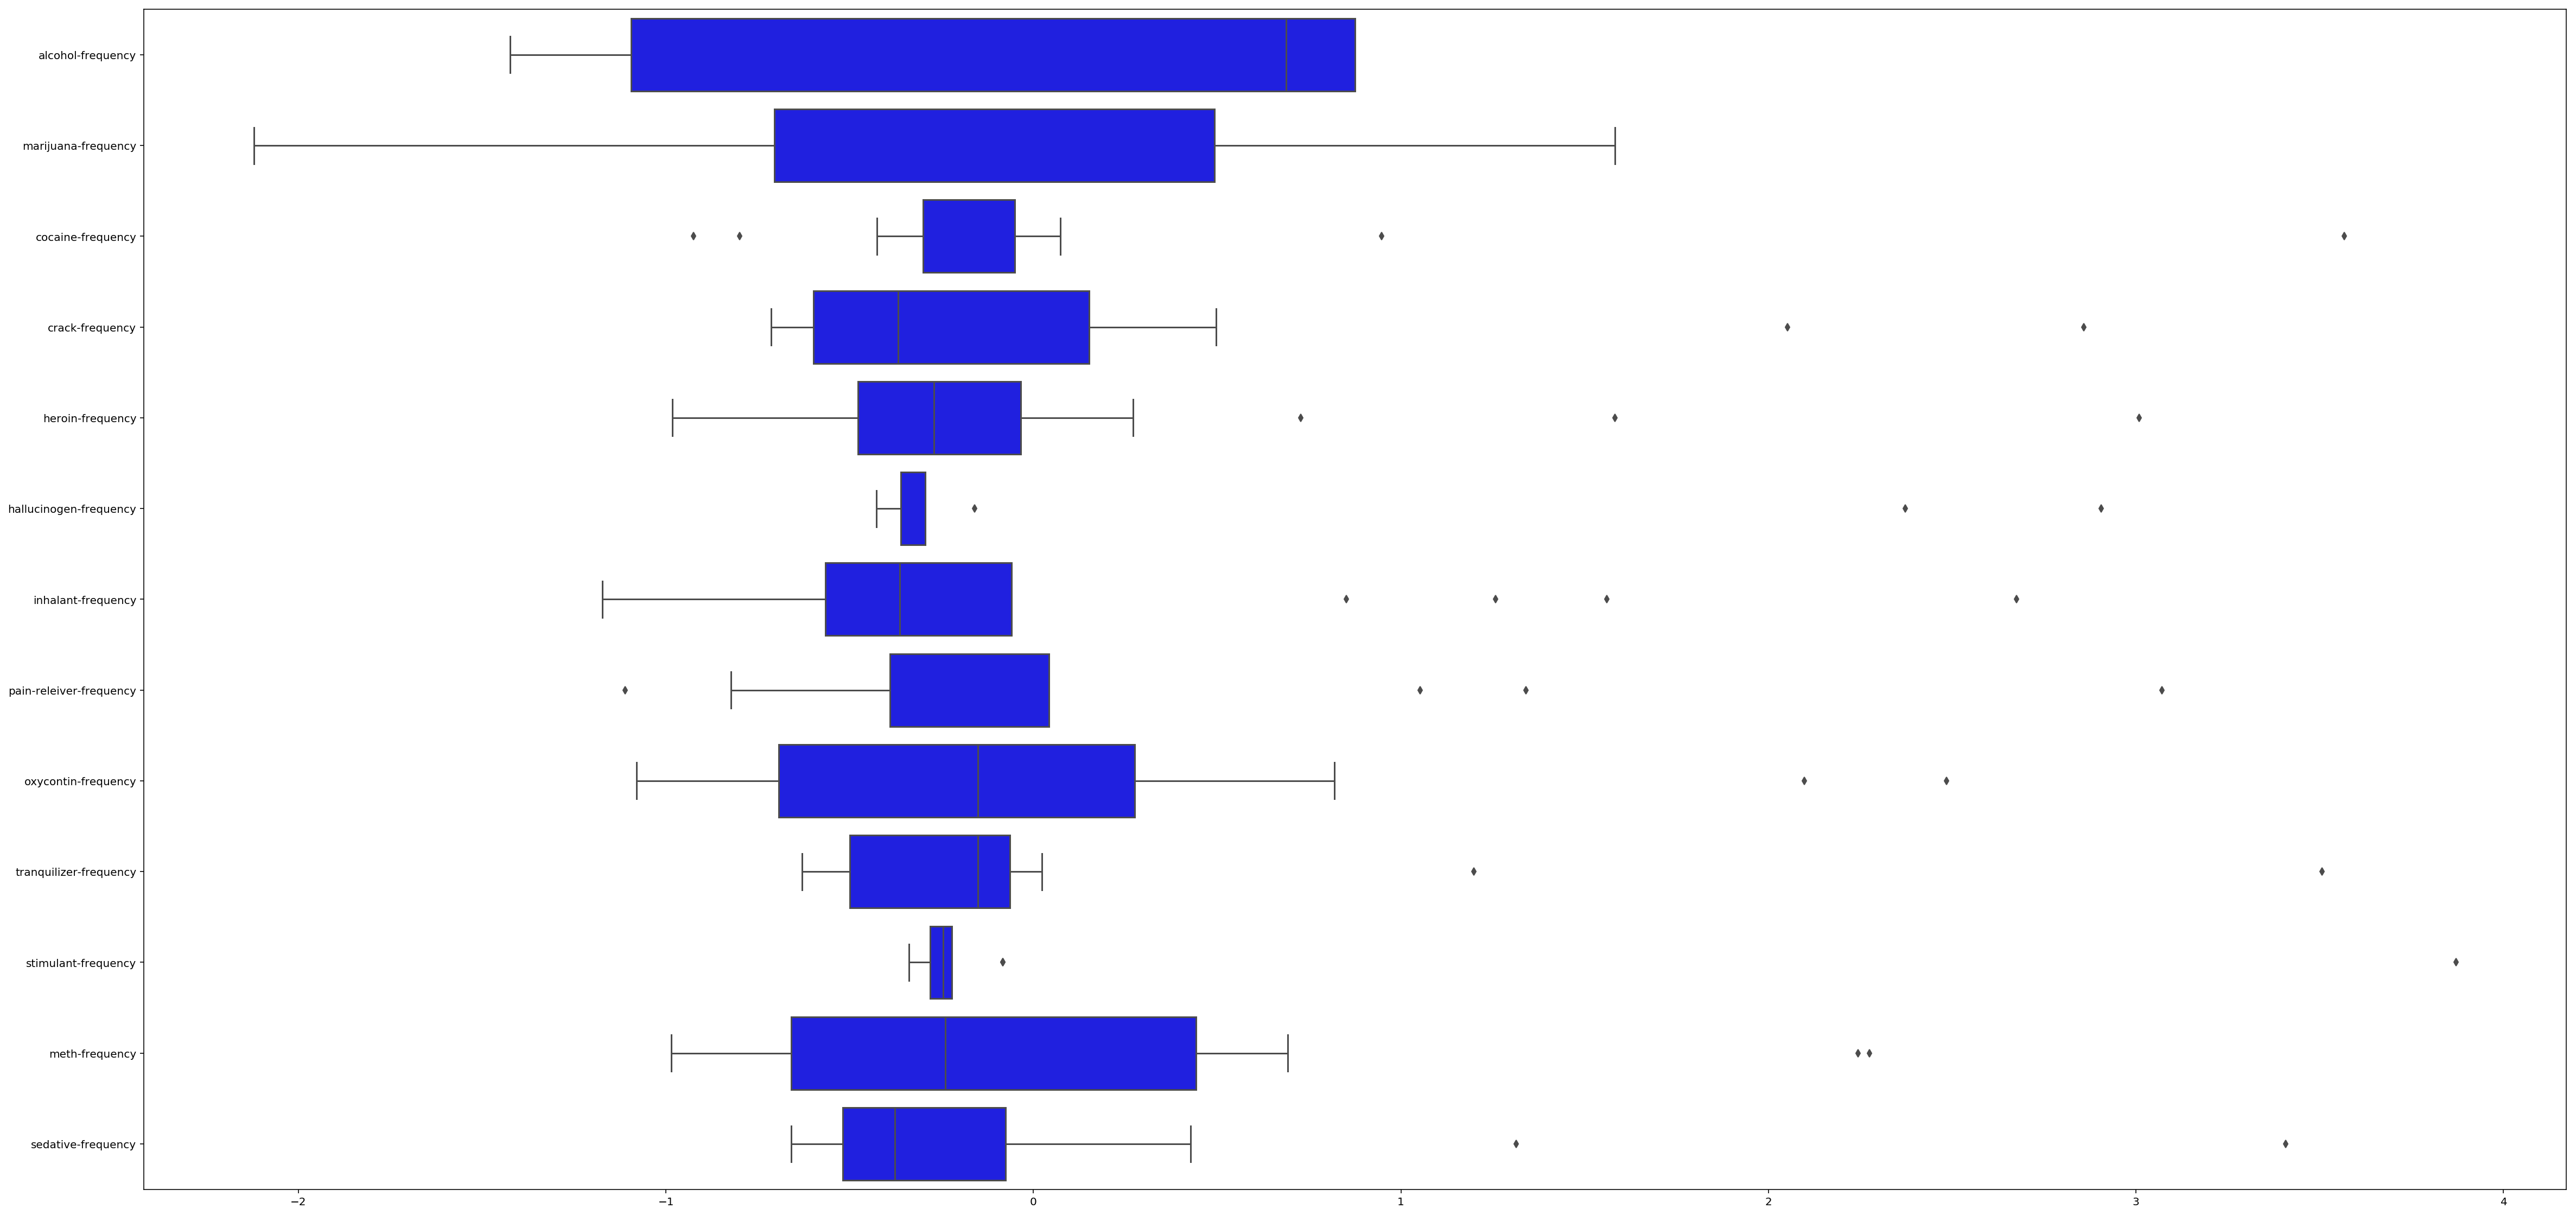

In [40]:
#I ploted the boxplots of all drug frequency columns after standardisation.
plt.figure(figsize=(40,20))
sns.boxplot(data=drugs_freq_stand,orient='h',color='b')
plt.show()

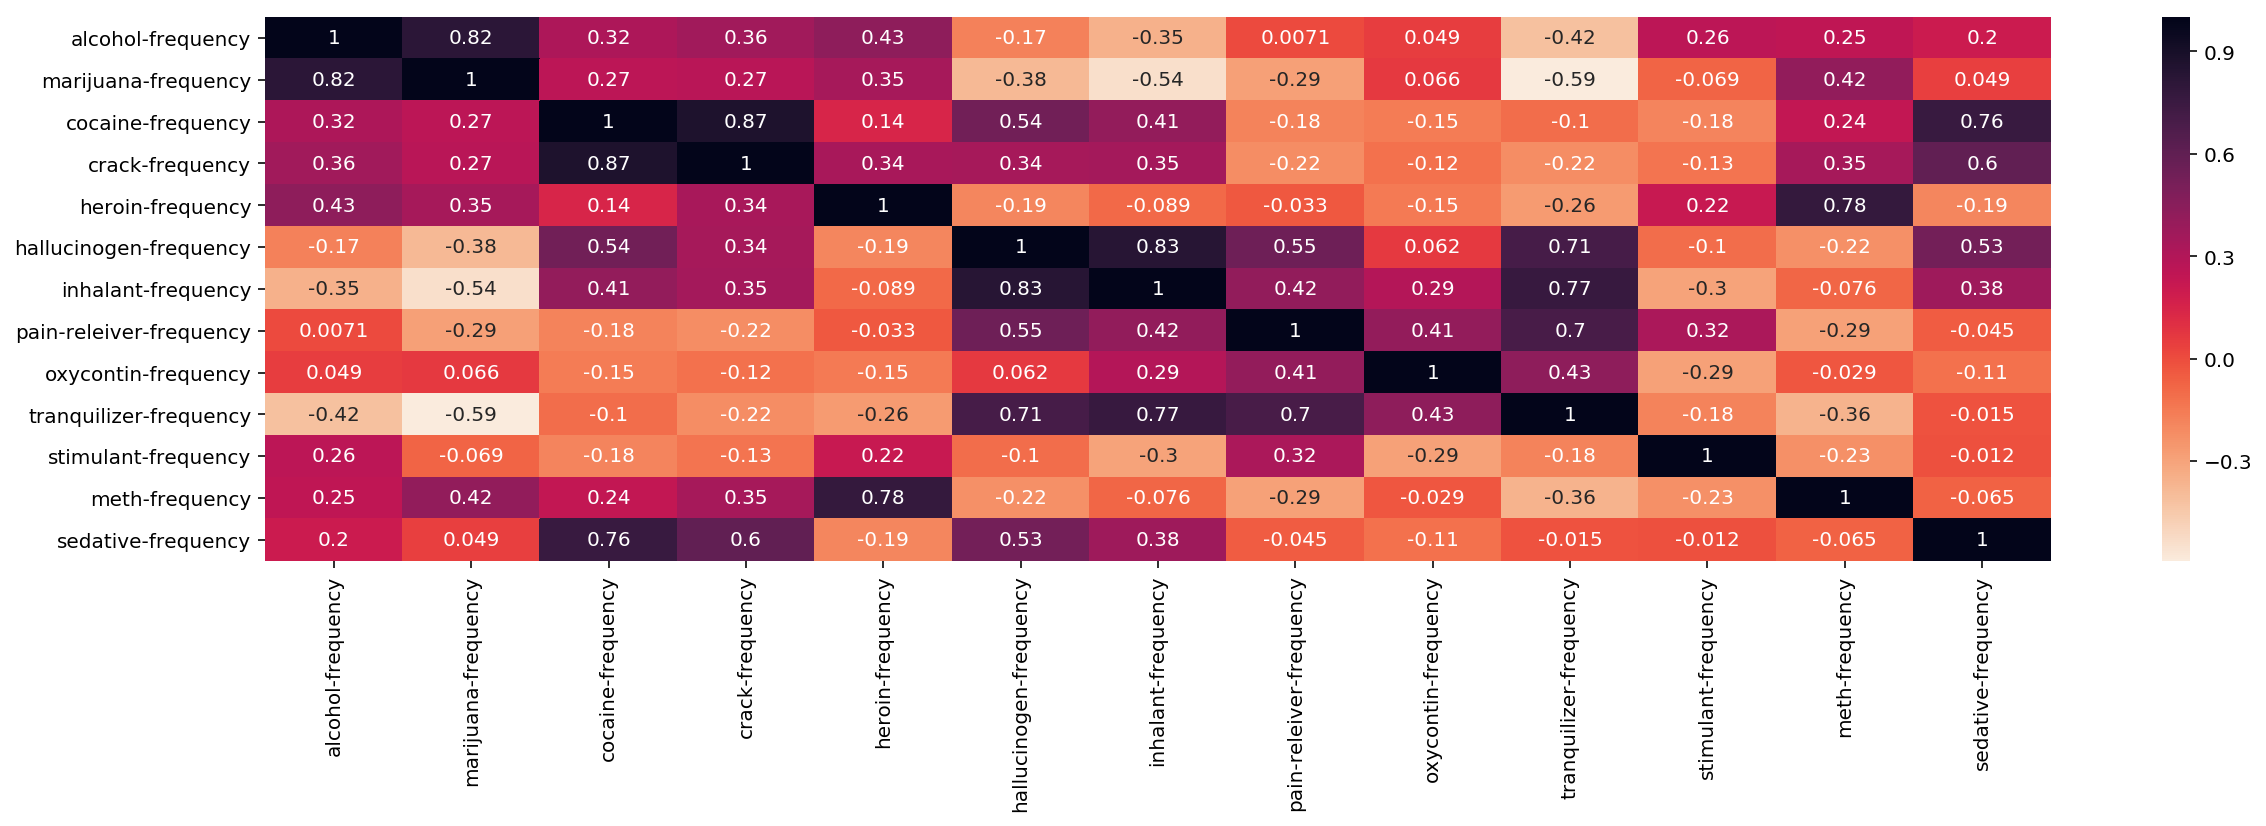

In [41]:
# I plotted a heatmap, which shows the correlation coefficients and colours of all drug 
# frequency columns.
plt.figure(figsize=(20,5))
sns.heatmap(drugs_freq_stand.corr(method='pearson'), annot=True, cmap = sns.cm.rocket_r)
plt.show()

From the bar charts, most of the drug frequency data seem to be skewed greatly for all ages. However, I have noted that the age groupings are inconsistent, so I cannot assume that the data are skewed just because they look skewed.

By median number of times a user in a age consumed a drug in the past 12 months, I observed that users in the younger age groups tend to abuse drugs with low cost such as inhalents. For the older age groups such as from age of 50 onwards, they tend to consume more drugs with medicinal effects, such as stimulants and sedatives.

Some interesting findings for strong positive linear correlation (corrcoef>0.8):
1. alcohol-frequency is positively correlated to marijuana-frequency.
2. cocaine-frequency is positively correlated to crack-frequency.
3. heroin-use is positively correlated to pain-releiver use, transquilizer-use, stimulant-use, and meth-use respectively.
4. hallucinogen-frequency is positively correlated to inhalent-frequency.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

I want to evaluate whether or not a linear relationship exists between cocaine use and marijuana use. We will use a t-test for testing our hypothesis for the population correlation coefficient, $\rho$.

> **$H_0:$** $\rho$ = 0 , where this null hypothesis means that there is no correlation between the cocaine use and marijuana use variables in the population.

> **$H_1:$** $\rho\neq$  0 , where this alternative hypothesis means that there is a significant correlation between the cocaine use and marijuana use variables in the population.

Our significance level, $\alpha$ is set as 5%.

The formula for the t-test for the correlation coefficient is as below:

> $t = r\sqrt\frac{n-2}{1-r^2} $ ,  with degrees of freedom equal to $n-2$.

In [112]:
sns.scatterplot(x='cocaine-use',y='marijuana-use',data=drugs_use)
plt.title('marijuana-use against cocaine-use')
plt.xlabel('cocaine use in percentage (%)')
plt.ylabel('marijuana use in percentage (%)')
plt.show()

In [143]:
#sample correlation coefficient between cocaine-use and marijuana-use
hypo_r = np.corrcoef(drugs_use['cocaine-use'],drugs_use['marijuana-use'])[0][1]
# calculate t statistic based on formula above
t_stat = hypo_r * np.sqrt((len(drugs_use['cocaine-use'])-2)/(1-hypo_r**2))
#degrees of freedom for t test
df_t = len(drugs_use['cocaine-use'])-2
p = (1-stats.t.cdf(t_stat,df=df_t))*2
alpha = 0.05
print('t test with',df_t,'degrees of freedom:')
print('t statistic:', t_stat)
print('p-value',p)

t test with 15 degrees of freedom:
t statistic: 7.315661536195577
p-value 2.543911354901951e-06


**Report**

As the p-value $< \alpha$, we can reject $H_0$. There is sufficient statistical evidence at the $\alpha=5$% significance level to conclude that there is a significant linear relationship between cocaine use and marijuana use. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [50]:
sat2['Rate'].head()

0    82
1    81
2    79
3    77
4    72
Name: Rate, dtype: int64

In [44]:
sns.boxplot(sat2['Rate'])

In [86]:
q25, q75 = np.percentile(sat2['Rate'], 25), np.percentile(sat2['Rate'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in sat2['Rate'] if x < lower or x > upper]
print(outliers)

[]


The interquartile range (IQR) can be used to identify outliers by defining limits on the sample values that are a factor, normally 1.5 times of the IQR below the 25th percentile or above the 75th percentile. 

Using this method as per above code, I realised that there are no outliers according to this definition.

In [98]:
data_mean, data_std = np.mean(sat2['Rate']), np.std(sat2['Rate'])
cut_off2 = data_std * 1.5
lower2, upper2 = data_mean - cut_off2, data_mean + cut_off2
outliers2 = [x for x in sat2['Rate'] if x < lower2 or x > upper2]
print(outliers2)

[82, 81, 79]


We can also use the standard deviation of the sample as a cut-off for identifying outliers. Within one standard deviation of the mean will cover 68% of the data, and within 2 standard deviations from the mean will cover 95% of the data. 

Hence, I defined outliers as values that fall outside of 1.5 standard deviations. The outliers outputed are shown as in the code above，which is 79, 81, and 82.

In [99]:
rate_no_outliers = pd.DataFrame()
rate_no_outliers['Rate'] = [x for x in sat2['Rate'] if x not in outliers2]
print("'Rate' with outliers:")
print(sat2['Rate'].describe()[['mean','50%','std']])
print('-'*30)
print("'Rate' without outliers:")
print(rate_no_outliers['Rate'].describe()[['mean','50%','std']])

'Rate' with outliers:
mean    37.153846
50%     33.500000
std     27.301788
Name: Rate, dtype: float64
------------------------------
'Rate' without outliers:
mean    34.489796
50%     31.000000
std     25.812725
Name: Rate, dtype: float64


The mean, median and standard deviation of the 'cleaned' data are all smaller than their counterparts in the 'uncleaned' data. As the outliers are removed, the leftover data are less skewed, and hence the mean, median and standard deviation are reduced.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [100]:
stats.spearmanr(sat2[['Verbal','Math']])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

The Pearson correlation coefficient evaluates the linear relationship between two continuous variables. Hence, even if the data shows a strong relationship but is not linear, the Pearson correlation coefficient will not be close to 1 or -1. 

The Spearman correlation evaluates the monotonic relationship between two continuous variables, and is based on the ranked values for each variable rather than the raw data.

To calculate the Spearman correlation coefficient, the two variables are ranked respectively in descreasing order, with the largest number having rank 1, the next having rank 2, so on and so forth for each variable. The difference,d, between ranks for each pair of values is computed, squared and summed together. The formula for  the Spearman correlation coefficient $\rho$ is as below, where d is the difference between ranks for each value-pair, and n is the number of value-pairs:

$ \rho = 1 - \frac{6\sum d_i^2}{ n(n^2-1)} $

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [46]:
rate_percentile = [stats.percentileofscore(sat2['Rate'],i) for i in sat2['Rate']]
sat2['rate_percentile'] = rate_percentile
sat2[sat2['State']=='CA']

State  Rate  Verbal  Math  Verbal-Math  rate_percentile
23    CA    51     498   517          -19        56.730769

The percentile is an ordered listing of the 'Rate' variable, which numbers from 0 (being the lowest rank) to 100 (highest rank). Hence, the higher the percentile of a variable, the higher the rank . This could affect d, the difference of the ranks of two variables in the Spearman correlation coefficient calculation.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

As outliers tend to have lower frequencies of occuring, their associated percentiles would either be very large or very low. Hence, outliers can be easily identified from percentile scoring.

In [47]:
alcohol_percentile = [stats.percentileofscore(drugs['alcohol-use'],i) for i in drugs['alcohol-use']]
percentile_df = pd.DataFrame()
percentile_df['alcohol_percentile'] = alcohol_percentile
percentile_df['alcohol-use'] = drugs['alcohol-use']
percentile_df['age'] = drugs['age']
percentile_df

alcohol_percentile  alcohol-use    age
0             5.882353          3.9     12
1            11.764706          8.5     13
2            17.647059         18.1     14
3            23.529412         29.2     15
4            29.411765         40.1     16
5            38.235294         49.3     17
6            47.058824         58.7     18
7            52.941176         64.6     19
8            64.705882         69.7     20
9            94.117647         83.2     21
10          100.000000         84.2  22-23
11           88.235294         83.1  24-25
12           82.352941         80.7  26-29
13           76.470588         77.5  30-34
14           70.588235         75.0  35-49
15           58.823529         67.2  50-64
16           38.235294         49.3    65+

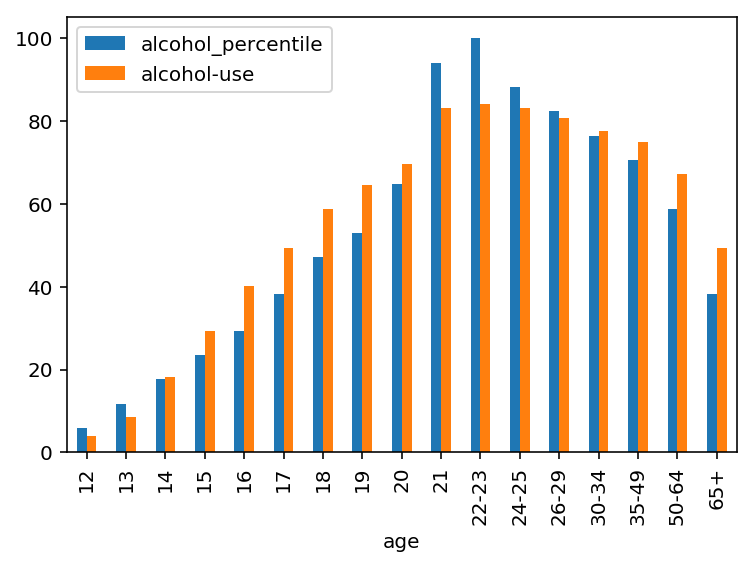

In [48]:
percentile_df.plot(kind='bar', x='age')
plt.show()

From the plots, it seems that more weight is given to variables with higher percentiles, as compared to using the raw values. Hence, the categories with the higher frequencies are more noticeable.